In [ ]:
pip install missingno 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
ls

kddcup99_csv.csv  sample_data/


In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [4]:
df=pd.read_csv('kddcup99_csv.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [6]:
cat_col=["protocol_type","service","flag","label"]
for v in df.columns:
    if not v in cat_col:
        df[v]=pd.to_numeric(df[v])

In [7]:
df[df.select_dtypes(np.float64).columns] = df.select_dtypes(np.float64).astype(np.float32)


In [8]:
df[df.select_dtypes(np.int64).columns] = df.select_dtypes(np.int64).astype(np.int32)

In [9]:
df.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate   label  
0                       0.0  normal  
1                       0.0  normal  
2                       0.0  normal  
3                       0.0  normal  
4                       0.0  normal  

[5 rows x 42 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int32  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int32  
 5   dst_bytes                    494020 non-null  int32  
 6   land                         494020 non-null  int32  
 7   wrong_fragment               494020 non-null  int32  
 8   urgent                       494020 non-null  int32  
 9   hot                          494020 non-null  int32  
 10  num_failed_logins            494020 non-null  int32  
 11  logged_in                    494020 non-null  int32  
 12  lnum_compromised             494020 non-null  int32  
 13 

In [10]:
df.describe()

duration     src_bytes     dst_bytes           land  \
count  494020.000000  4.940200e+05  4.940200e+05  494020.000000   
mean       47.979400  3.025616e+03  8.685308e+02       0.000045   
std       707.747185  9.882191e+05  3.304003e+04       0.006673   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  4.500000e+01  0.000000e+00       0.000000   
50%         0.000000  5.200000e+02  0.000000e+00       0.000000   
75%         0.000000  1.032000e+03  0.000000e+00       0.000000   
max     58329.000000  6.933756e+08  5.155468e+06       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   494020.000000  494020.000000  494020.000000      494020.000000   
mean         0.006433       0.000014       0.034519           0.000152   
std          0.134805       0.005510       0.782103           0.015520   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      30.000000           5.000000   

           logged_in  lnum_compromised  ...  dst_host_count  \
count  494020.000000     494020.000000  ...   494020.000000   
mean        0.148245          0.010212  ...      232.471248   
std         0.355343          1.798328  ...       64.744601   
min         0.000000          0.000000  ...        0.000000   
25%         0.000000          0.000000  ...      255.000000   
50%         0.000000          0.000000  ...      255.000000   
75%         0.000000          0.000000  ...      255.000000   
max         1.000000        884.000000  ...      255.000000   

       dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count       494020.000000           494020.000000           494020.000000   
mean           188.666052                0.753781                0.030906   
std            106.040205                0.410780                0.109259   
min              0.000000                0.000000                0.000000   
25%             46.000000                0.410000                0.000000   
50%            255.000000                1.000000                0.000000   
75%            255.000000                1.000000                0.040000   
max            255.000000                1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                494020.000000                494020.000000   
mean                      0.601936                     0.006684   
std                       0.481309                     0.042133   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       1.000000                     0.000000   
75%                       1.000000                     0.000000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         494020.000000             494020.000000         494020.000000   
mean               0.176754                  0.176443              0.058118   
std                0.380593                  0.380920              0.230590   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                0.000000                  0.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate  
count             494020.000000  
mean                   0.057412  
std                    0.230141  
min                    0.00

In [11]:
num_col=[]
for v in df.columns:
    if not v in cat_col:
        num_col.append(v)

In [10]:
num_col=['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'lnum_compromised',
 'lroot_shell',
 'lsu_attempted',
 'lnum_root',
 'lnum_file_creations',
 'lnum_shells',
 'lnum_access_files',
 'lnum_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [ ]:
#top 10 stdc
stval=df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
val=stval.to_dict()

In [ ]:
val=dict(sorted(val.items(), key=lambda item: item[1],reverse=True))

In [11]:
val={'src_bytes': 988219.1012247463,
 'dst_bytes': 33040.03467172595,
 'duration': 707.7471853280666,
 'srv_count': 246.3227355222279,
 'count': 213.14710672034062,
 'dst_host_srv_count': 106.04020468998293,
 'dst_host_count': 64.74460109429228,
 'lnum_root': 2.012720362601919,
 'lnum_compromised': 1.7983280775888895,
 'hot': 0.7821033719503345,
 'dst_host_same_src_port_rate': 0.4813089668750763,
 'dst_host_same_srv_rate': 0.4107799828052521,
 'same_srv_rate': 0.38818976283073425,
 'srv_serror_rate': 0.38101688027381897,
 'dst_host_srv_serror_rate': 0.38091975450515747,
 'serror_rate': 0.38071727752685547,
 'dst_host_serror_rate': 0.3805934190750122,
 'logged_in': 0.35534304950559575,
 'srv_rerror_rate': 0.2321472018957138,
 'rerror_rate': 0.23162369430065155,
 'dst_host_rerror_rate': 0.23058971762657166,
 'dst_host_srv_rerror_rate': 0.2301405370235443,
 'srv_diff_host_rate': 0.1423969715833664,
 'wrong_fragment': 0.13480538413163565,
 'dst_host_diff_srv_rate': 0.1092592105269432,
 'lnum_file_creations': 0.09641597625620141,
 'diff_srv_rate': 0.08220557123422623,
 'dst_host_srv_diff_host_rate': 0.0421329140663147,
 'is_guest_login': 0.03721106996669842,
 'lnum_access_files': 0.036481726902960226,
 'num_failed_logins': 0.015519612608912128,
 'lnum_shells': 0.011020021347659998,
 'lroot_shell': 0.010550798816426512,
 'lsu_attempted': 0.00779262996298348,
 'land': 0.006673133971526146,
 'urgent': 0.005510263503669807,
 'lnum_outbound_cmds': 0.0,
 'is_host_login': 0.0}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


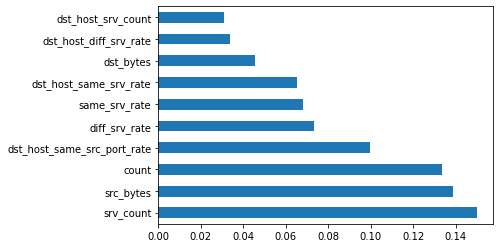

In [ ]:

from sklearn.ensemble import RandomForestClassifier
%matplotlib inline            
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
x= df[num_col].copy()
y = df['label']
y=pd.DataFrame(labelencoder.fit_transform(y),columns=['label'])
# print(type(y),type(x),y.shape,x.shape)
model = RandomForestClassifier()
model.fit(x, y)
fval=pd.Series(model.feature_importances_, index=x.columns)
(fval
   .nlargest(10)
   .plot(kind='barh'))

In [ ]:
fval=fval.to_dict()

In [ ]:
fval=dict(sorted(fval.items(), key=lambda item: item[1],reverse=True))

In [12]:
fval={'srv_count': 0.1501800462937829,
 'src_bytes': 0.13856321059767066,
 'count': 0.1335355276287248,
 'dst_host_same_src_port_rate': 0.09964489321108116,
 'diff_srv_rate': 0.0731242075782352,
 'same_srv_rate': 0.06808654019826653,
 'dst_host_same_srv_rate': 0.06516215046387394,
 'dst_bytes': 0.045466784149893344,
 'dst_host_diff_srv_rate': 0.03377647838016473,
 'dst_host_srv_count': 0.030761138117163595,
 'dst_host_count': 0.02808032261485276,
 'logged_in': 0.02326286759708081,
 'serror_rate': 0.02138439294858998,
 'srv_serror_rate': 0.017170213102801594,
 'dst_host_serror_rate': 0.016585579644350253,
 'dst_host_srv_serror_rate': 0.013676014904180855,
 'dst_host_rerror_rate': 0.008558913784573513,
 'dst_host_srv_diff_host_rate': 0.007215177940388785,
 'dst_host_srv_rerror_rate': 0.005390397542784849,
 'lnum_compromised': 0.003508074315986144,
 'wrong_fragment': 0.003504947491140147,
 'rerror_rate': 0.00332925040884966,
 'srv_rerror_rate': 0.0028550765452395282,
 'srv_diff_host_rate': 0.0026235161680823924,
 'hot': 0.00255779336324375,
 'duration': 0.0012999120333598273,
 'is_guest_login': 0.000437604956636385,
 'num_failed_logins': 9.44082940844653e-05,
 'lroot_shell': 4.4203838474793154e-05,
 'lnum_root': 3.587277030240149e-05,
 'lnum_file_creations': 3.0391863381331605e-05,
 'land': 2.5882457496536406e-05,
 'lnum_shells': 1.1937805995953987e-05,
 'lnum_access_files': 9.049247701278516e-06,
 'urgent': 5.365904351646931e-06,
 'lsu_attempted': 1.8558372136057462e-06,
 'lnum_outbound_cmds': 0.0,
 'is_host_login': 0.0}

In [ ]:
mval={}
for v in fval:
  if not v in mval:
    mval[v]=fval[v]*val[v]

In [ ]:
mval=dict(sorted(mval.items(), key=lambda item: item[1],reverse=True))

In [13]:
mval={'src_bytes': 136930.81143964533,
 'dst_bytes': 1502.224124724356,
 'srv_count': 36.99275982393943,
 'count': 28.4627113584368,
 'dst_host_srv_count': 3.261917382440864,
 'dst_host_count': 1.8180492862976763,
 'duration': 0.9200090827845017,
 'dst_host_same_src_port_rate': 0.04795998060580278,
 'dst_host_same_srv_rate': 0.026767307047103388,
 'same_srv_rate': 0.026430497891530336,
 'logged_in': 0.008266298312191606,
 'serror_rate': 0.008141407864951662,
 'srv_serror_rate': 0.006542141030066112,
 'dst_host_serror_rate': 0.006312362464184188,
 'lnum_compromised': 0.006308668540706321,
 'diff_srv_rate': 0.006011217255018959,
 'dst_host_srv_serror_rate': 0.005209464239909446,
 'dst_host_diff_srv_rate': 0.003690391362197164,
 'hot': 0.0020004588141451234,
 'dst_host_rerror_rate': 0.0019735975127749784,
 'dst_host_srv_rerror_rate': 0.0012405489852668988,
 'rerror_rate': 0.0007711332789497128,
 'srv_rerror_rate': 0.0006627980311754378,
 'wrong_fragment': 0.00047248579290436014,
 'srv_diff_host_rate': 0.0003735807572349307,
 'dst_host_srv_diff_host_rate': 0.0003039964721355701,
 'lnum_root': 7.220185525058487e-05,
 'is_guest_login': 1.628374865917055e-05,
 'lnum_file_creations': 2.930261178156185e-06,
 'num_failed_logins': 1.465180151259152e-06,
 'lroot_shell': 4.663858066613563e-07,
 'lnum_access_files': 3.3013218331528343e-07,
 'land': 1.7271710638671867e-07,
 'lnum_shells': 1.3155487691963645e-07,
 'urgent': 2.956754691306308e-08,
 'lsu_attempted': 1.446185267716391e-08,
 'lnum_outbound_cmds': 0.0,
 'is_host_login': 0.0}

In [ ]:
fnum_col=[]
cnt=0
for v in mval:
   if cnt<11:
     print(v)
     fnum_col.append(v)
   cnt+=1

src_bytes
dst_bytes
srv_count
count
dst_host_srv_count
dst_host_count
duration
dst_host_same_src_port_rate
dst_host_same_srv_rate
same_srv_rate
logged_in


In [14]:
fnum_col=['src_bytes',
 'dst_bytes',
 'srv_count',
 'count',
 'dst_host_srv_count',
 'dst_host_count',
 'duration',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'same_srv_rate',
 'logged_in']

In [17]:
pcol=fnum_col+['label']

In [ ]:
cmat=df[pcol].corr()

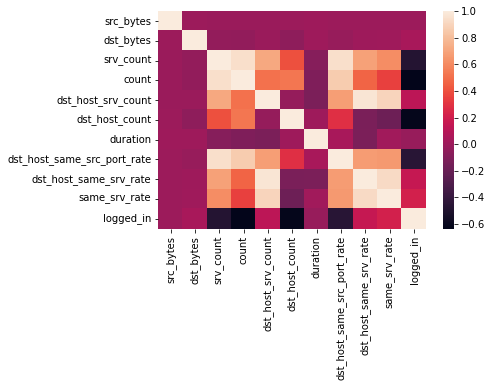

In [ ]:
sns.heatmap(df[pcol].corr());

In [ ]:
cmat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, src_bytes to logged_in
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   src_bytes                    11 non-null     float64
 1   dst_bytes                    11 non-null     float64
 2   srv_count                    11 non-null     float64
 3   count                        11 non-null     float64
 4   dst_host_srv_count           11 non-null     float64
 5   dst_host_count               11 non-null     float64
 6   duration                     11 non-null     float64
 7   dst_host_same_src_port_rate  11 non-null     float64
 8   dst_host_same_srv_rate       11 non-null     float64
 9   same_srv_rate                11 non-null     float64
 10  logged_in                    11 non-null     float64
dtypes: float64(11)
memory usage: 1.3+ KB


In [ ]:
cmat

src_bytes  dst_bytes  srv_count     count  \
src_bytes                     1.000000  -0.000002  -0.002501 -0.003098   
dst_bytes                    -0.000002   1.000000  -0.030544 -0.040373   
srv_count                    -0.002501  -0.030544   1.000000  0.943667   
count                        -0.003098  -0.040373   0.943667  1.000000   
dst_host_srv_count           -0.003212  -0.005849   0.718451  0.514579   
dst_host_count               -0.001743  -0.048869   0.401533  0.532629   
duration                      0.004258   0.005440  -0.080250 -0.105154   
dst_host_same_src_port_rate  -0.000724  -0.020143   0.944926  0.860578   
dst_host_same_srv_rate       -0.002052   0.007058   0.687992  0.468772   
same_srv_rate                -0.001860   0.014002   0.615568  0.353737   
logged_in                     0.001701   0.047814  -0.478120 -0.634641   

                             dst_host_srv_count  dst_host_count  duration  \
src_bytes                             -0.003212       -0.001743  0.004258   
dst_bytes                             -0.005849       -0.048869  0.005440   
srv_count                              0.718451        0.401533 -0.080250   
count                                  0.514579        0.532629 -0.105154   
dst_host_srv_count                     1.000000       -0.027249 -0.117516   
dst_host_count                        -0.027249        1.000000  0.010073   
duration                              -0.117516        0.010073  1.000000   
dst_host_same_src_port_rate            0.677579        0.290742  0.042642   
dst_host_same_srv_rate                 0.973685       -0.126908 -0.118458   
same_srv_rate                          0.898960       -0.181050  0.021771   
logged_in                              0.119324       -0.621023 -0.017265   

                             dst_host_same_src_port_rate  \
src_bytes                                      -0.000724   
dst_bytes                                      -0.020143   
srv_count                                       0.944926   
count                                           0.860578   
dst_host_srv_count                              0.677579   
dst_host_count                                  0.290742   
duration                                        0.042642   
dst_host_same_src_port_rate                     1.000000   
dst_host_same_srv_rate                          0.671337   
same_srv_rate                                   0.660747   
logged_in                                      -0.461555   

                             dst_host_same_srv_rate  same_srv_rate  logged_in  
src_bytes                                 -0.002052      -0.001860   0.001701  
dst_bytes                                  0.007058       0.014002   0.047814  
srv_count                                  0.687992       0.615568  -0.478120  
count                                      0.468772       0.353737  -0.634641  
dst_host_srv_count                         0.973685       0.898960   0.119324  
dst_host_count                            -0.126908      -0.181050  -0.621023  
duration                                  -0.118458       0.021771  -0.017265  
dst_host_same_src_port_rate                0.671337       0.660747  -0.461555  
dst_host_same_srv_rate                     1.000000       0.927813   0.161080  
same_srv_rate                              0.927813       1.000000   0.219684  
logged_in                                  0.161080       0.219684   1.000000

In [ ]:
dst=set()
vlst={}
for index, row in cmat.iterrows():
  flag=1
  for cl in cmat.columns:
    if index==cl:
      flag=0
    if flag and abs(row[cl])>=0.6:
      dst.add(cl)
      vlst[index+","+cl]=abs(row[cl])
dst=list(dst)

In [ ]:
vlst=dict(sorted(vlst.items(), key=lambda item: item[1],reverse=True))

In [18]:
vlst={'dst_host_same_srv_rate,dst_host_srv_count': 0.9736852864460211,
 'dst_host_same_src_port_rate,srv_count': 0.9449262160048147,
 'count,srv_count': 0.9436670187138742,
 'same_srv_rate,dst_host_same_srv_rate': 0.9278134615552779,
 'same_srv_rate,dst_host_srv_count': 0.8989597393733498,
 'dst_host_same_src_port_rate,count': 0.8605782719283358,
 'dst_host_srv_count,srv_count': 0.7184506202050708,
 'dst_host_same_srv_rate,srv_count': 0.6879924348934452,
 'dst_host_same_src_port_rate,dst_host_srv_count': 0.6775787582777929,
 'dst_host_same_srv_rate,dst_host_same_src_port_rate': 0.6713367987226728,
 'same_srv_rate,dst_host_same_src_port_rate': 0.6607467505548126,
 'logged_in,count': 0.6346406450435208,
 'logged_in,dst_host_count': 0.6210233463669611,
 'same_srv_rate,srv_count': 0.6155678439107879}

In [33]:
dst=['dst_host_same_src_port_rate',
 'count',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'srv_count']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

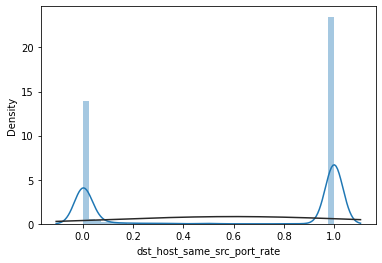

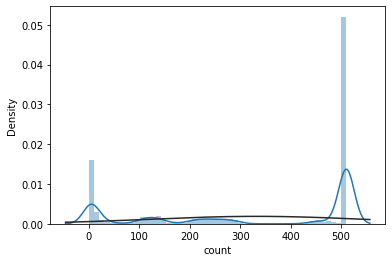

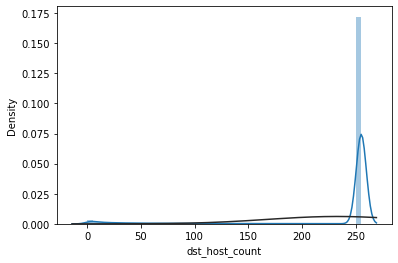

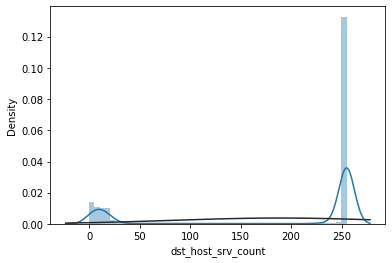

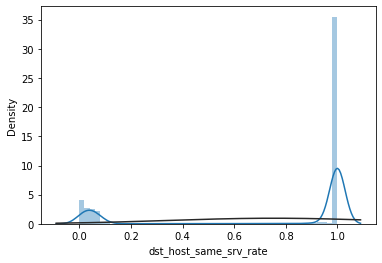

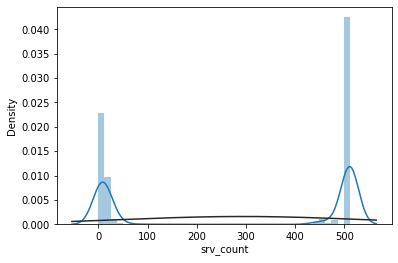

In [ ]:
for i,v in enumerate(dst):
  plt.figure(i+1)
  sns.distplot(df[v], fit=st.norm)

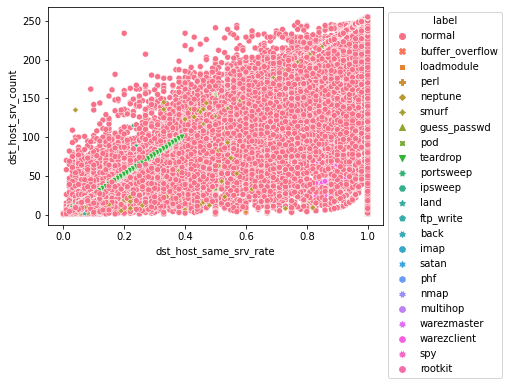

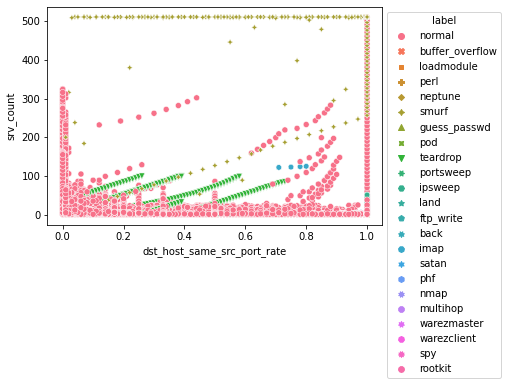

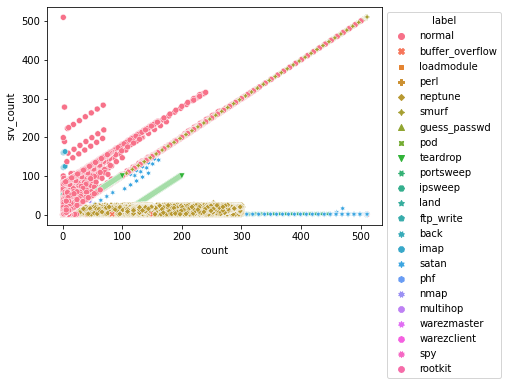

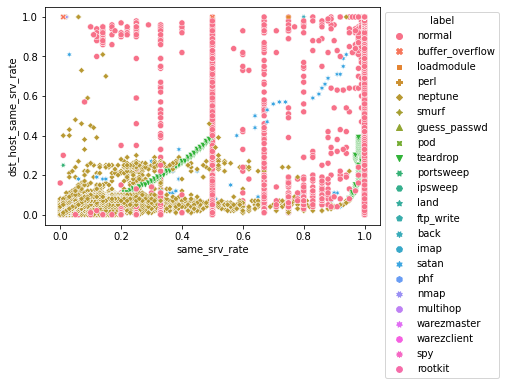

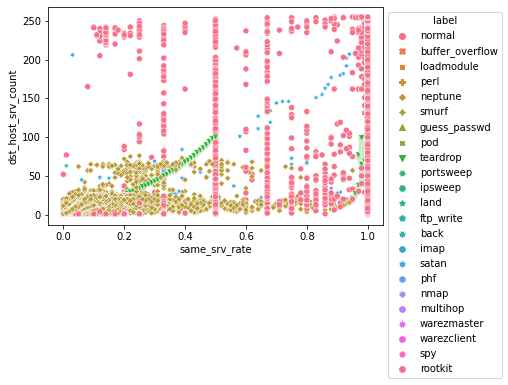

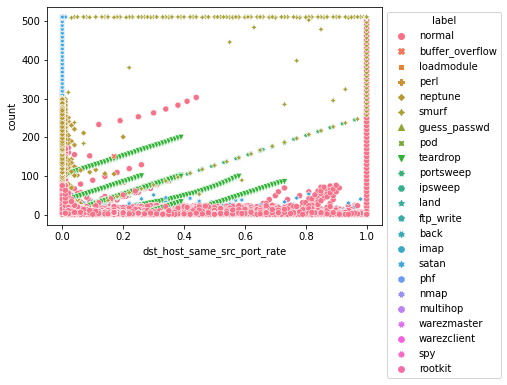

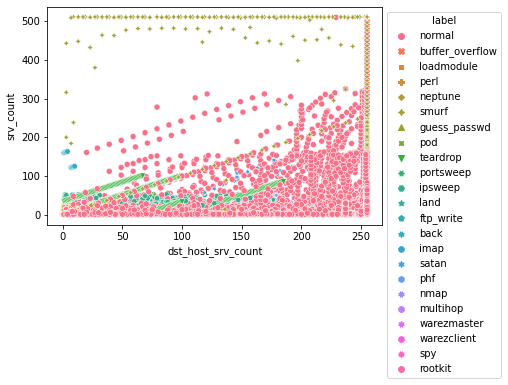

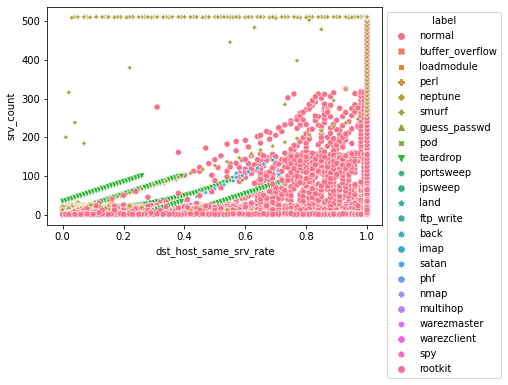

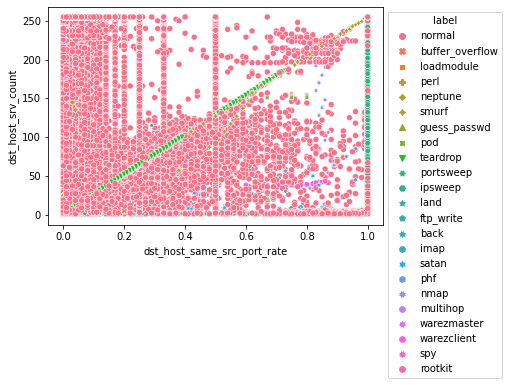

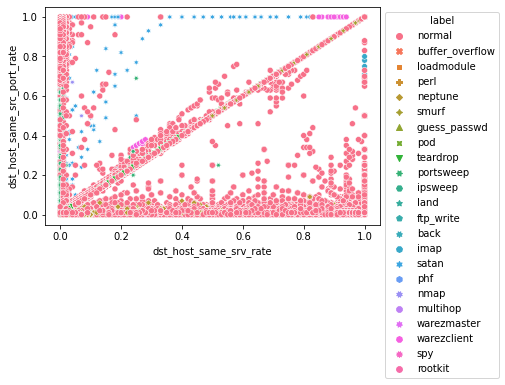

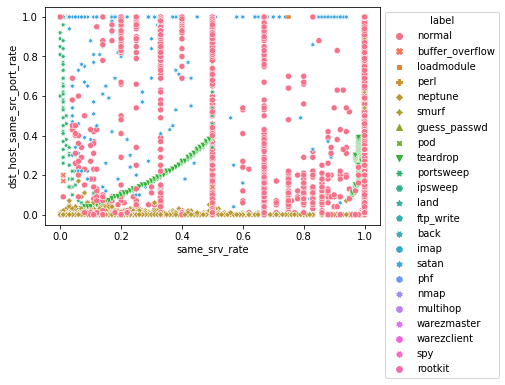

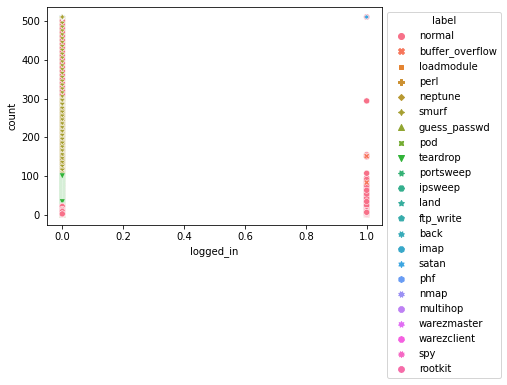

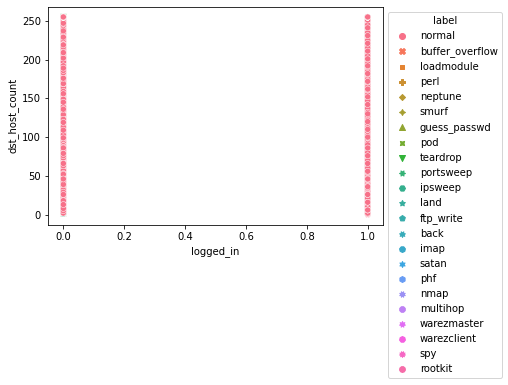

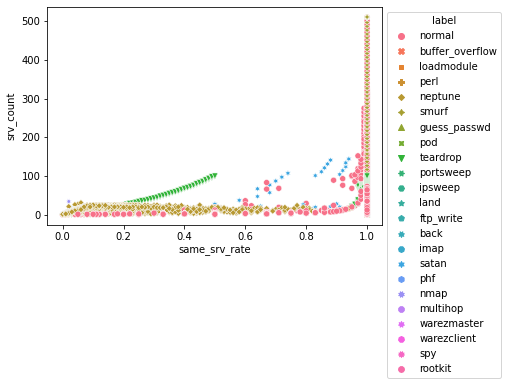

In [ ]:
for i,v in enumerate(vlst):
  r,c=tuple(v.split(','))
  # print(r,c)
  plt.figure(i+1)
  ax=sns.scatterplot(data=df, x=r, y=c, sizes=(200, 200),hue="label",style="label")
  sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


In [31]:
ul={}
for v in cat_col:
  ul[v]=len(df[v].unique())

In [40]:
cat_col

['protocol_type', 'service', 'flag', 'label']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

<Figure size 432x288 with 0 Axes>

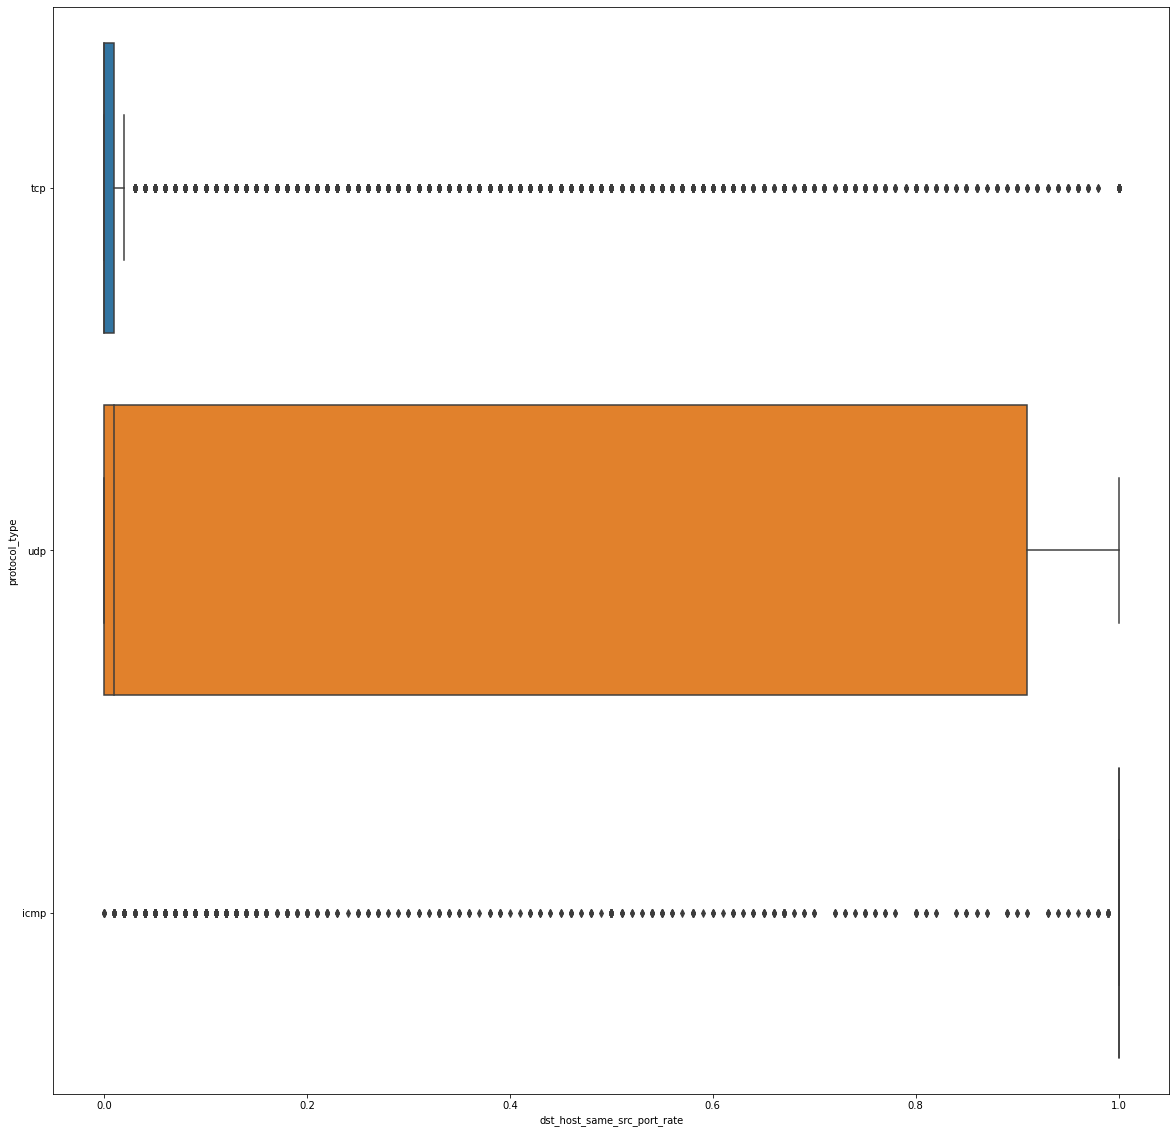

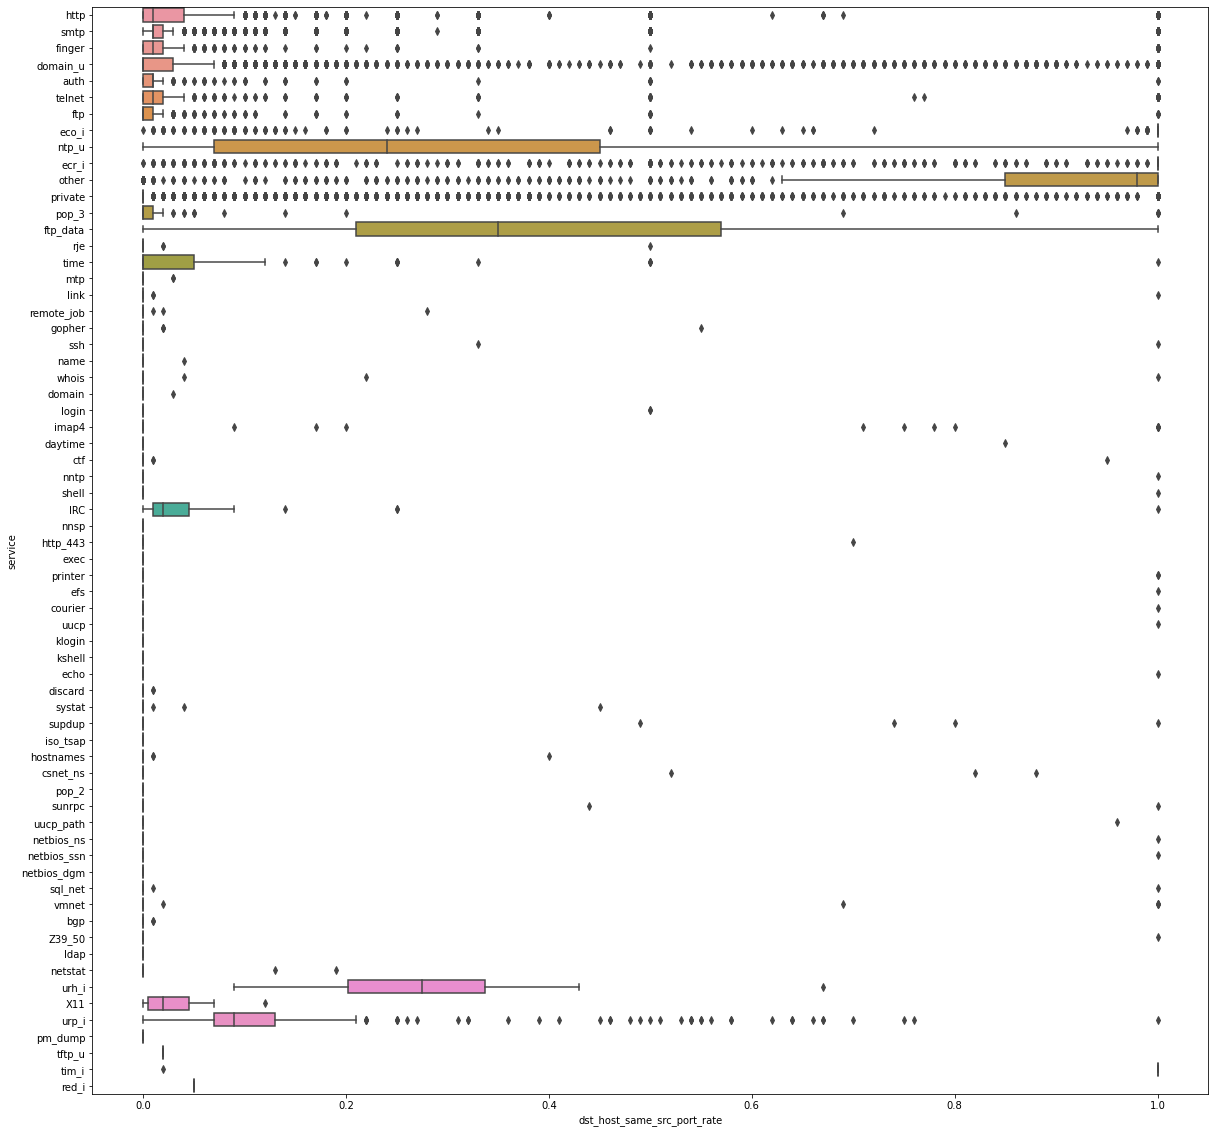

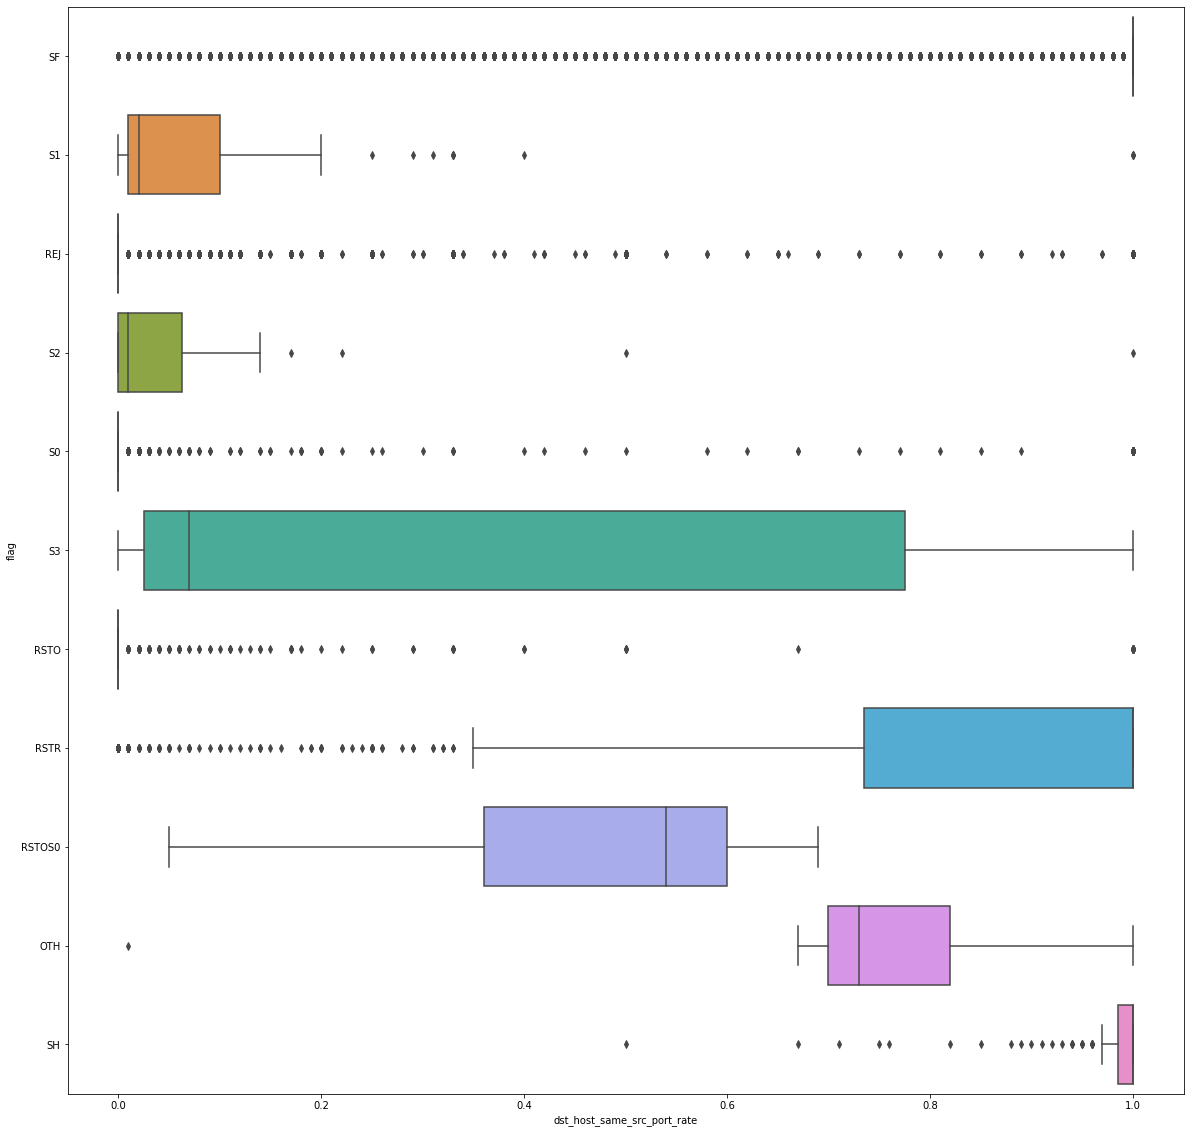

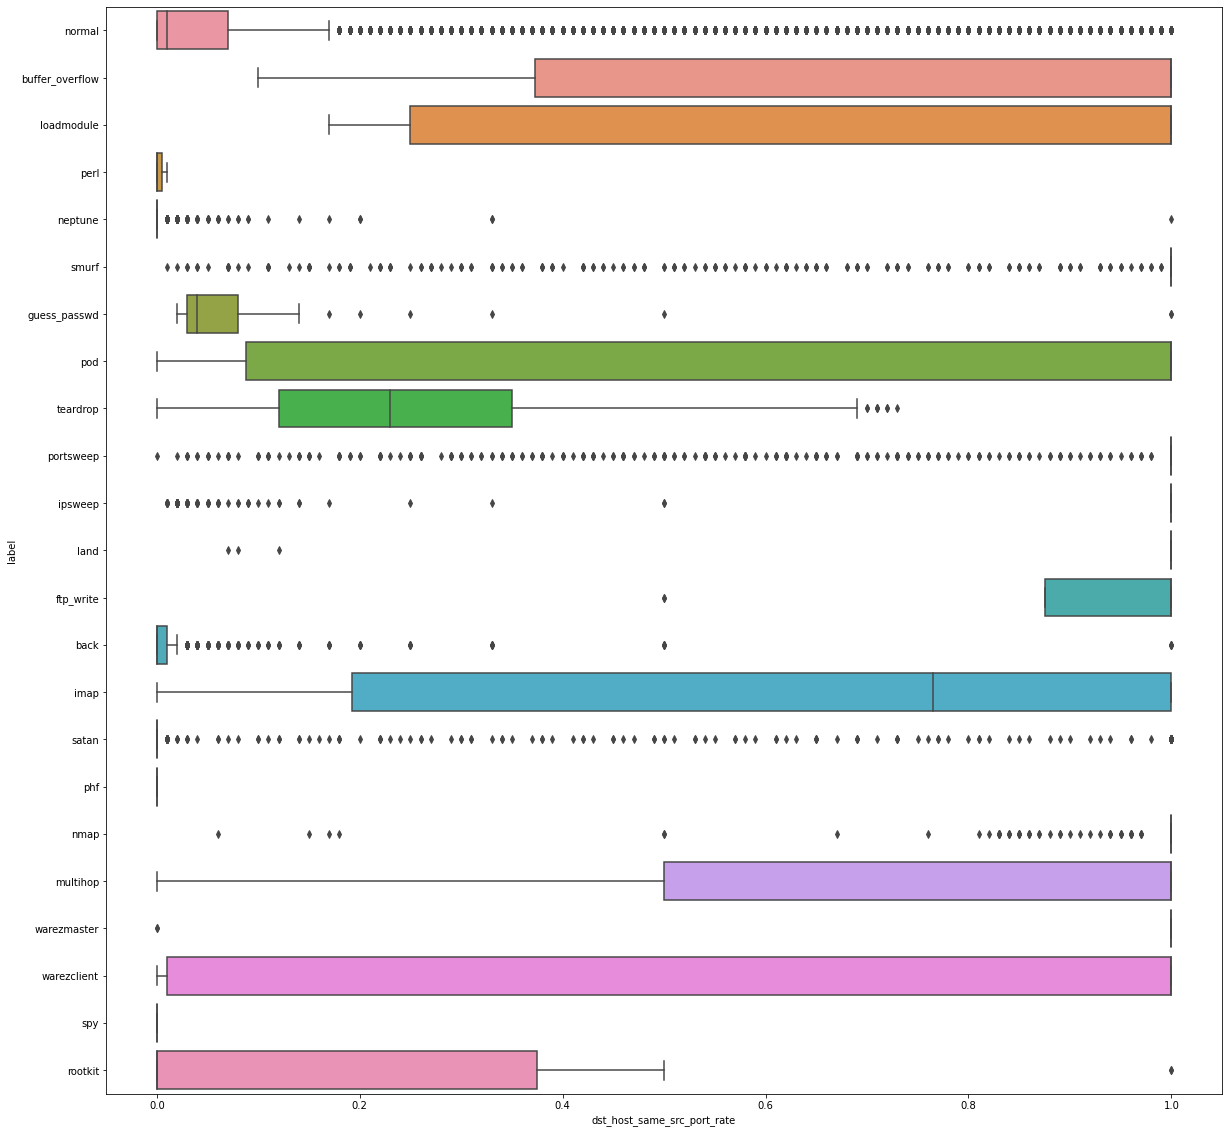

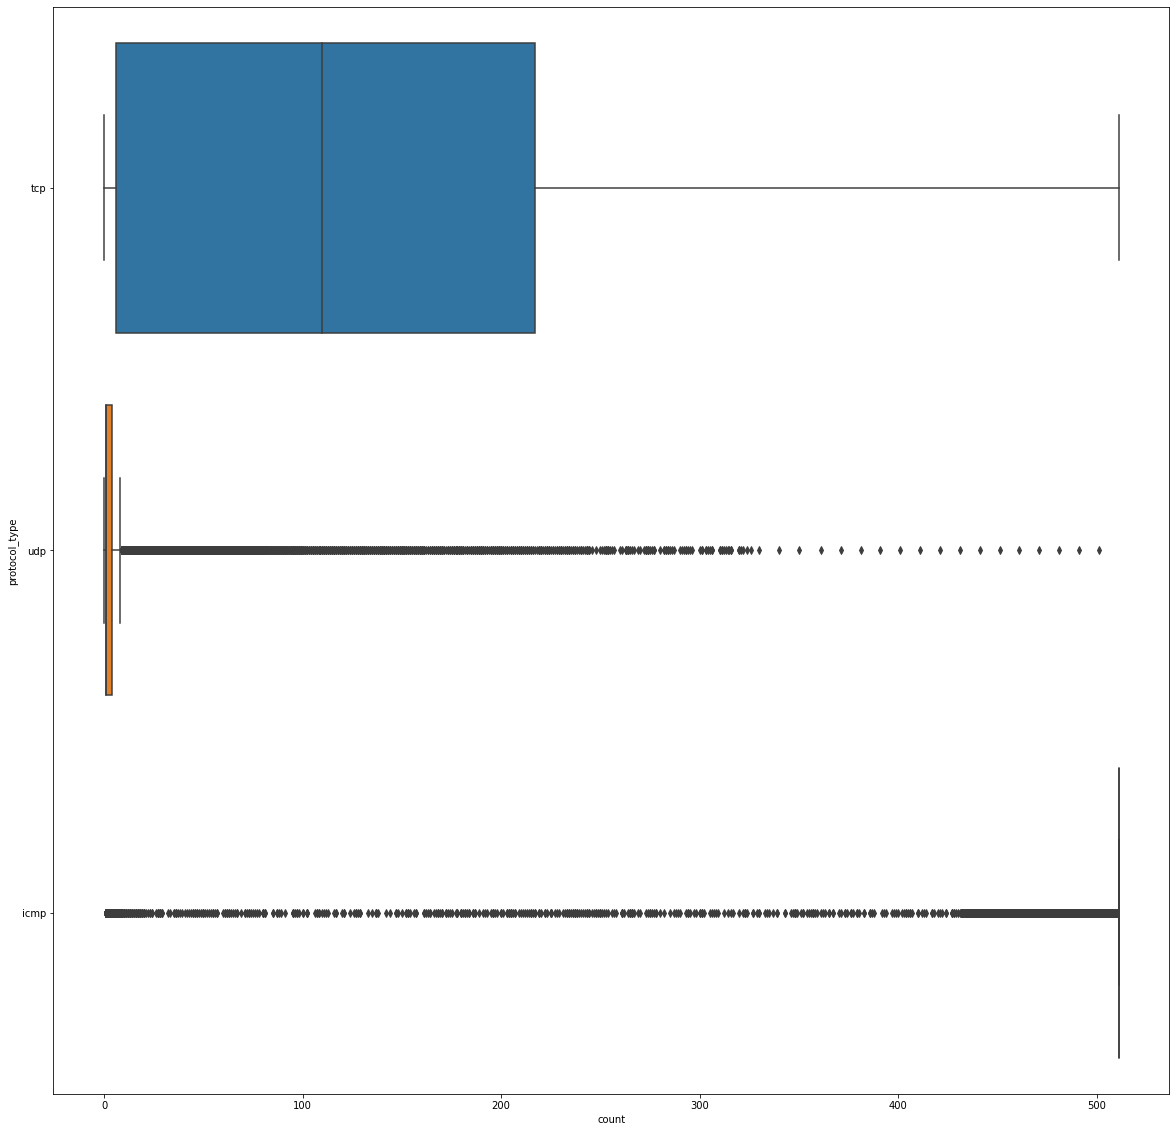

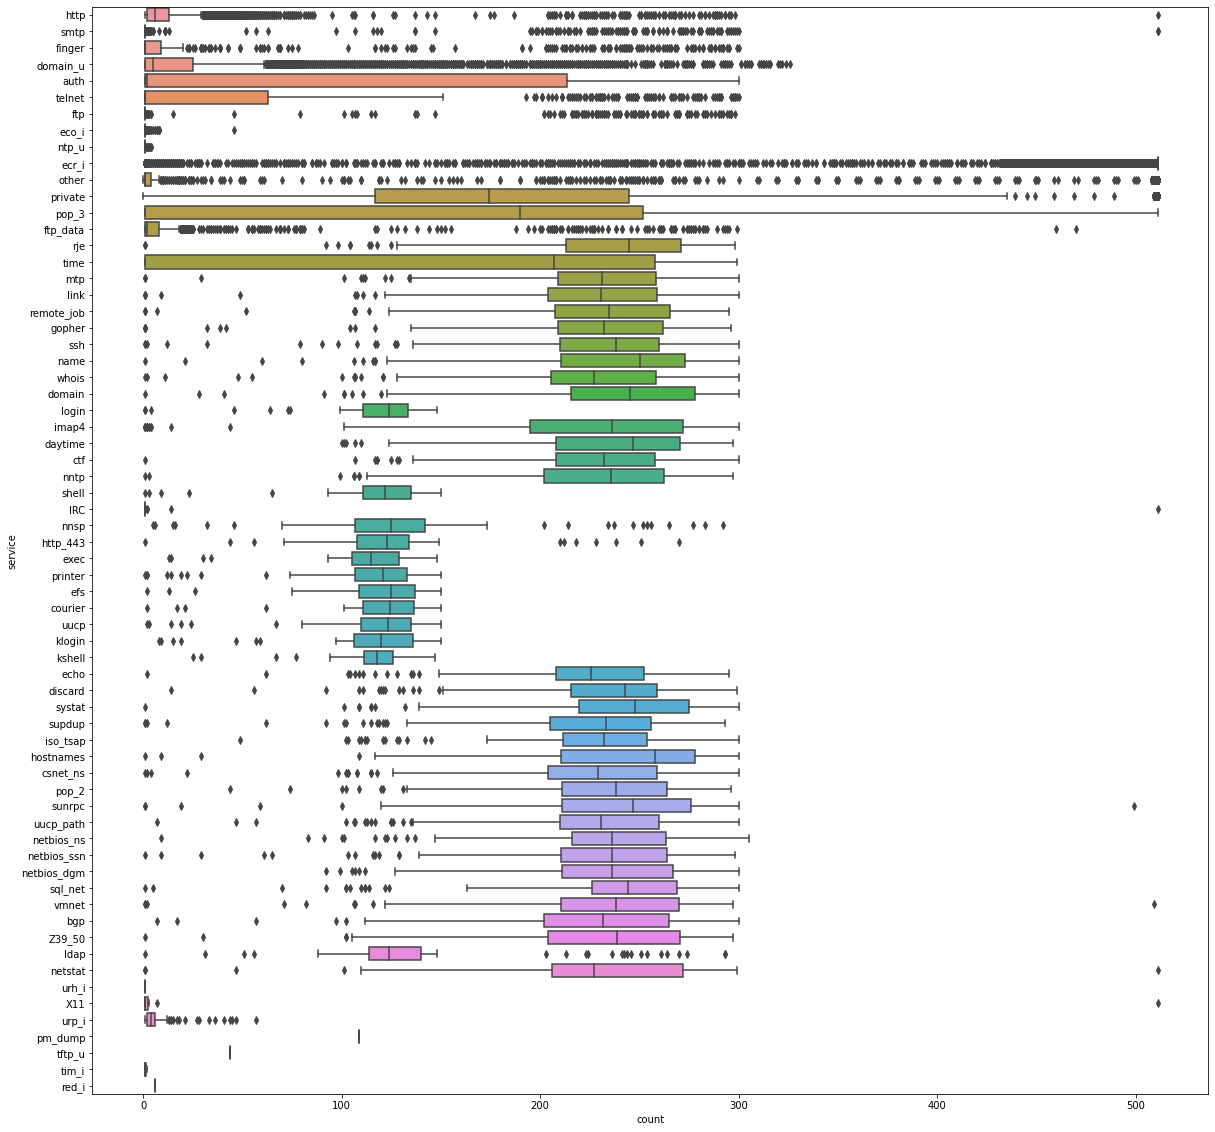

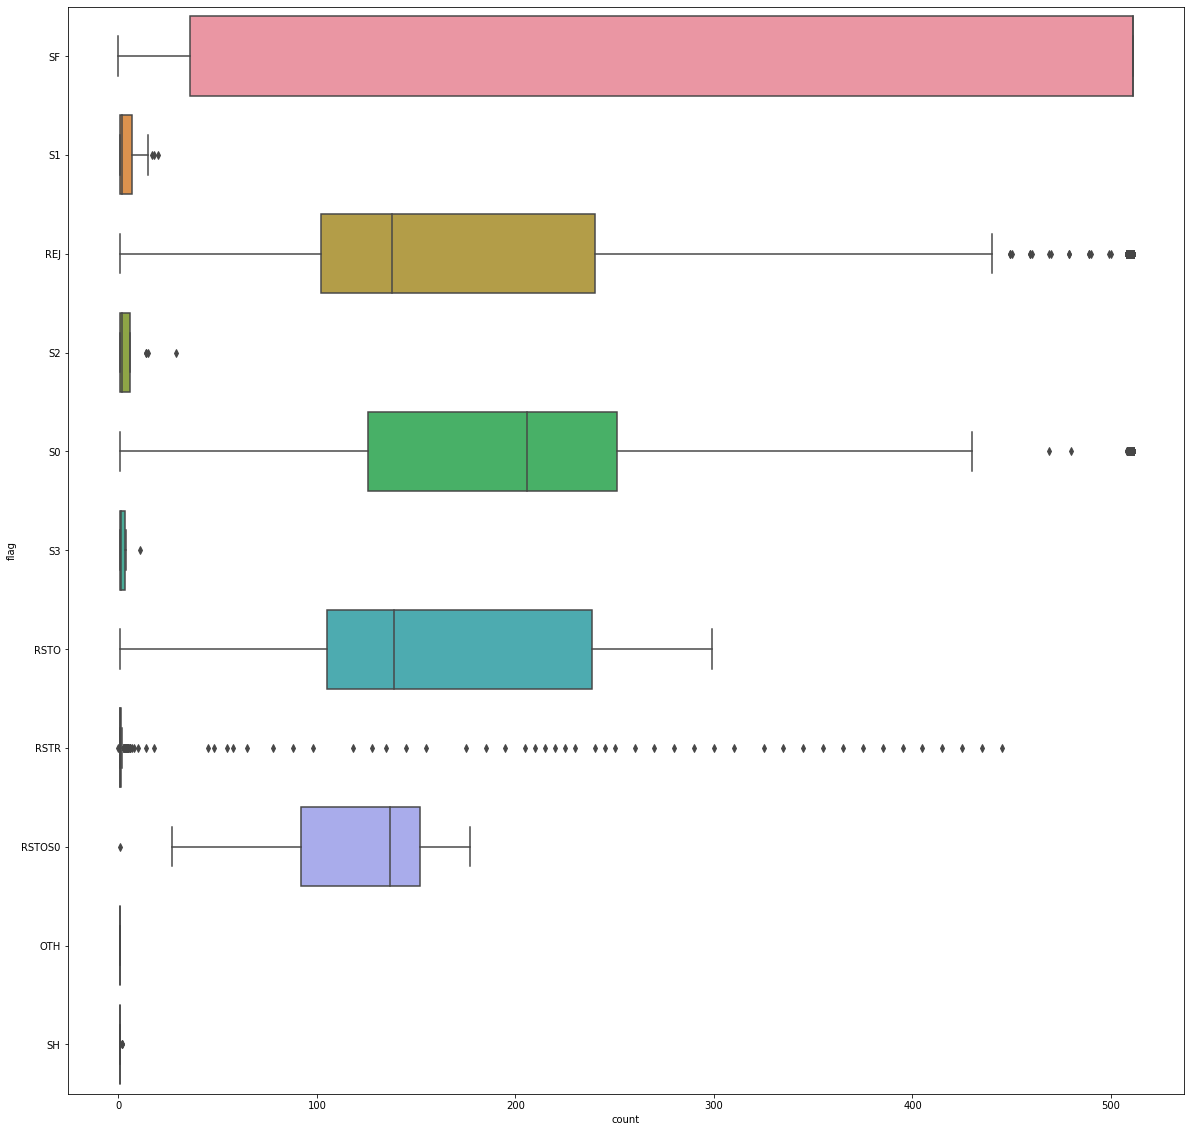

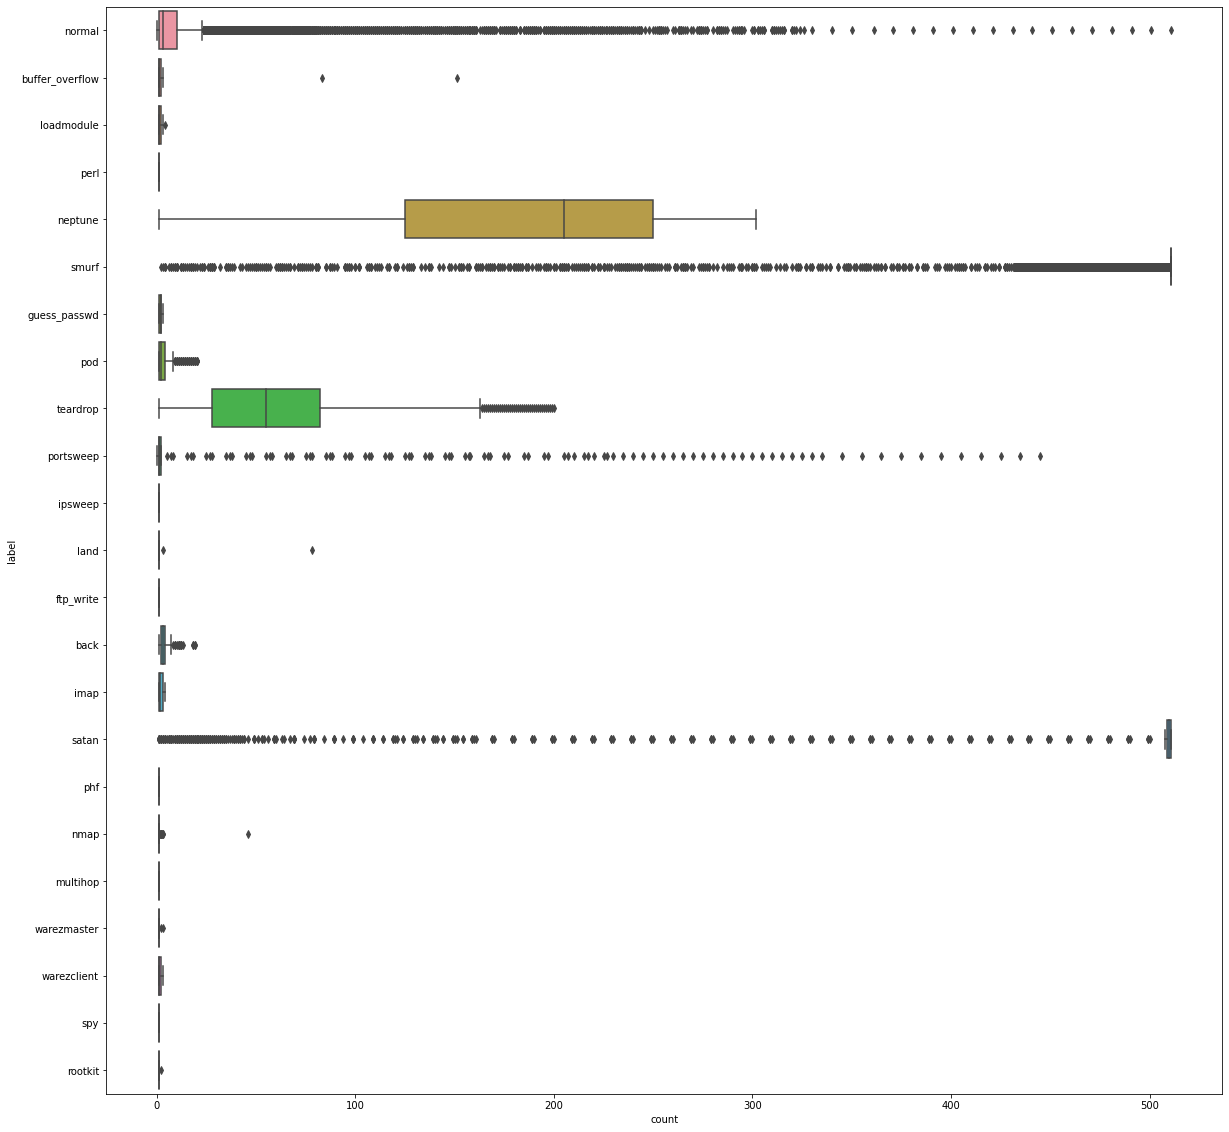

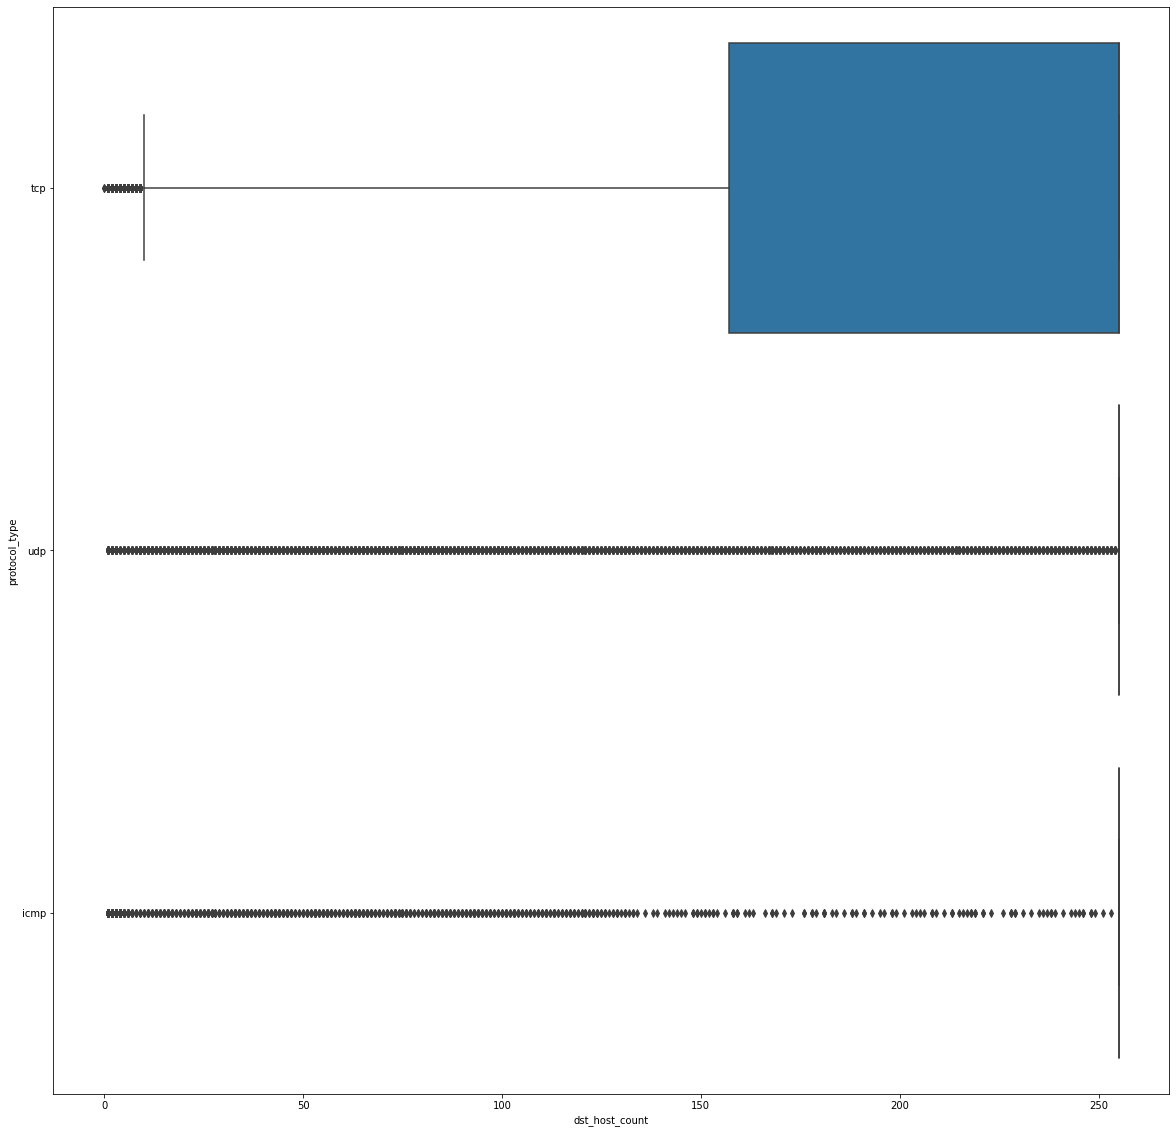

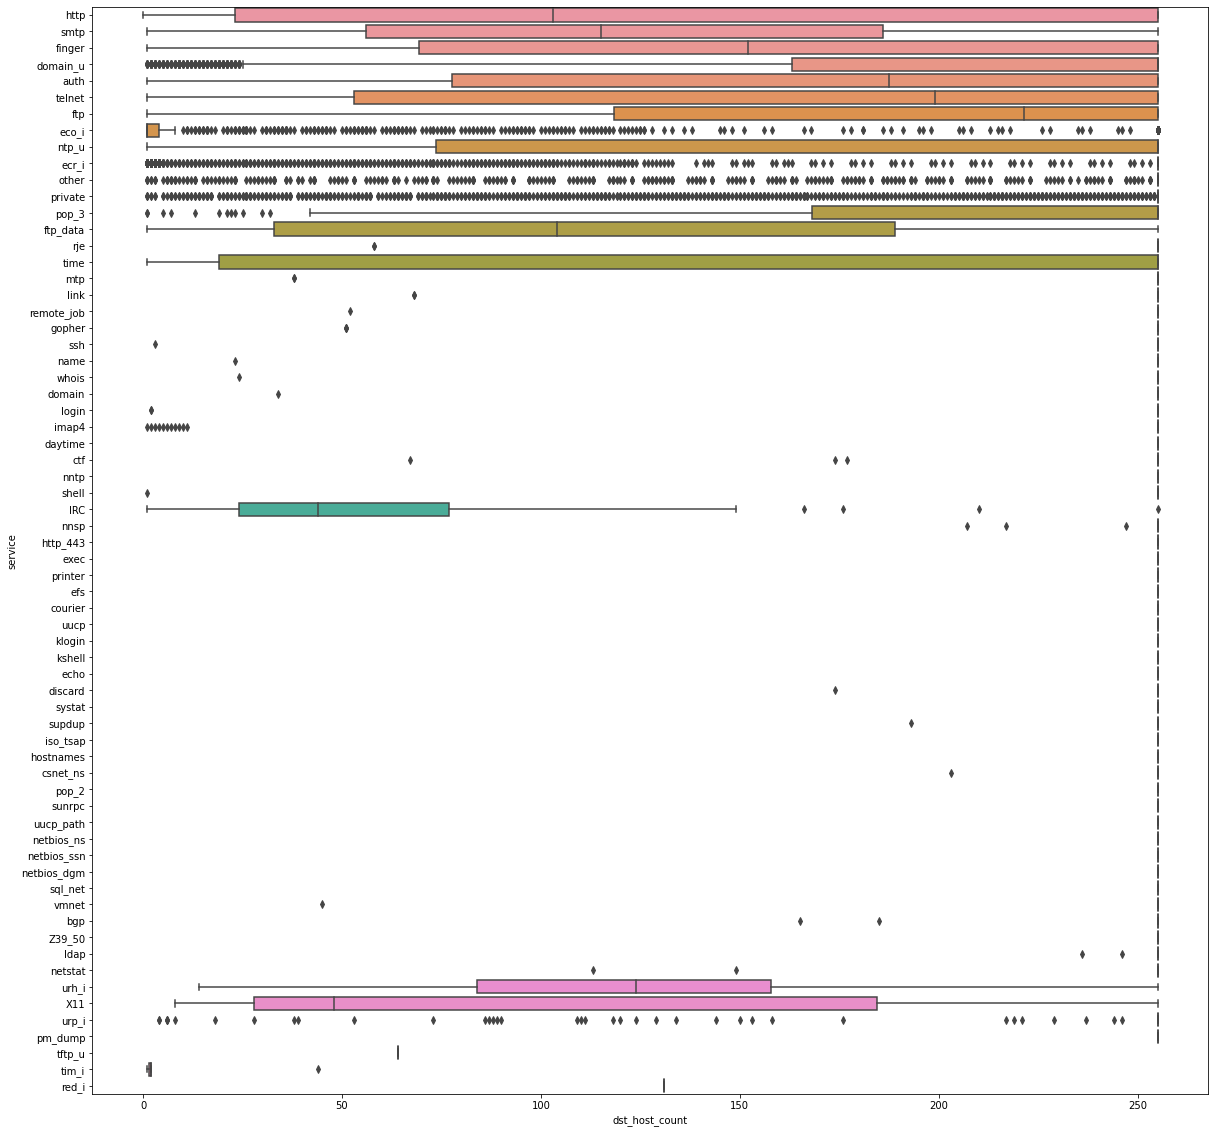

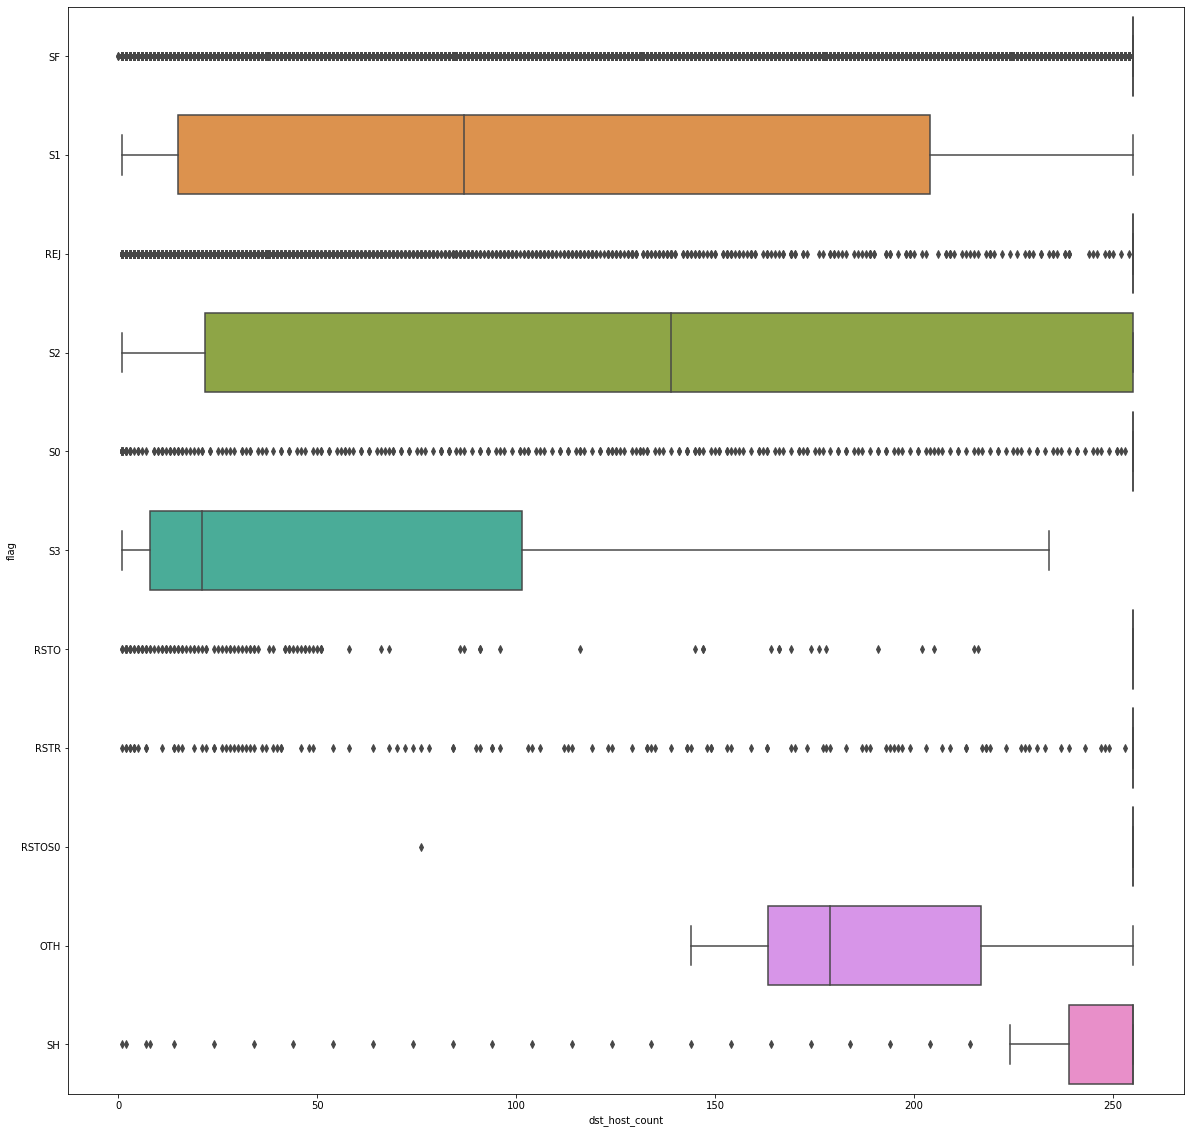

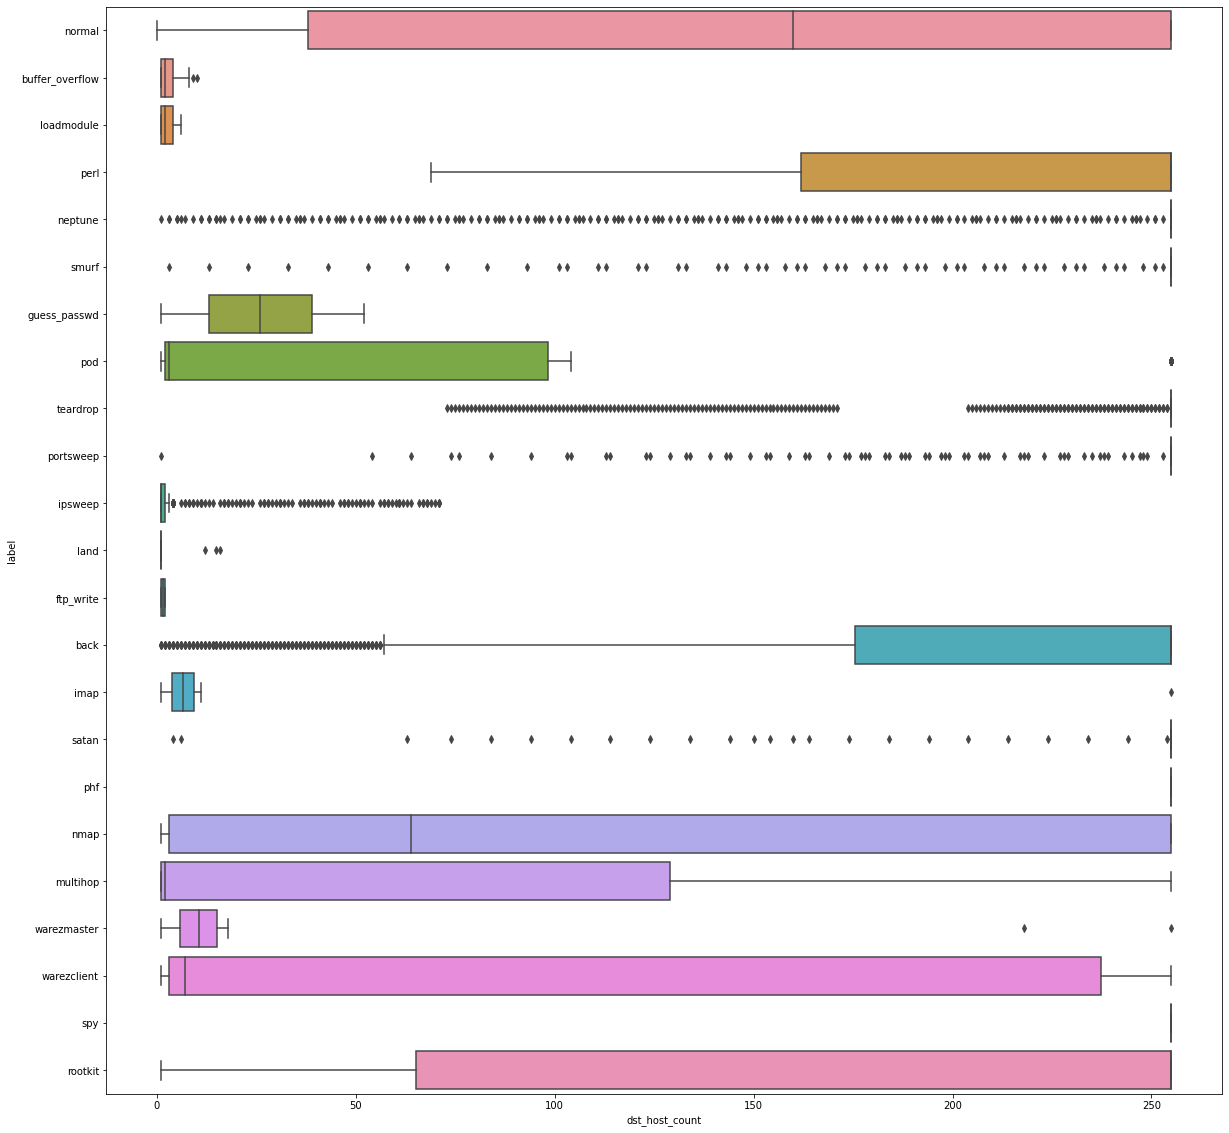

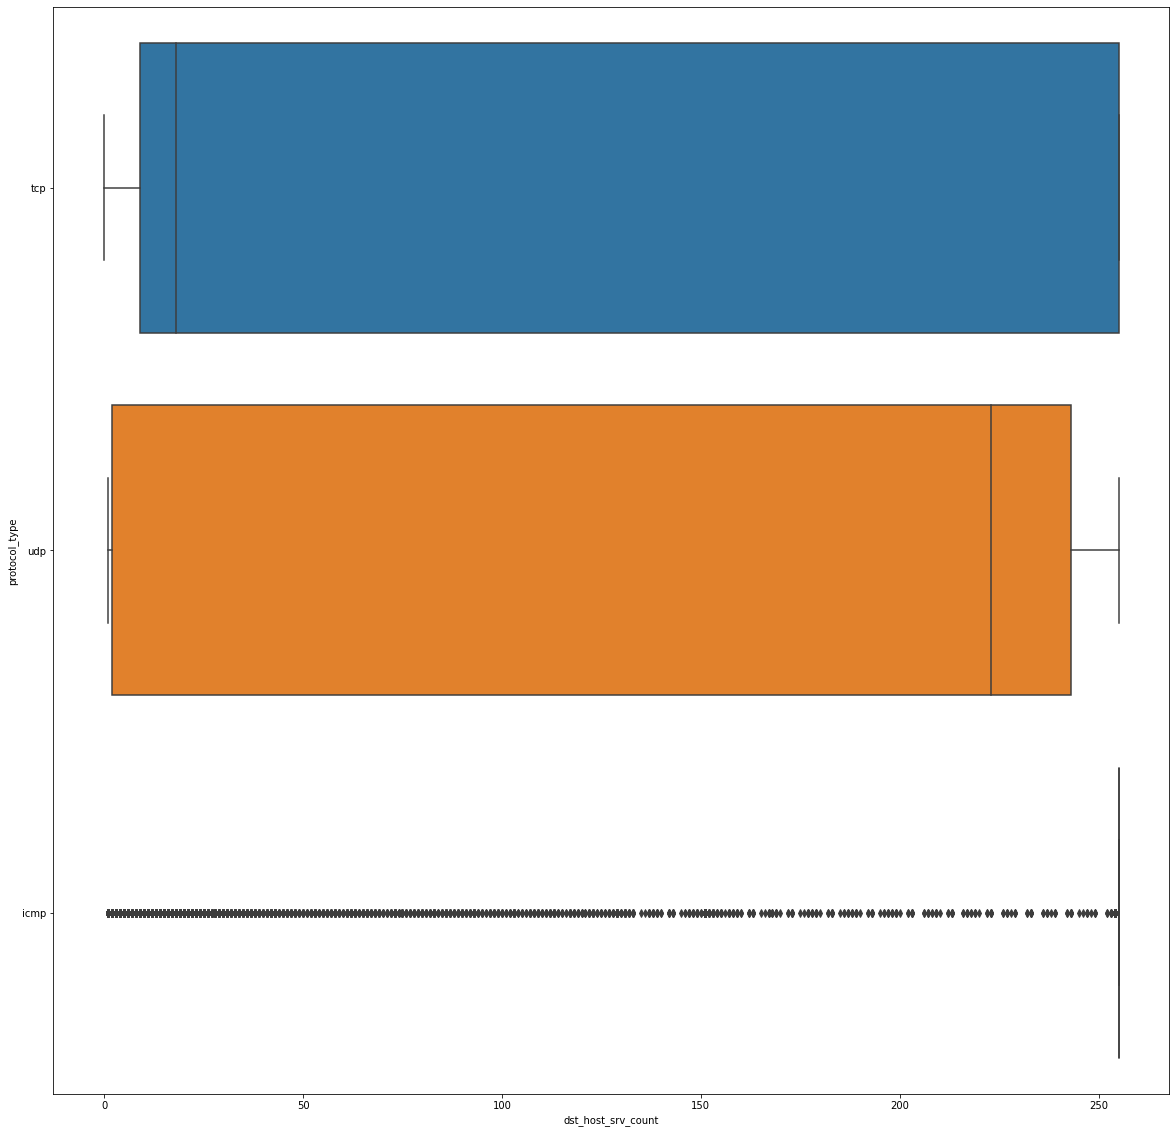

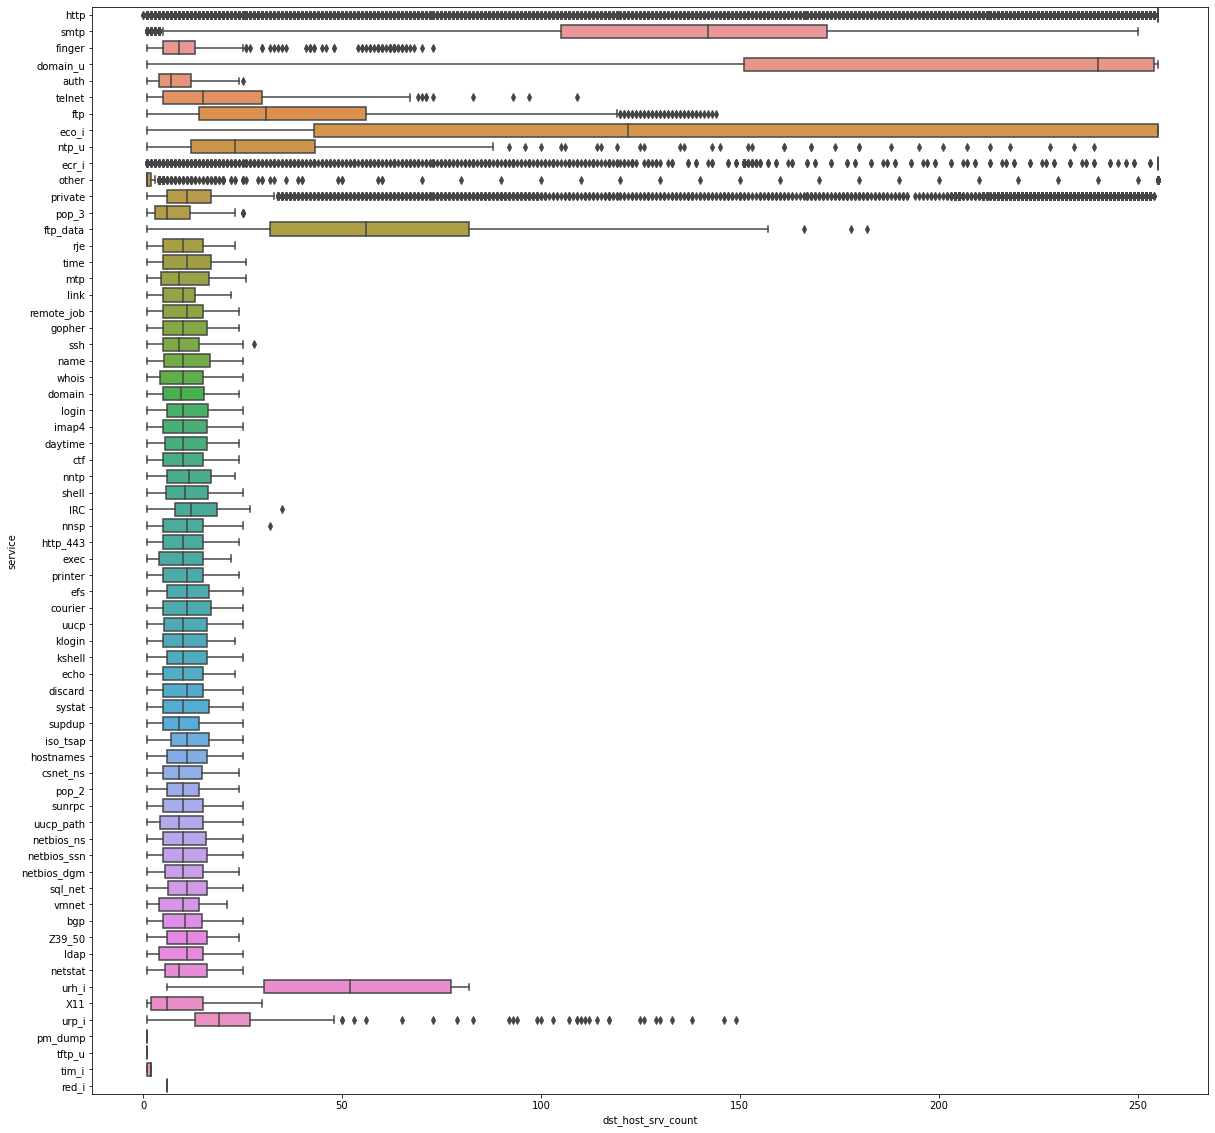

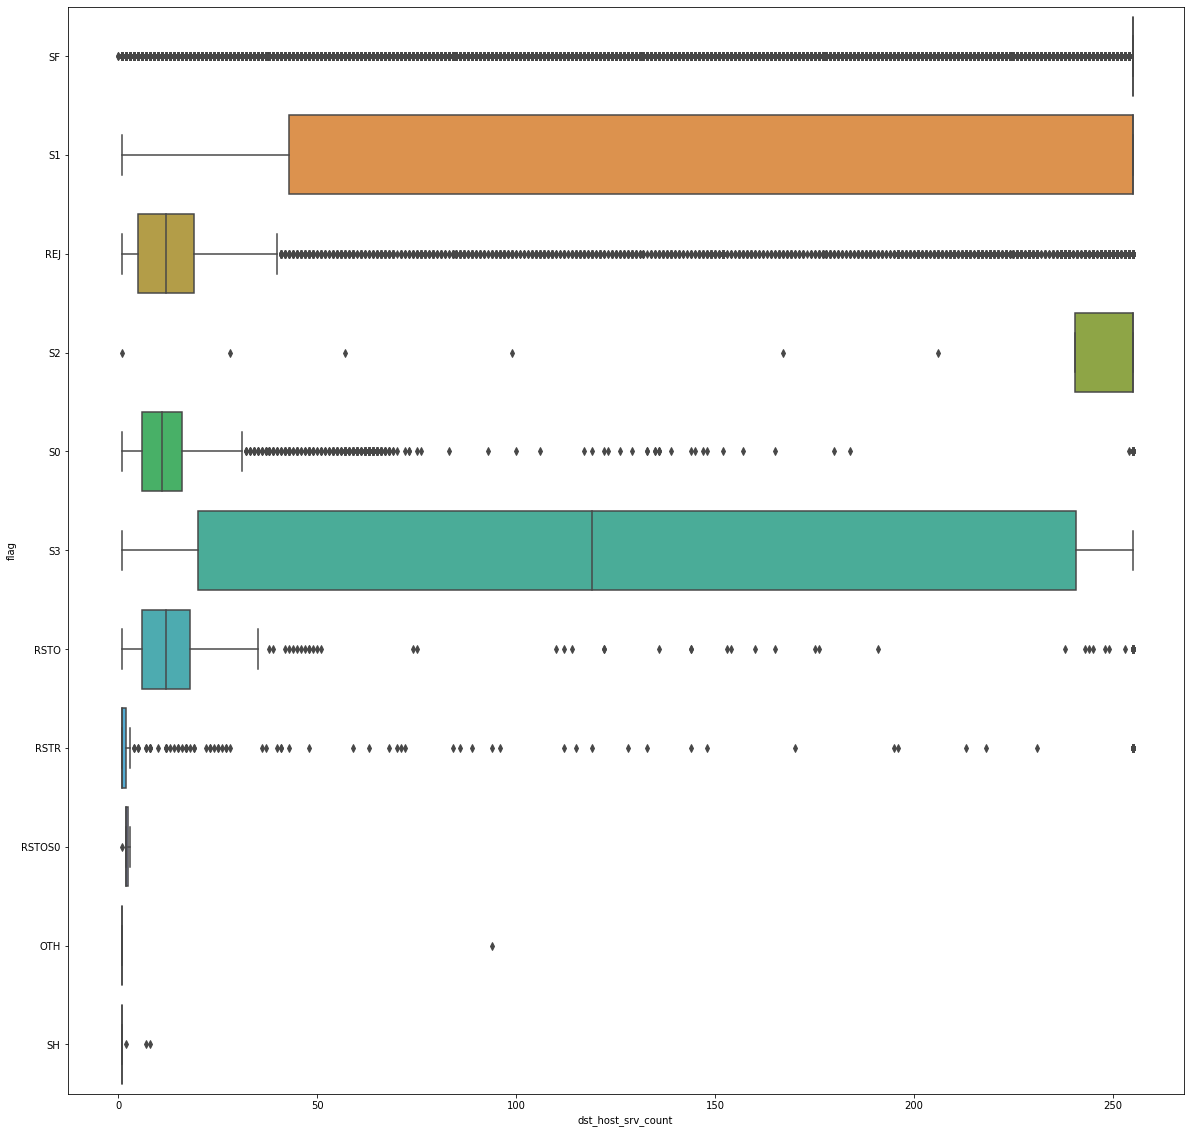

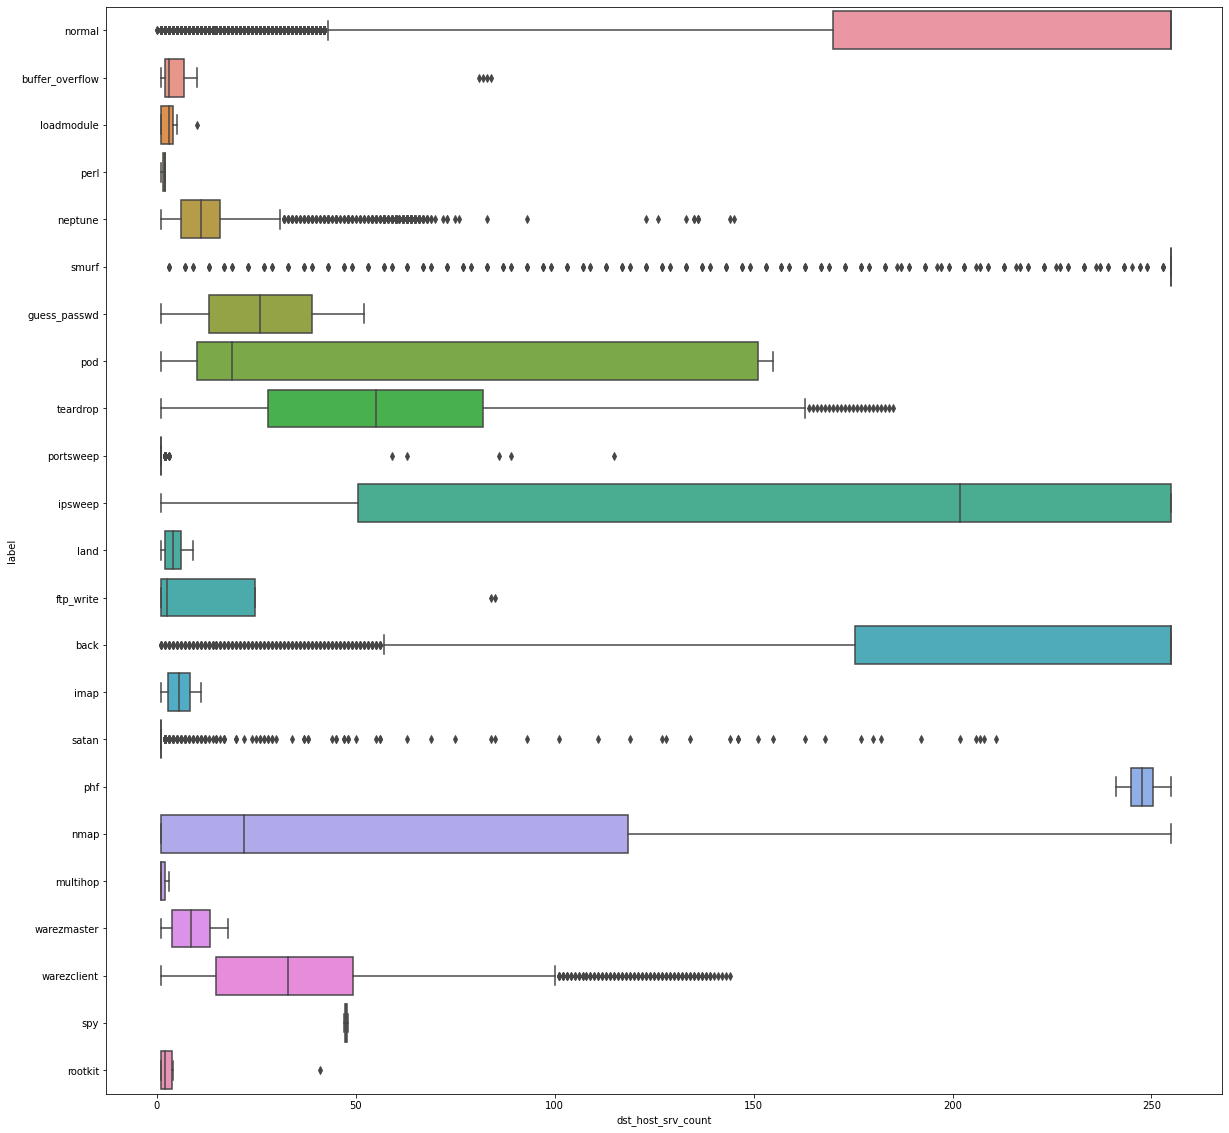

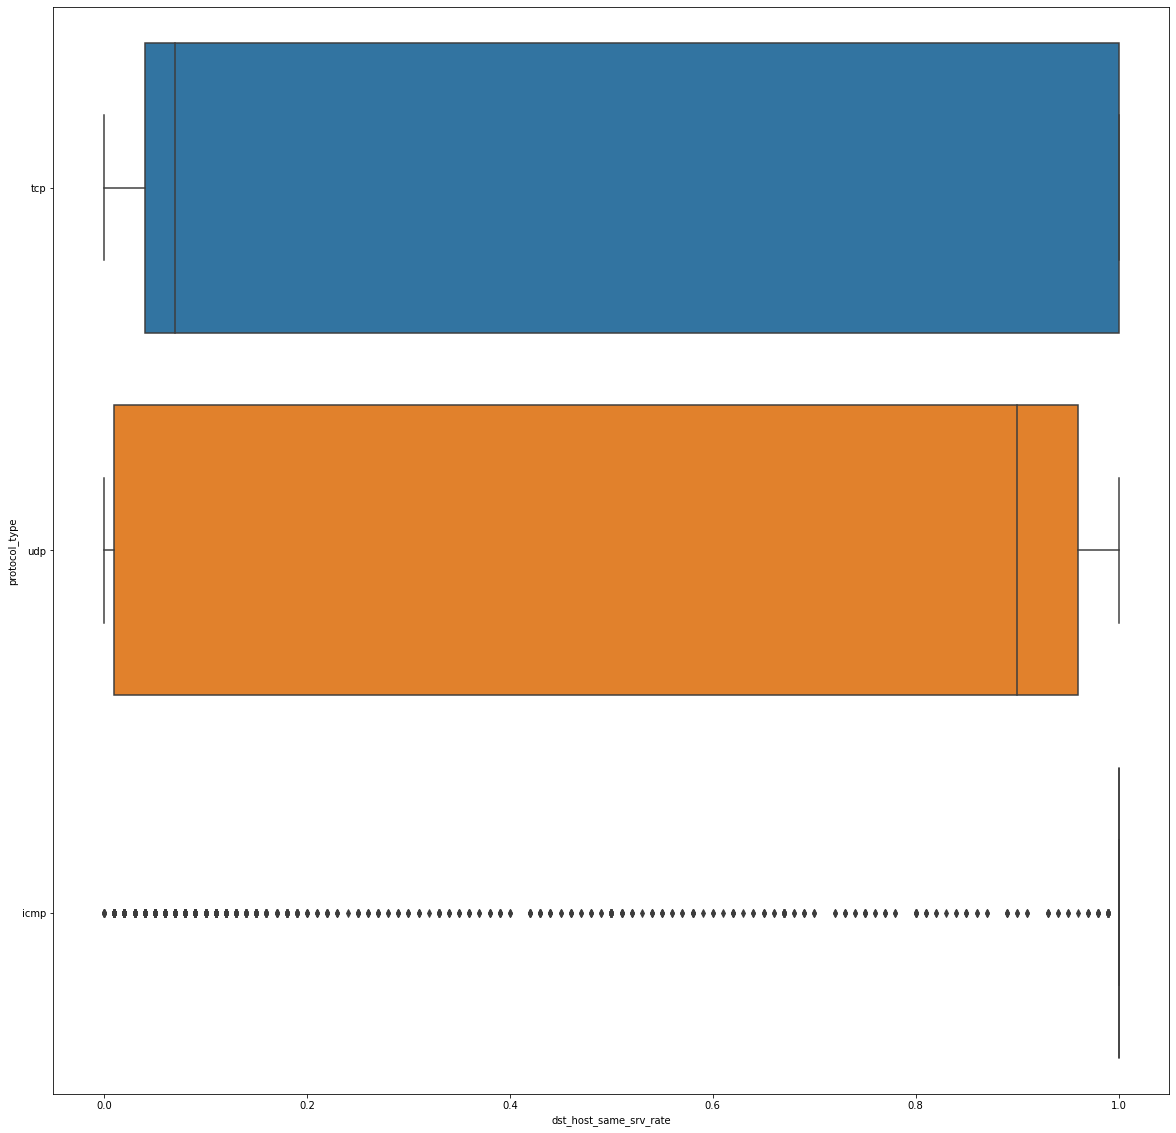

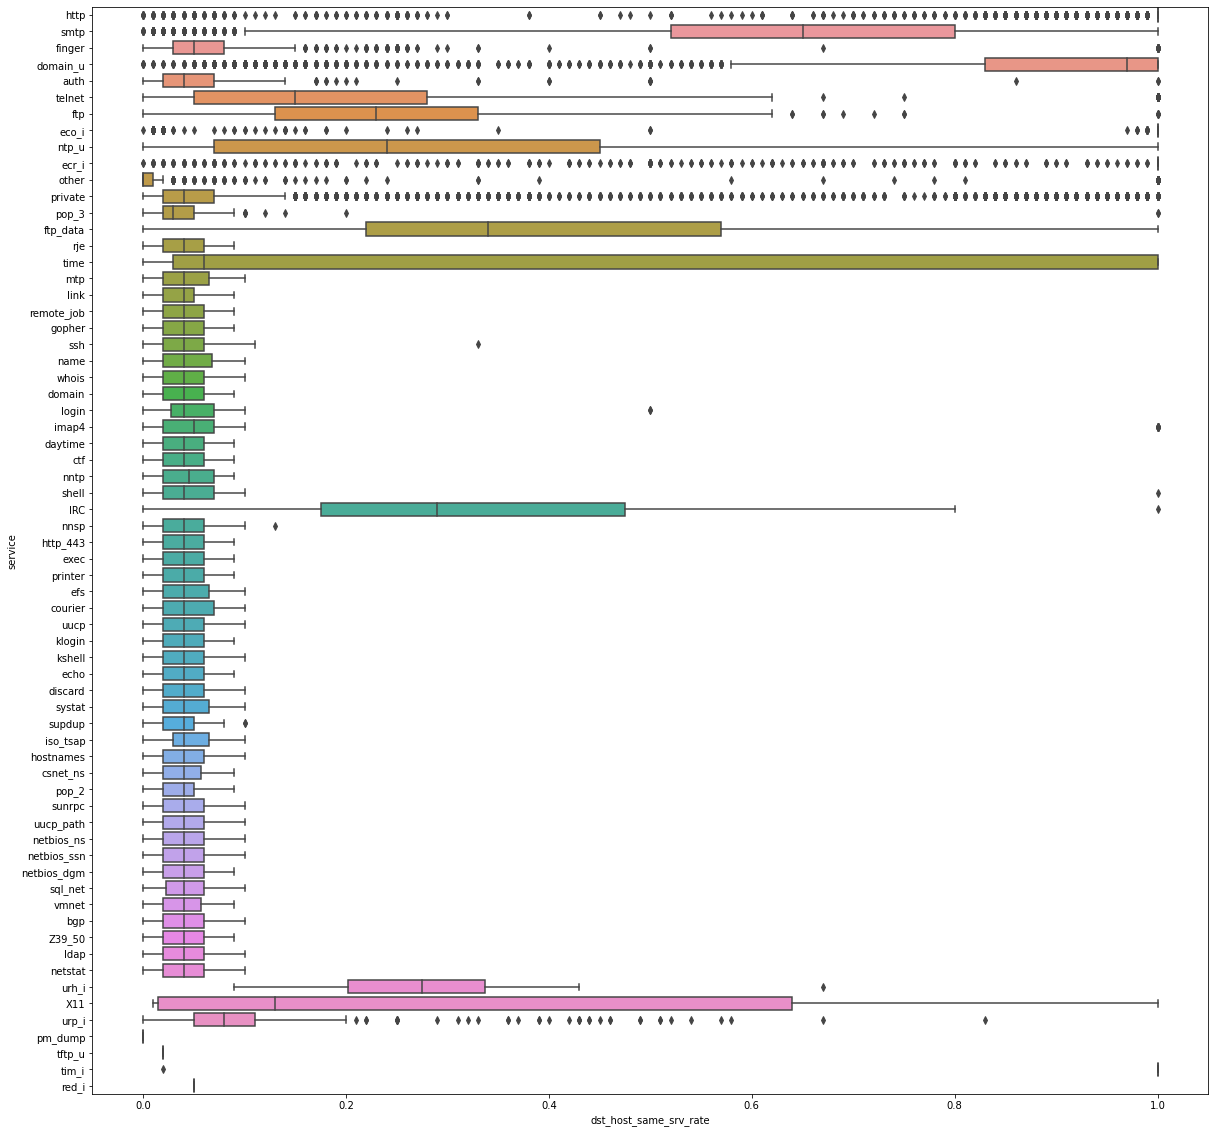

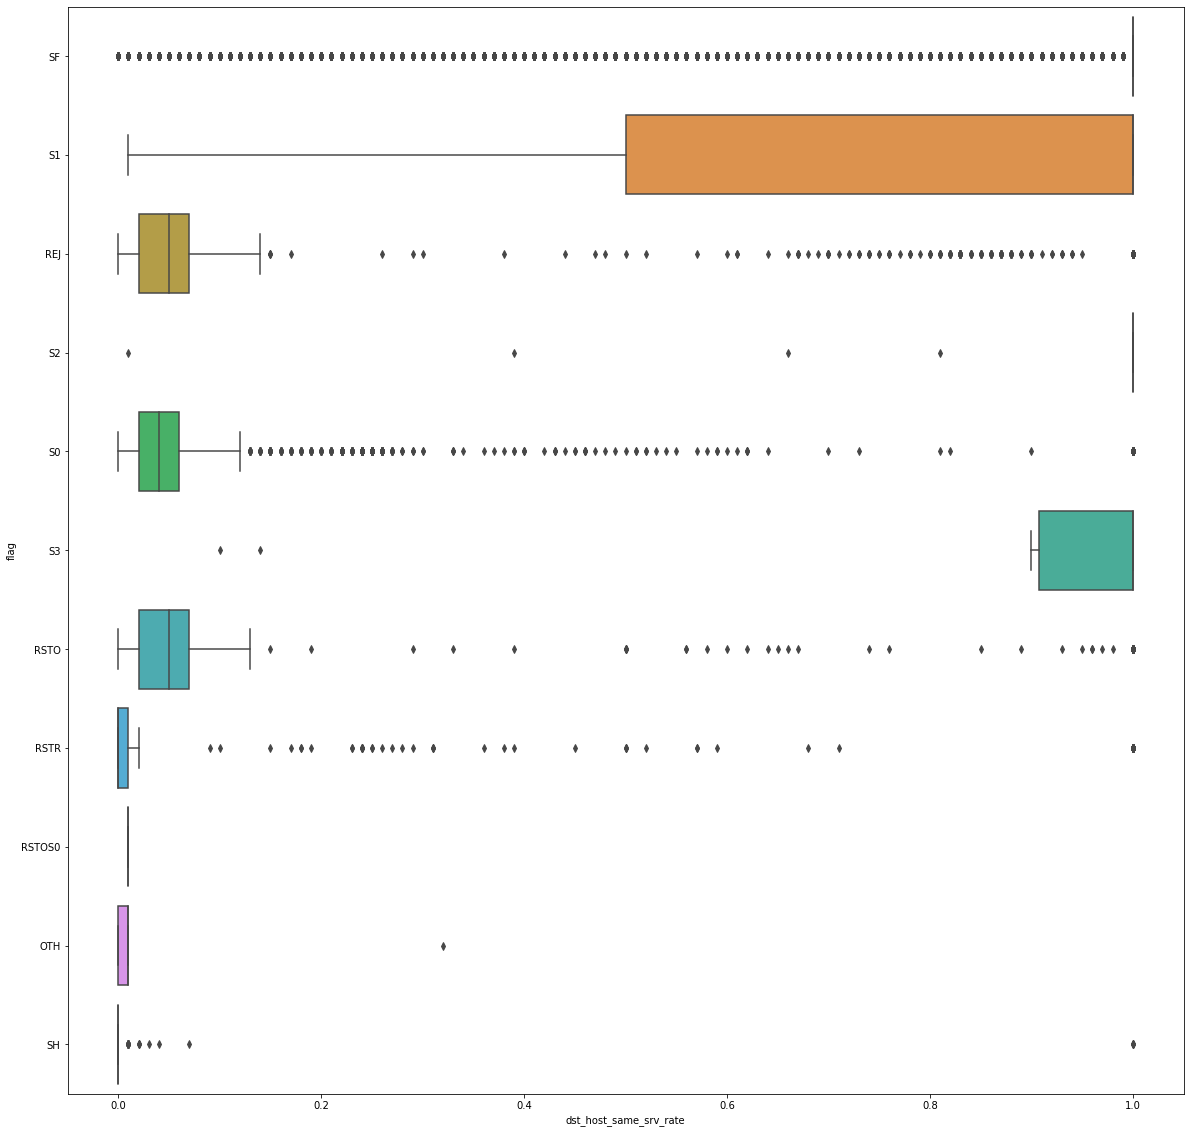

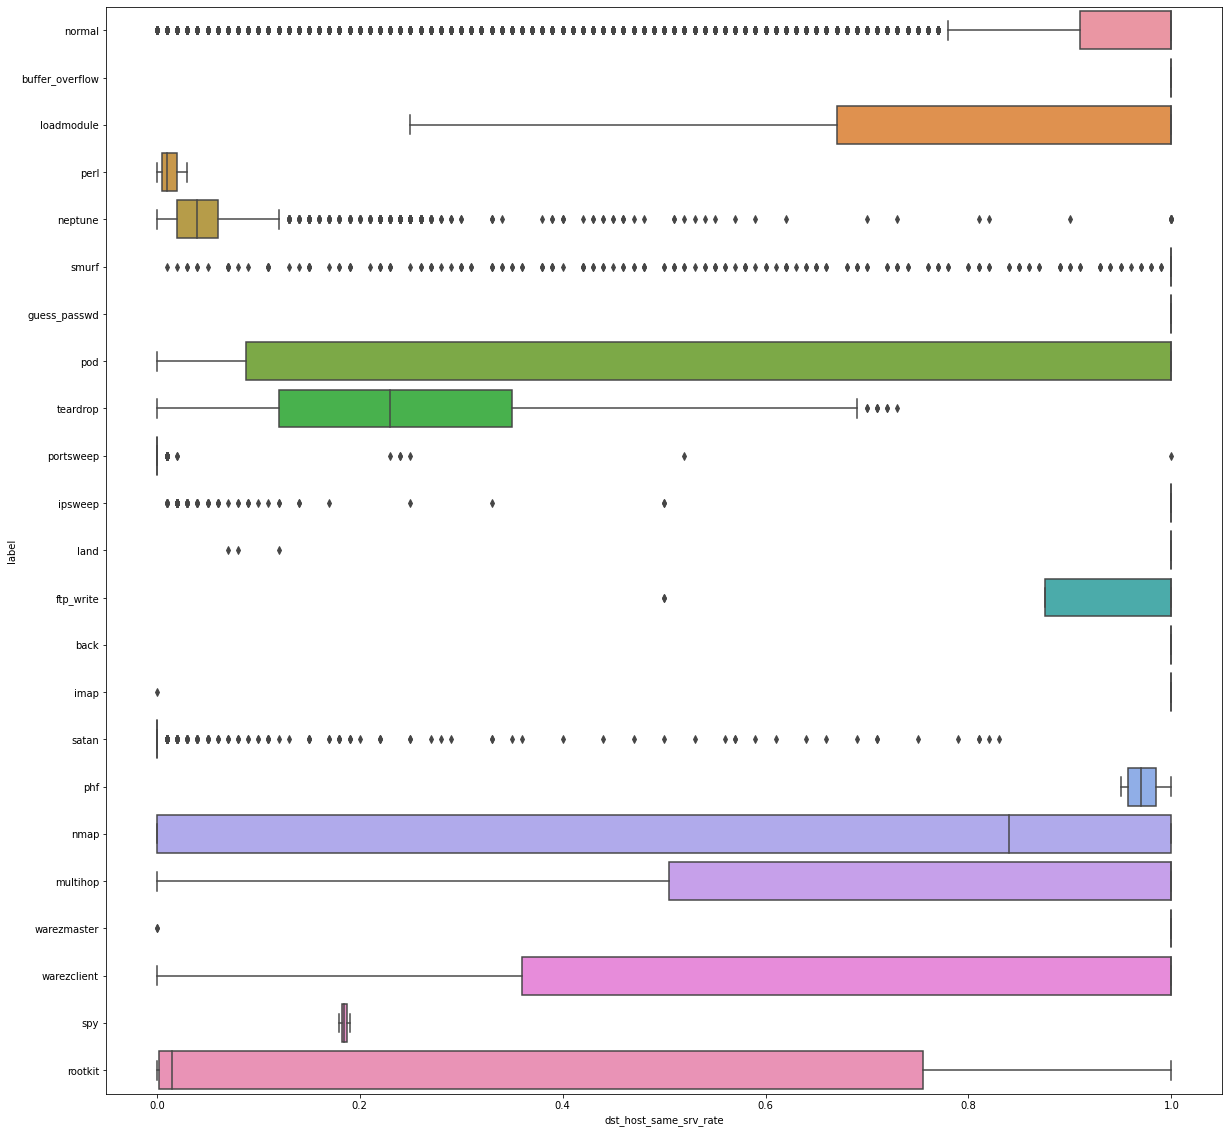

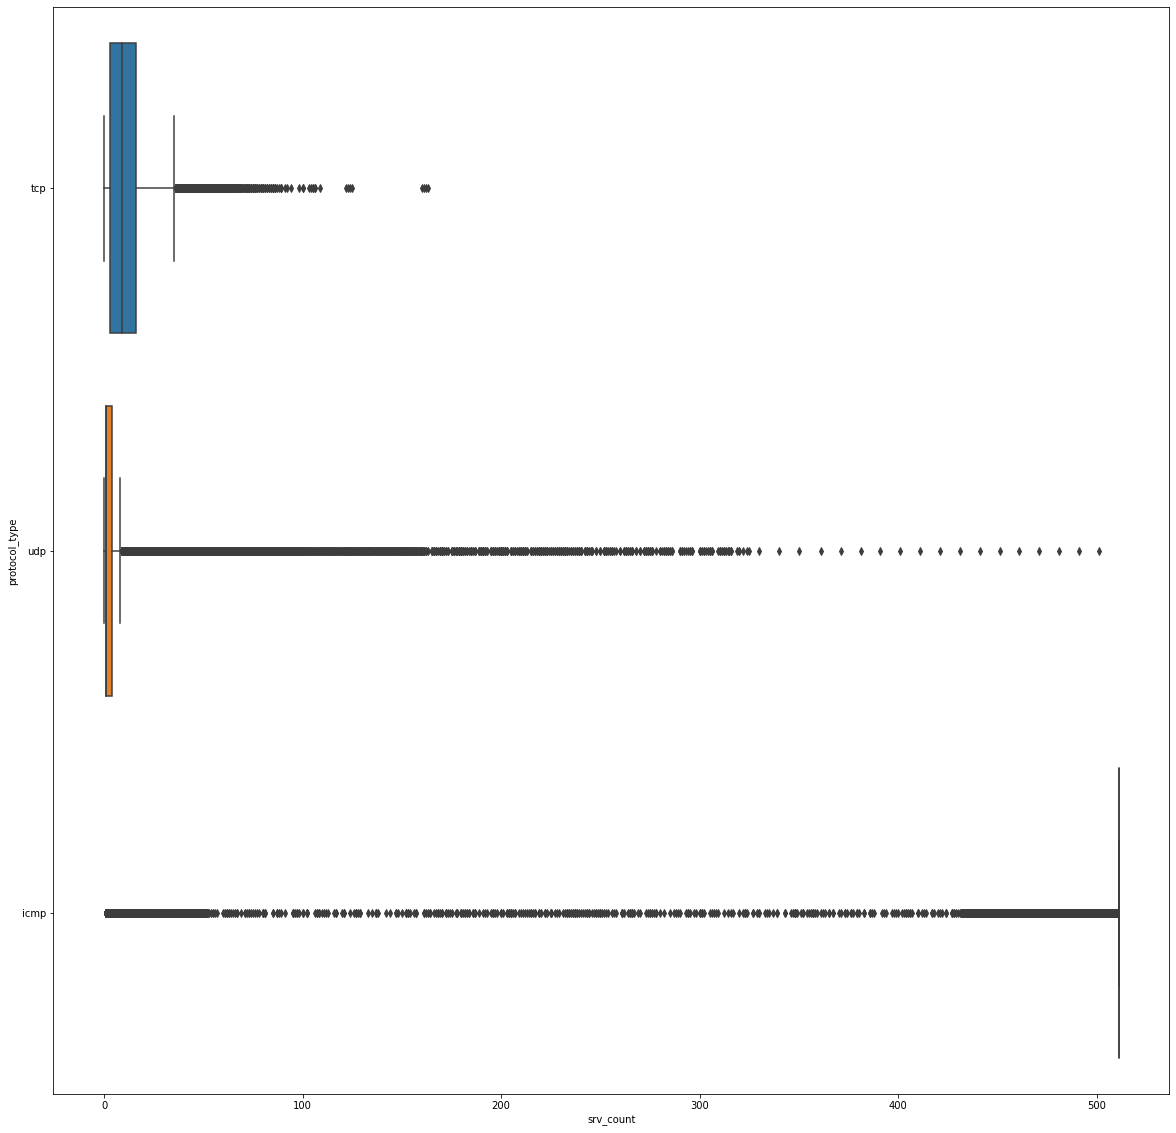

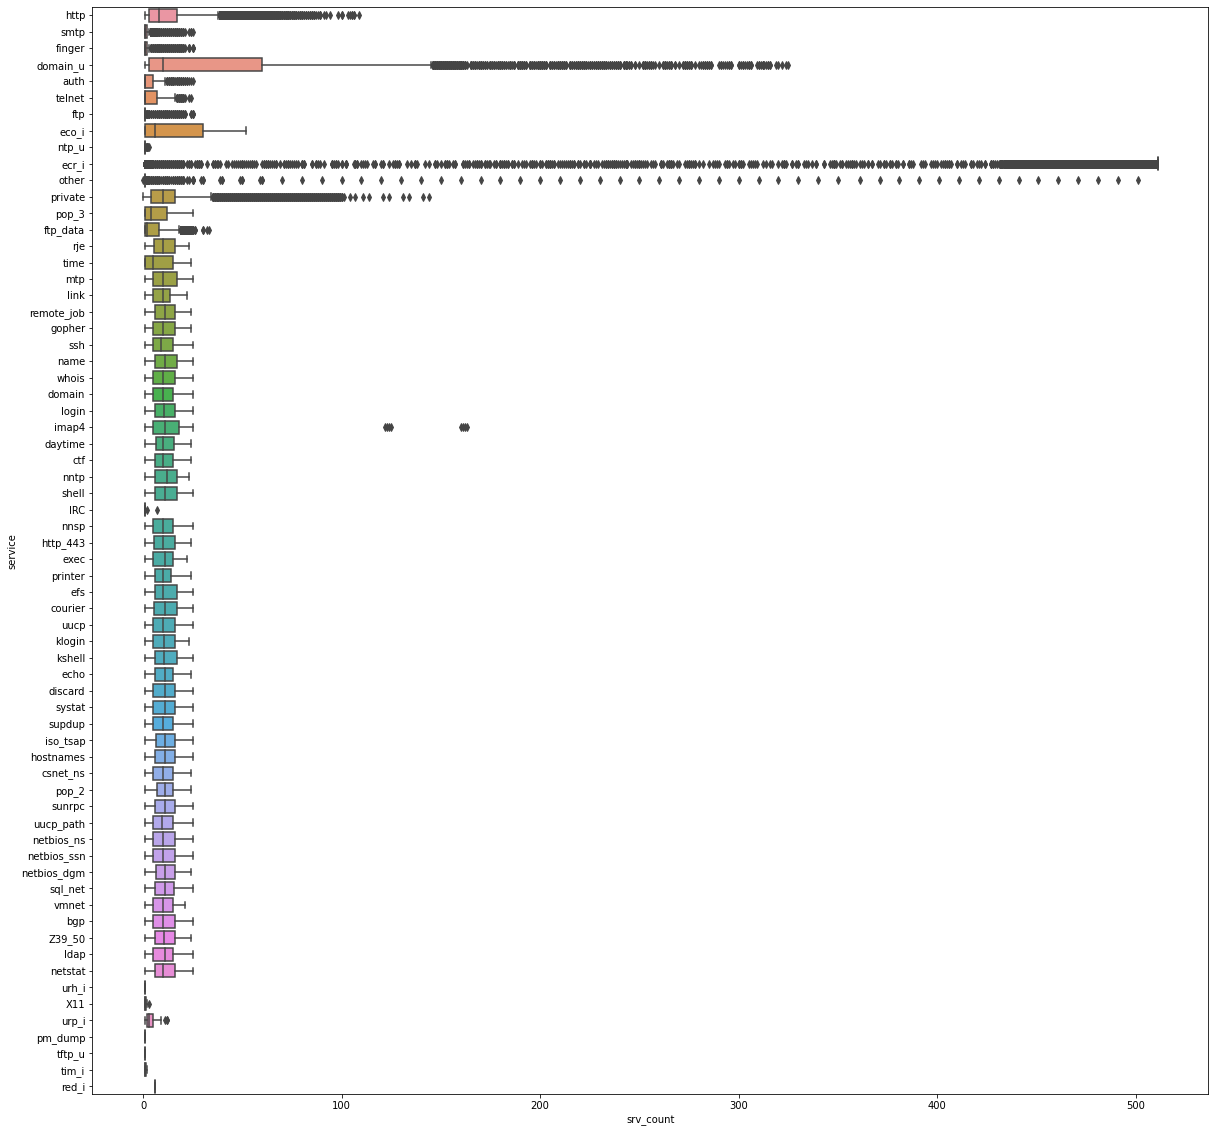

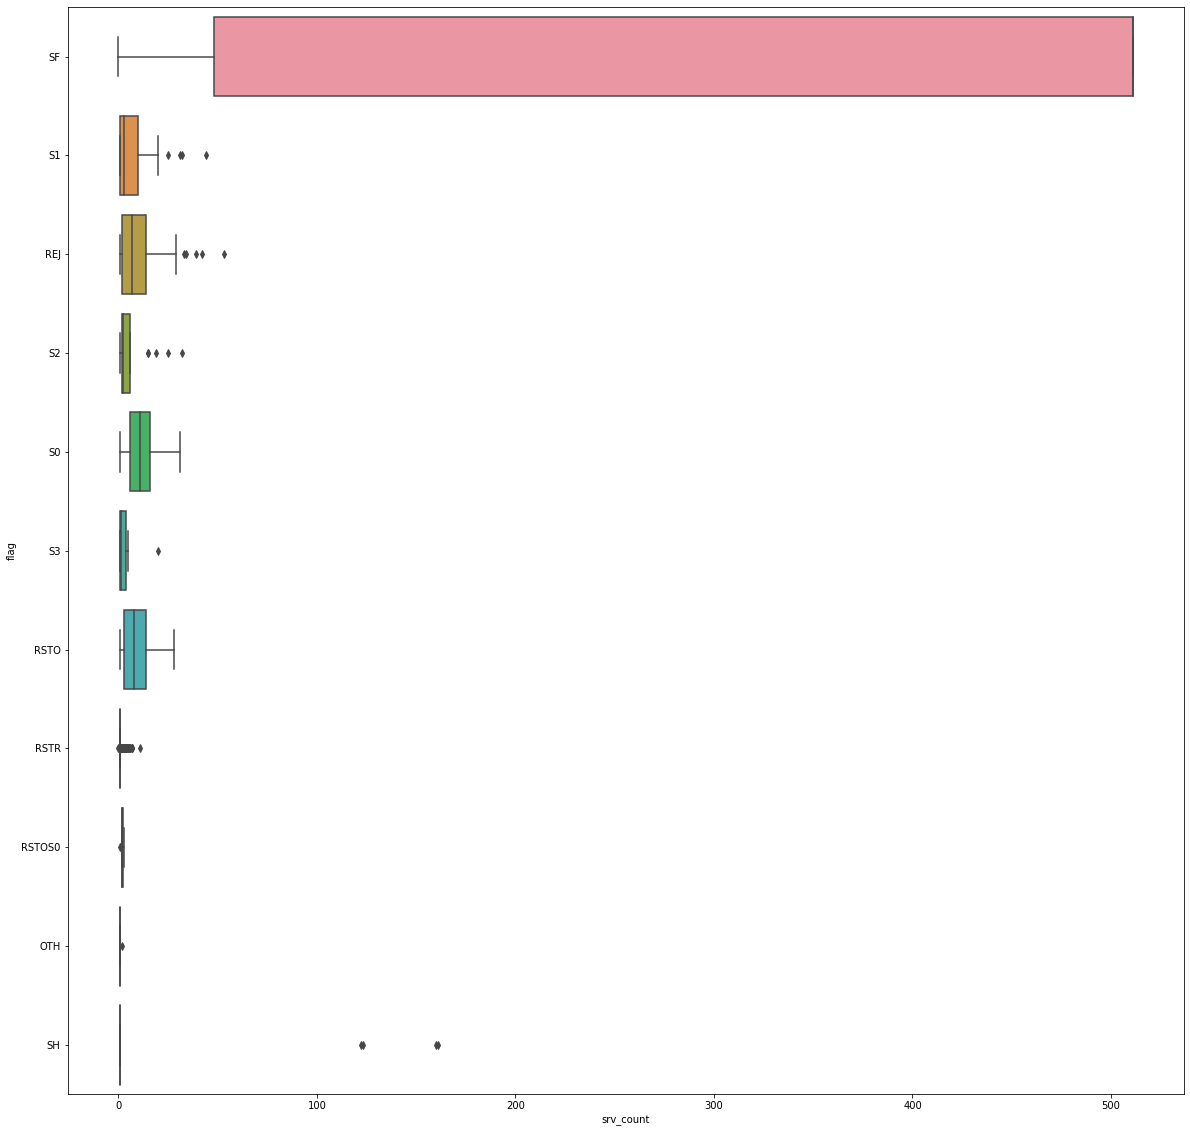

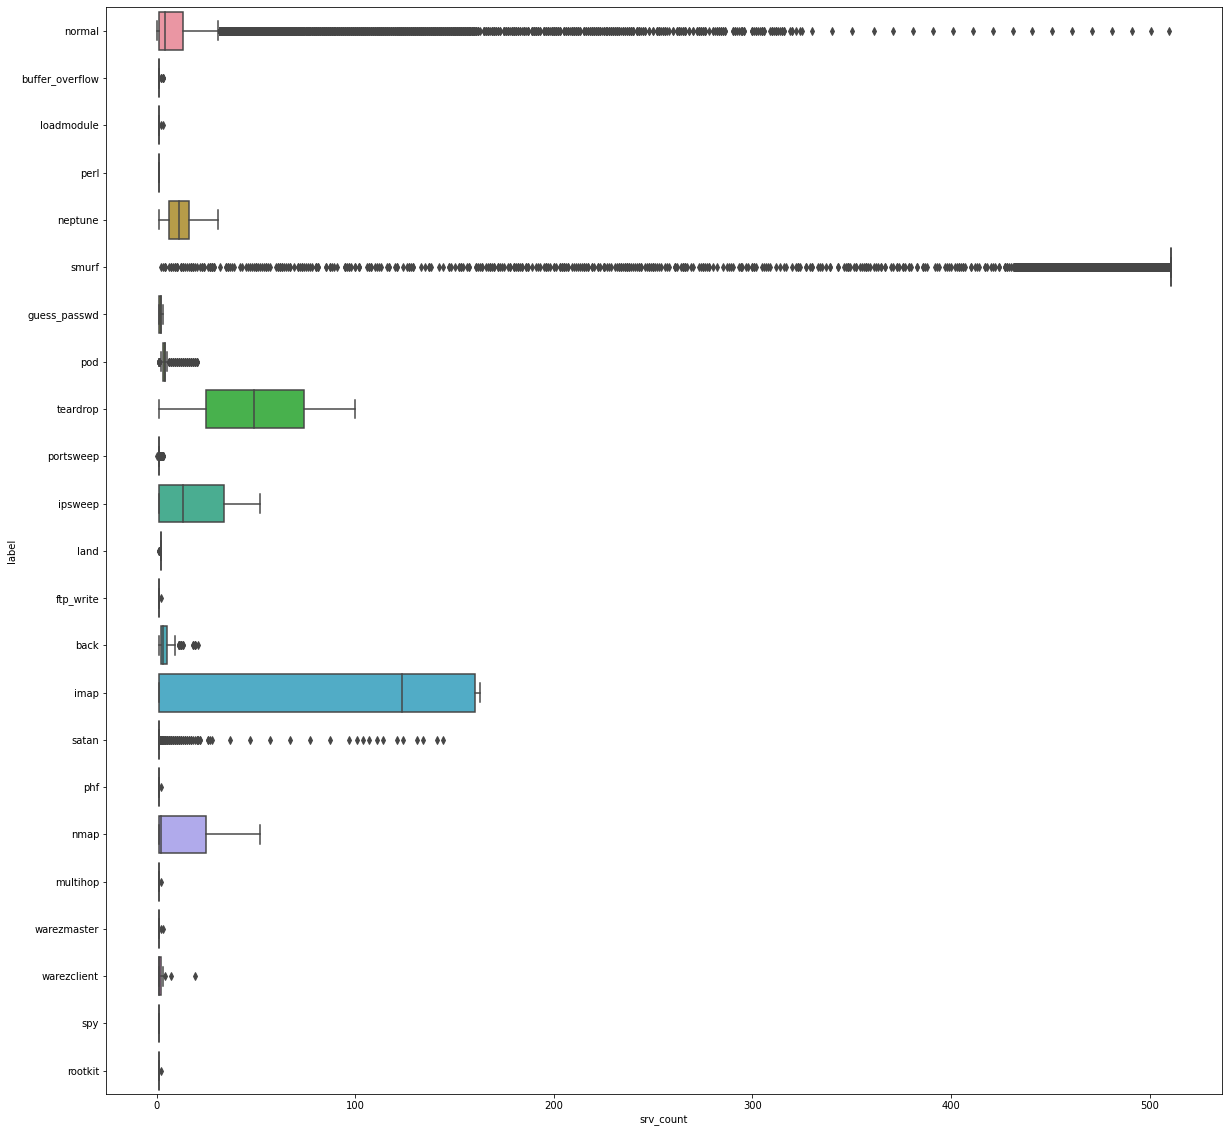

In [37]:
cnt=0
for i,y in enumerate(dst):
  for j,x in enumerate(cat_col):
      plt.figure(cnt+1)
      plt.figure(figsize = (20,20))
      sns.boxplot(data=df, x=y, y=x)
      # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
      cnt+=1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

<Figure size 432x288 with 0 Axes>

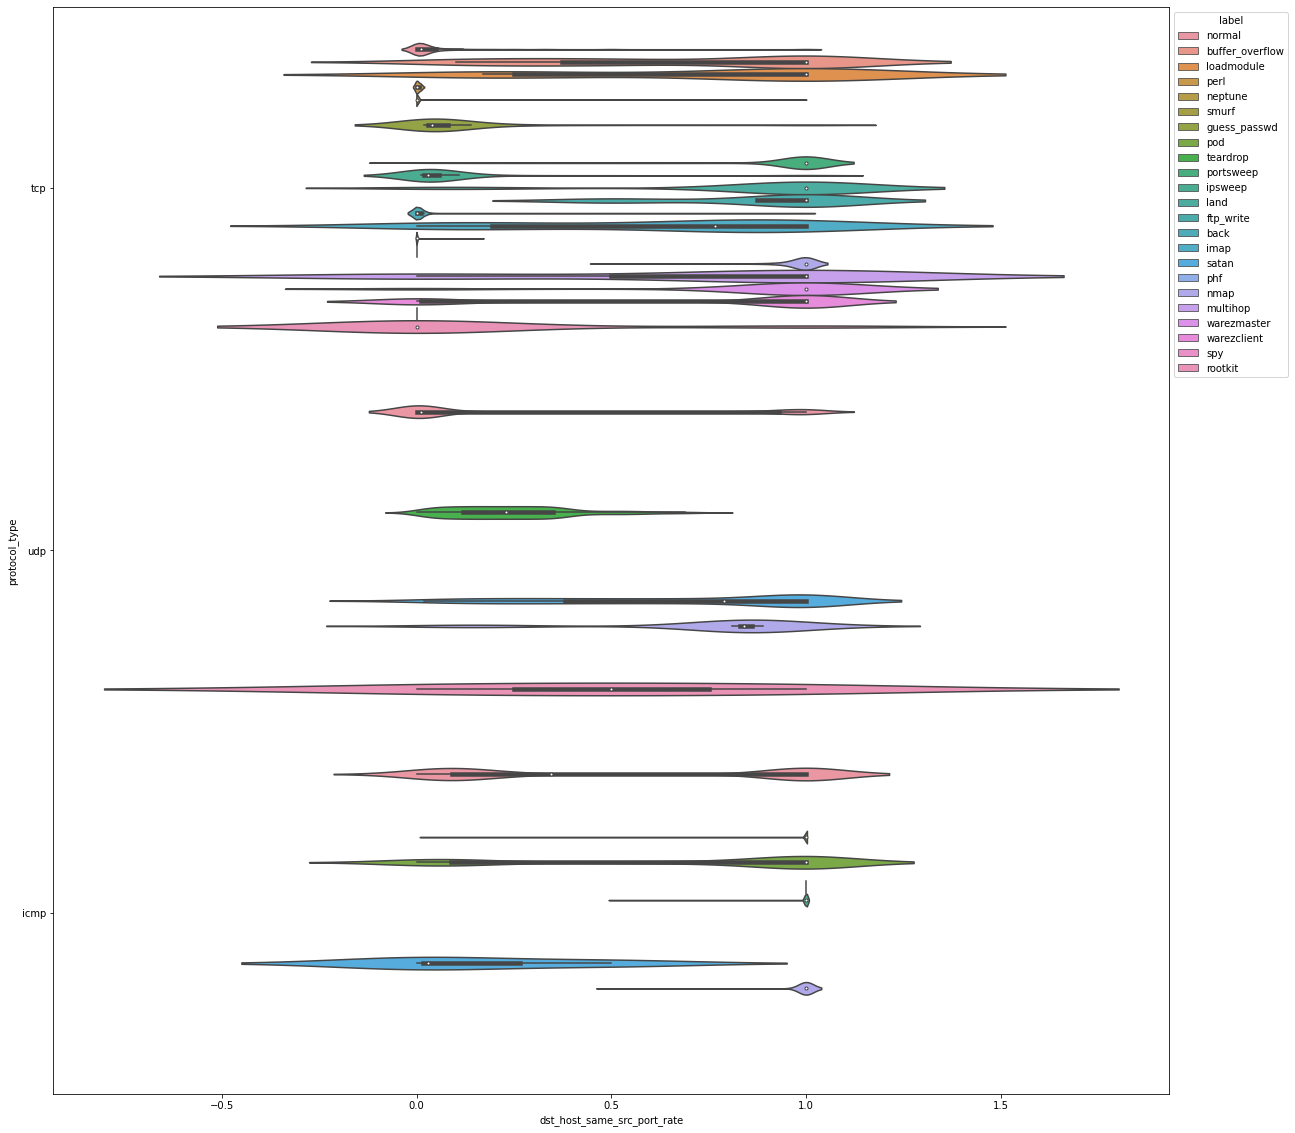

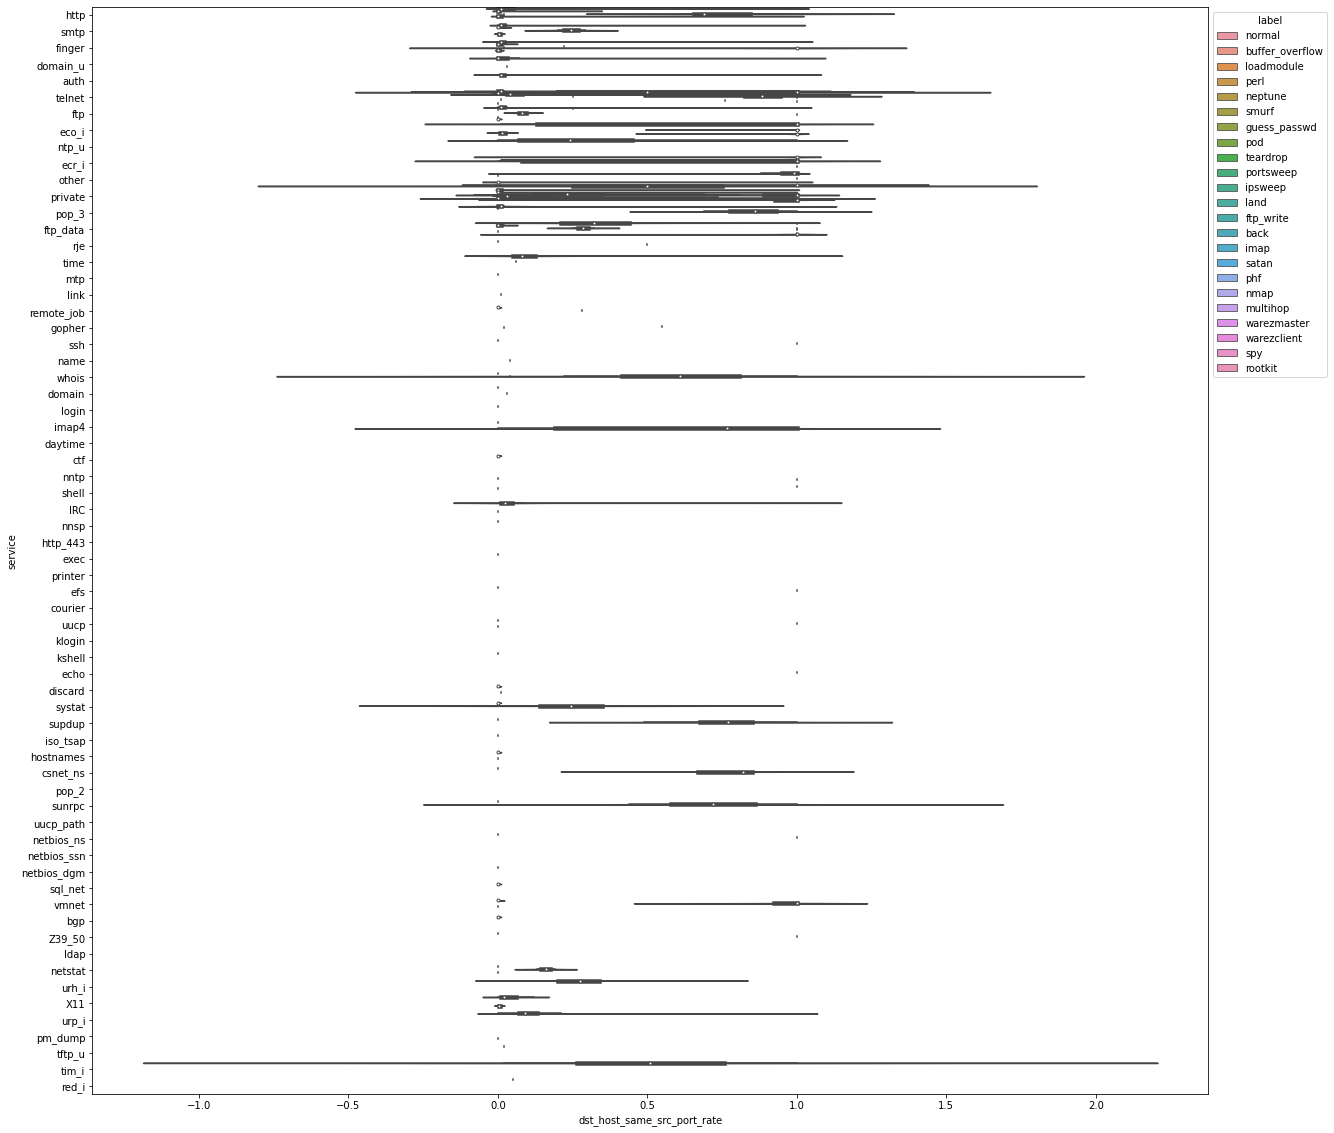

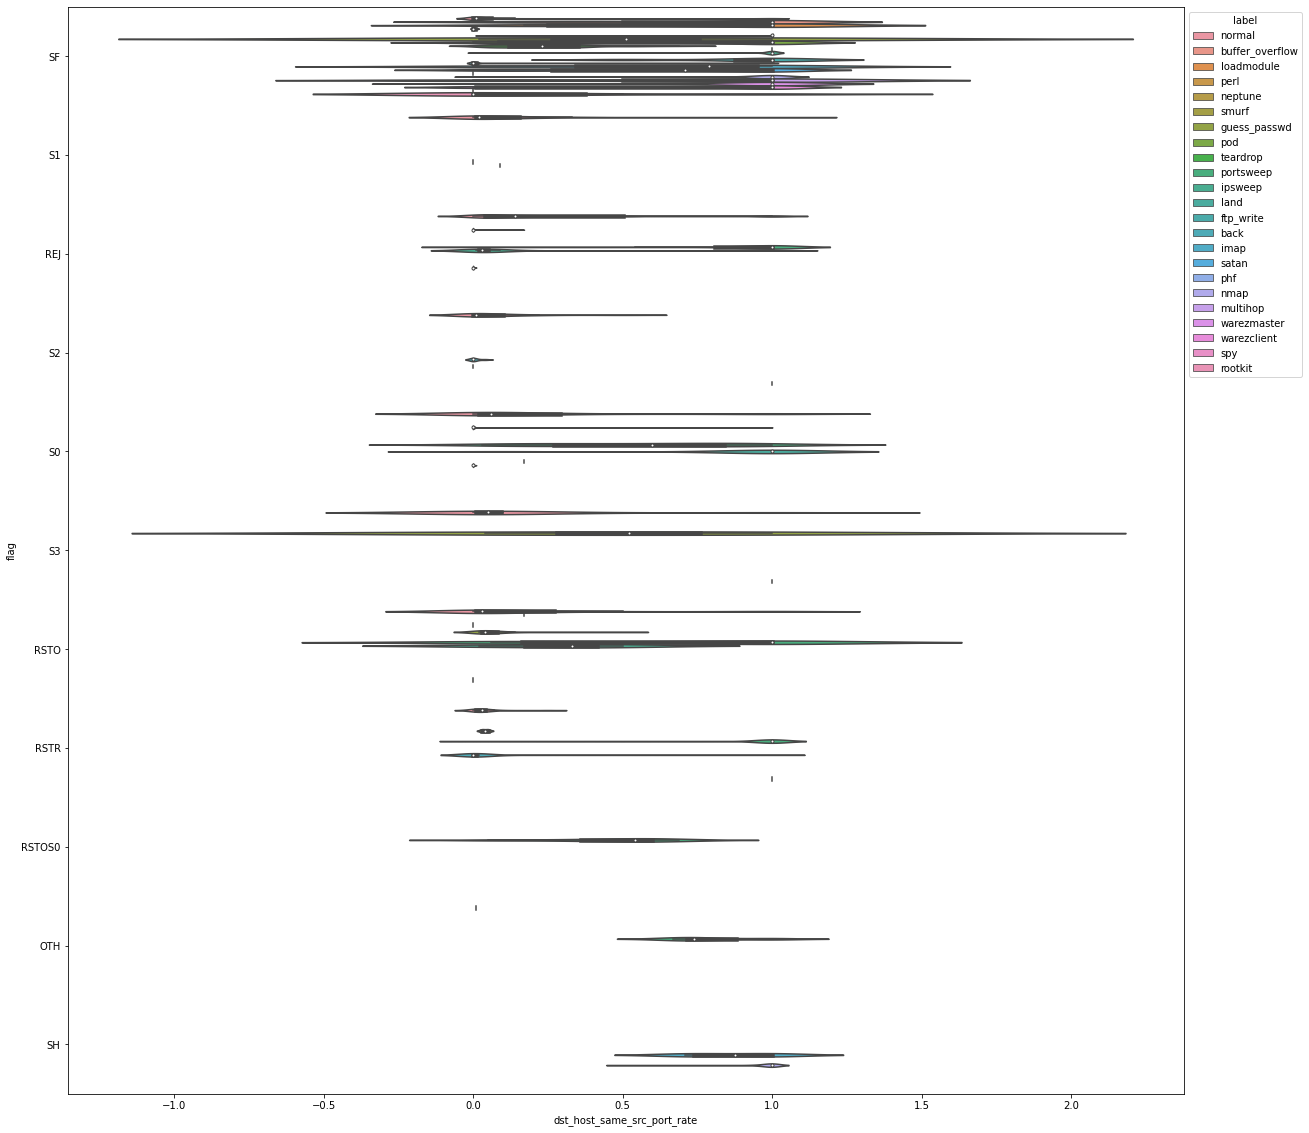

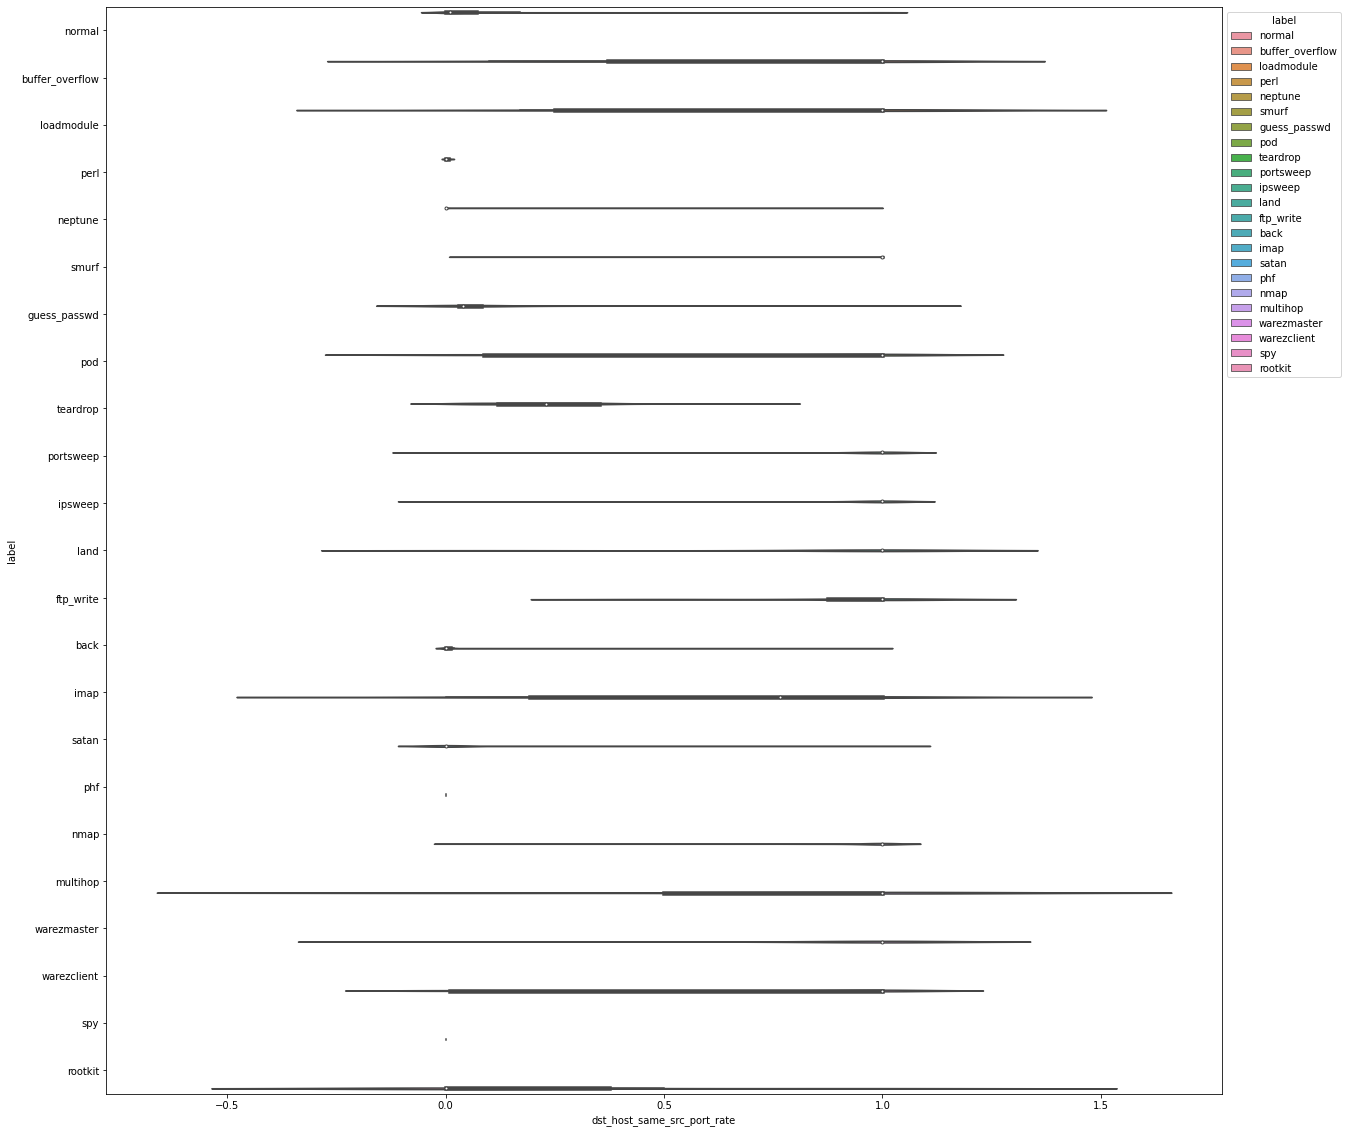

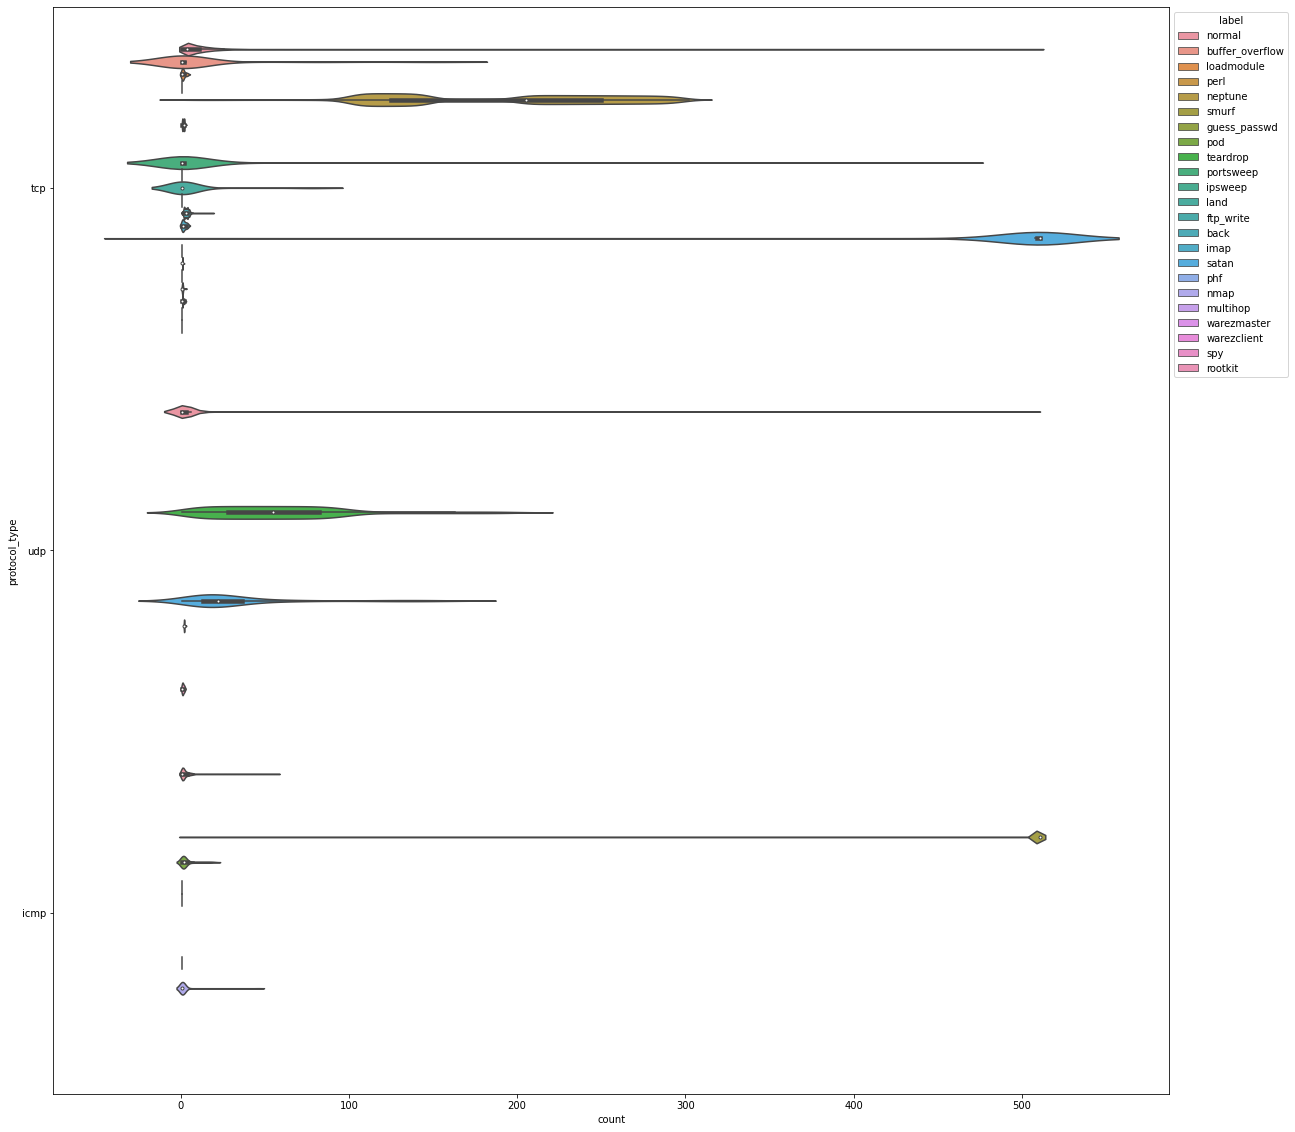

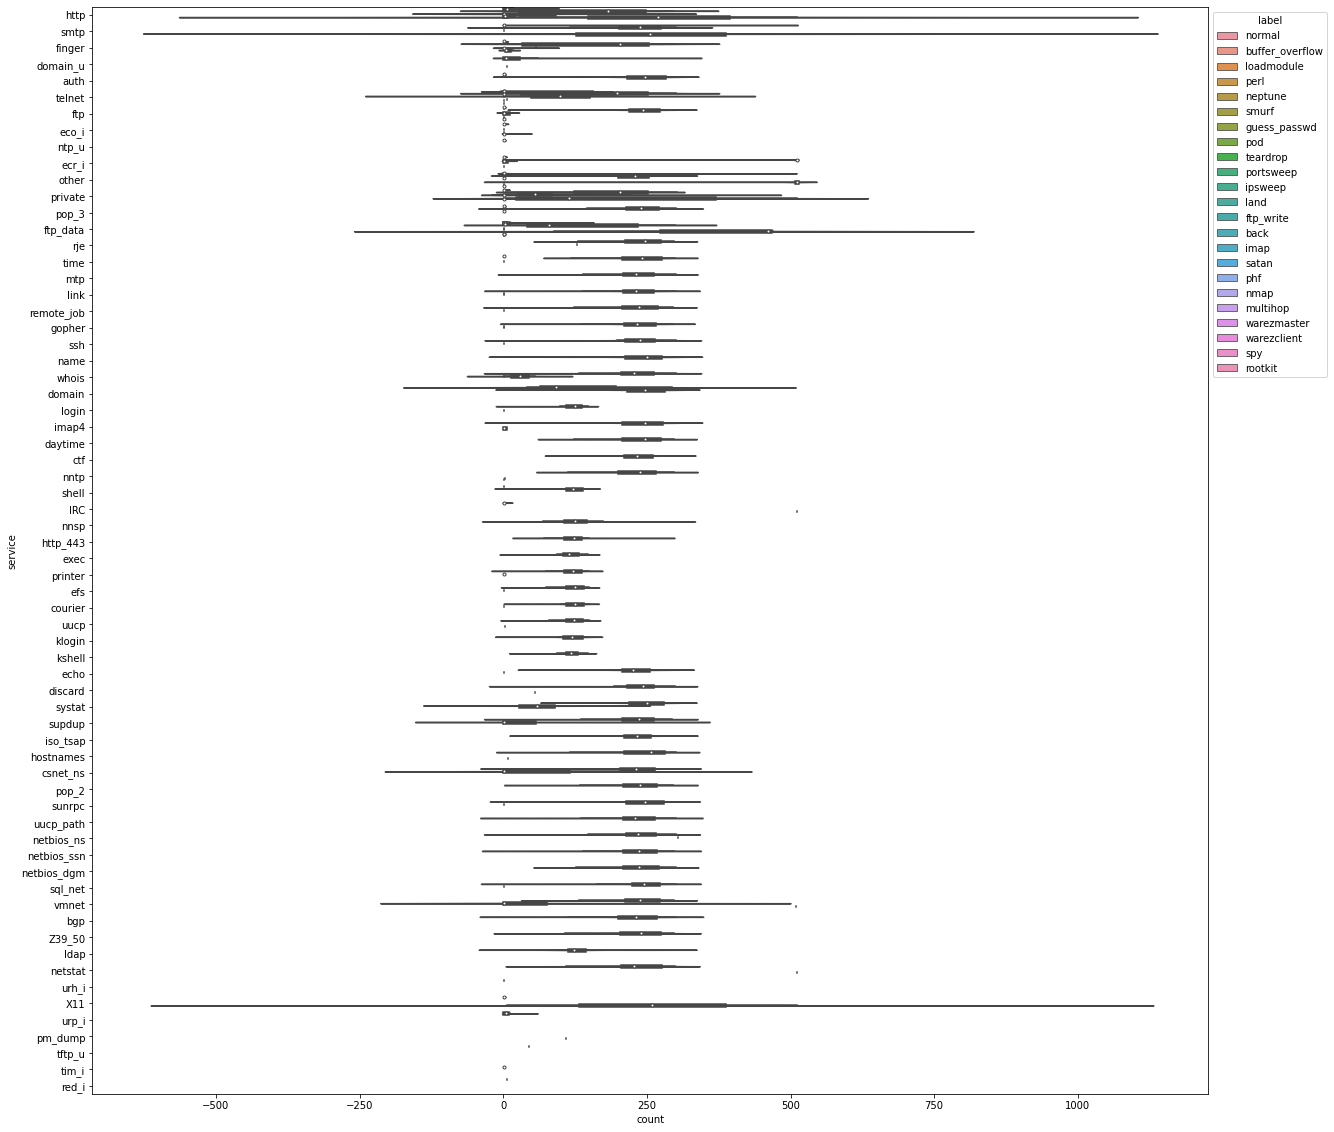

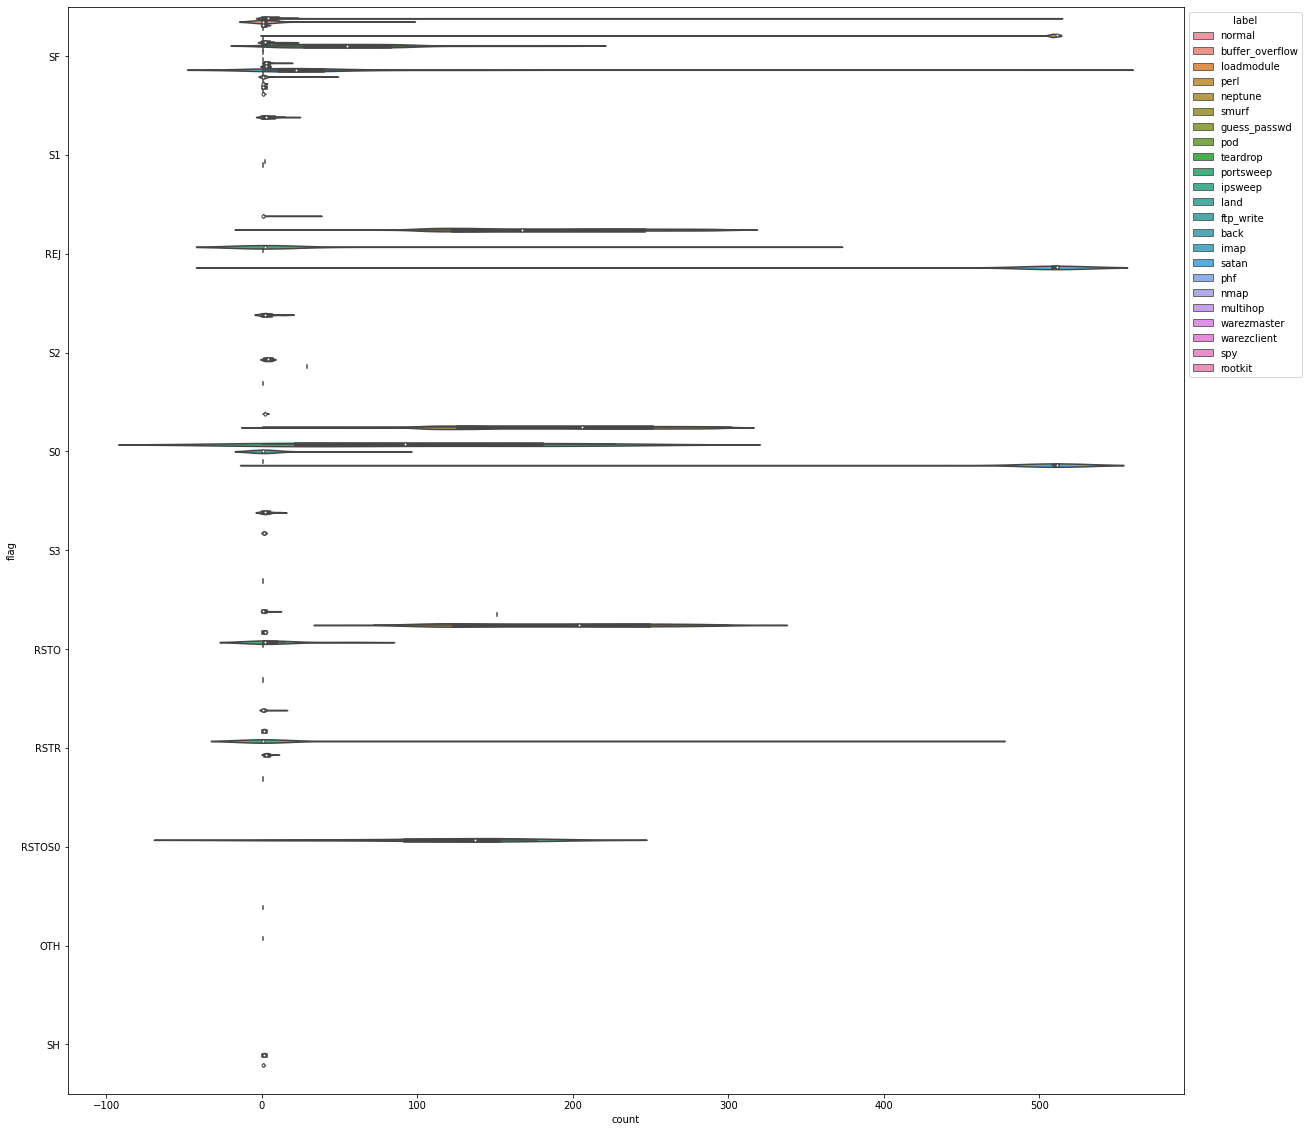

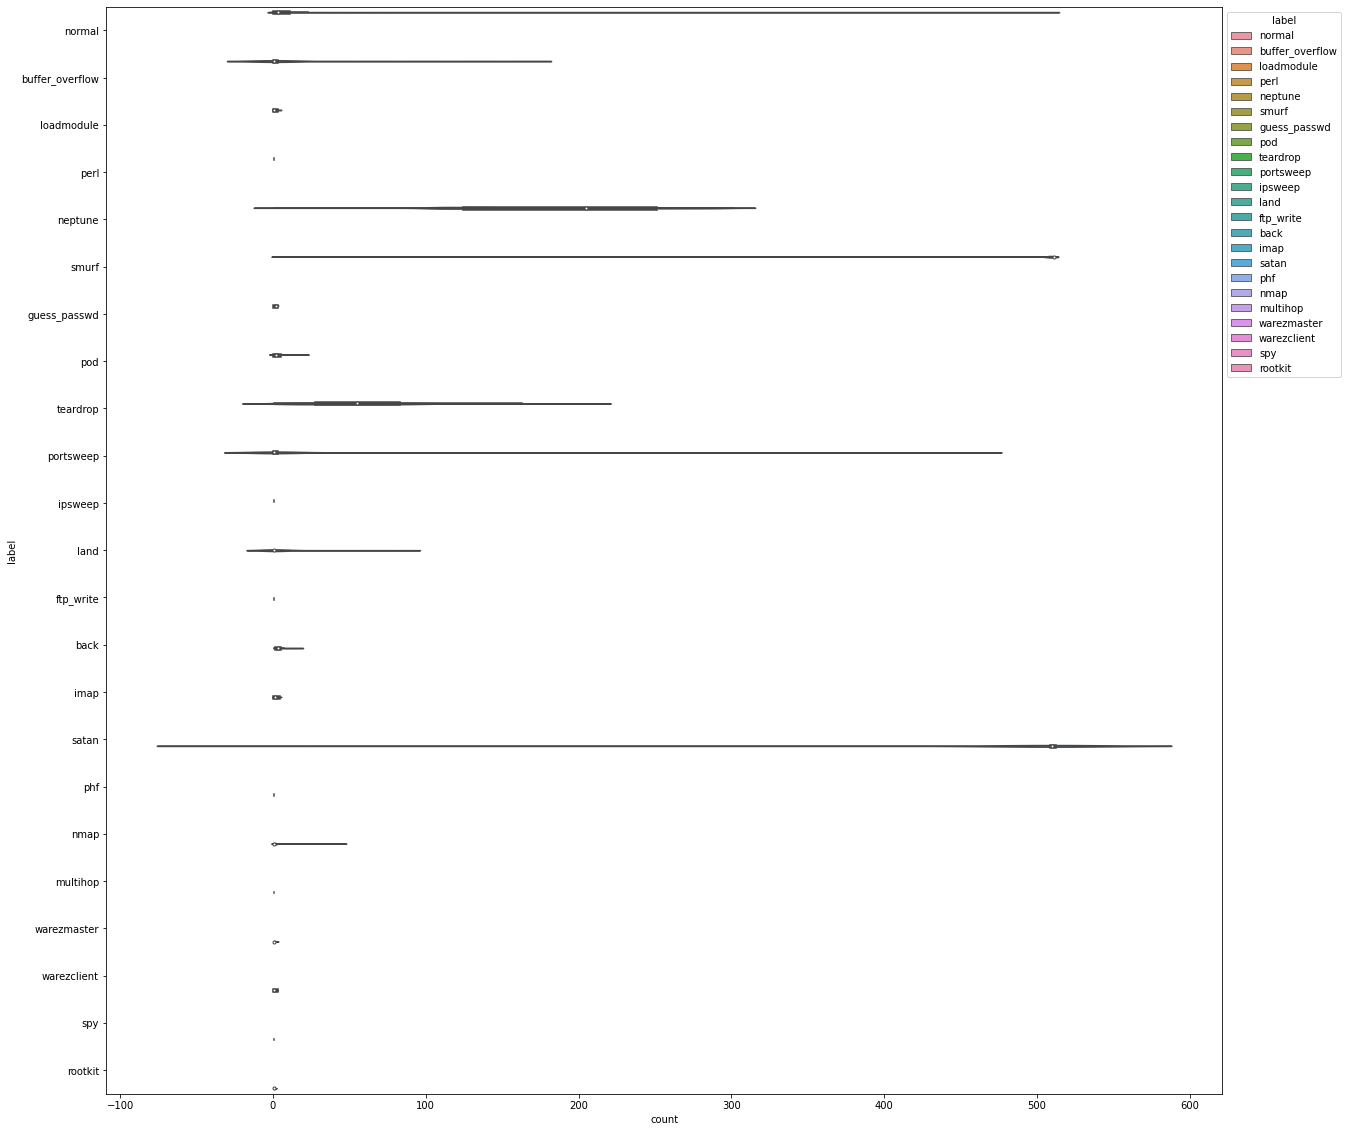

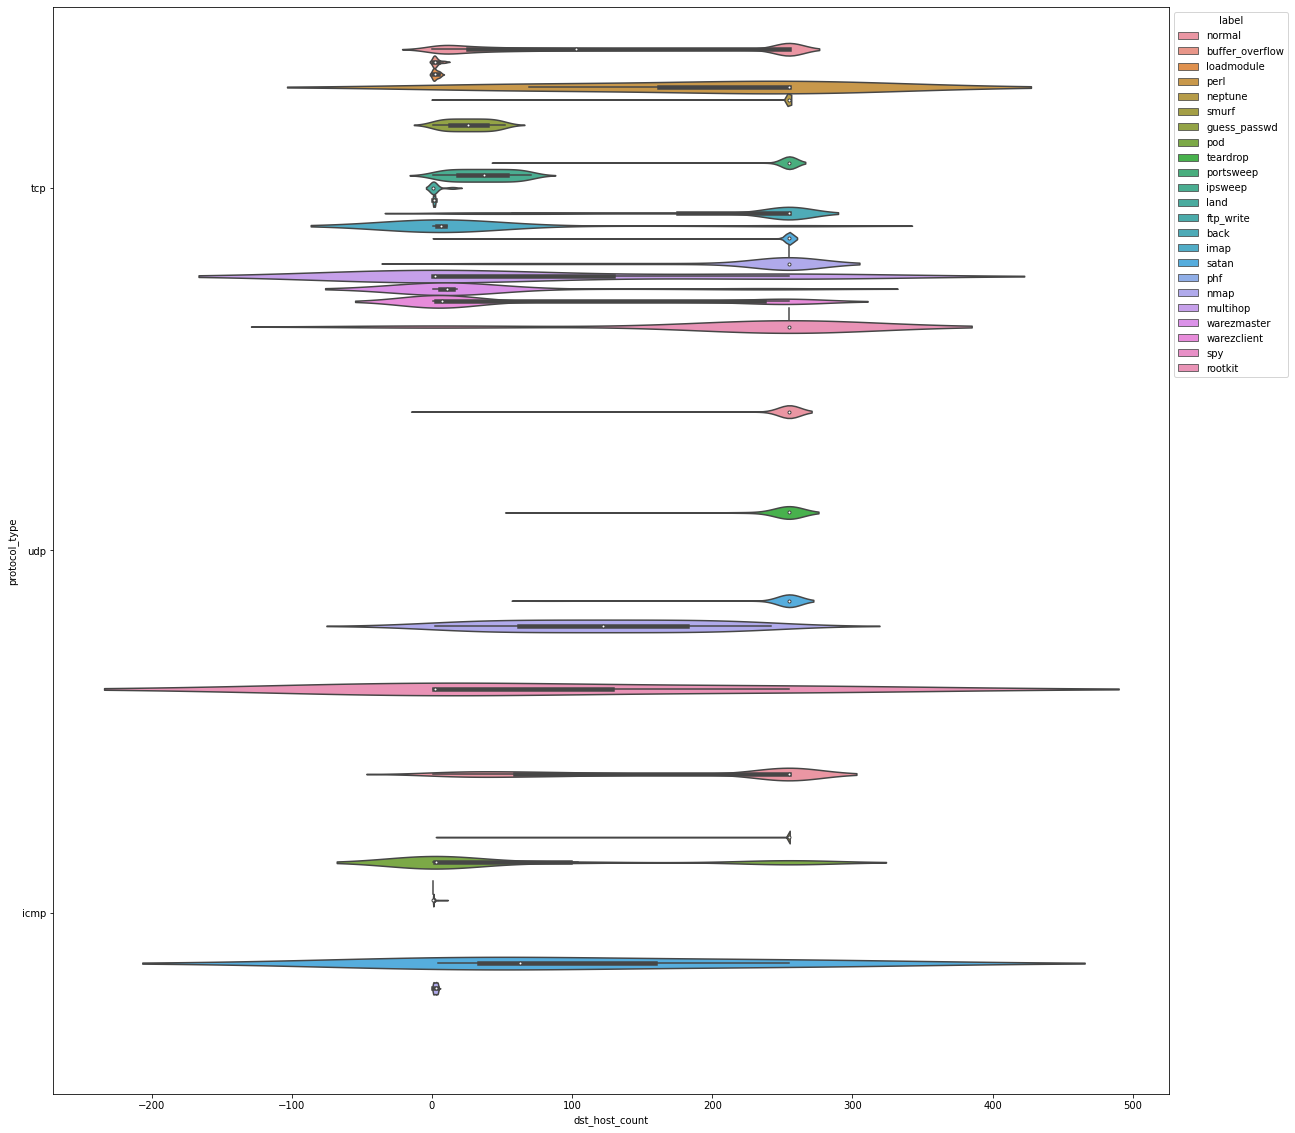

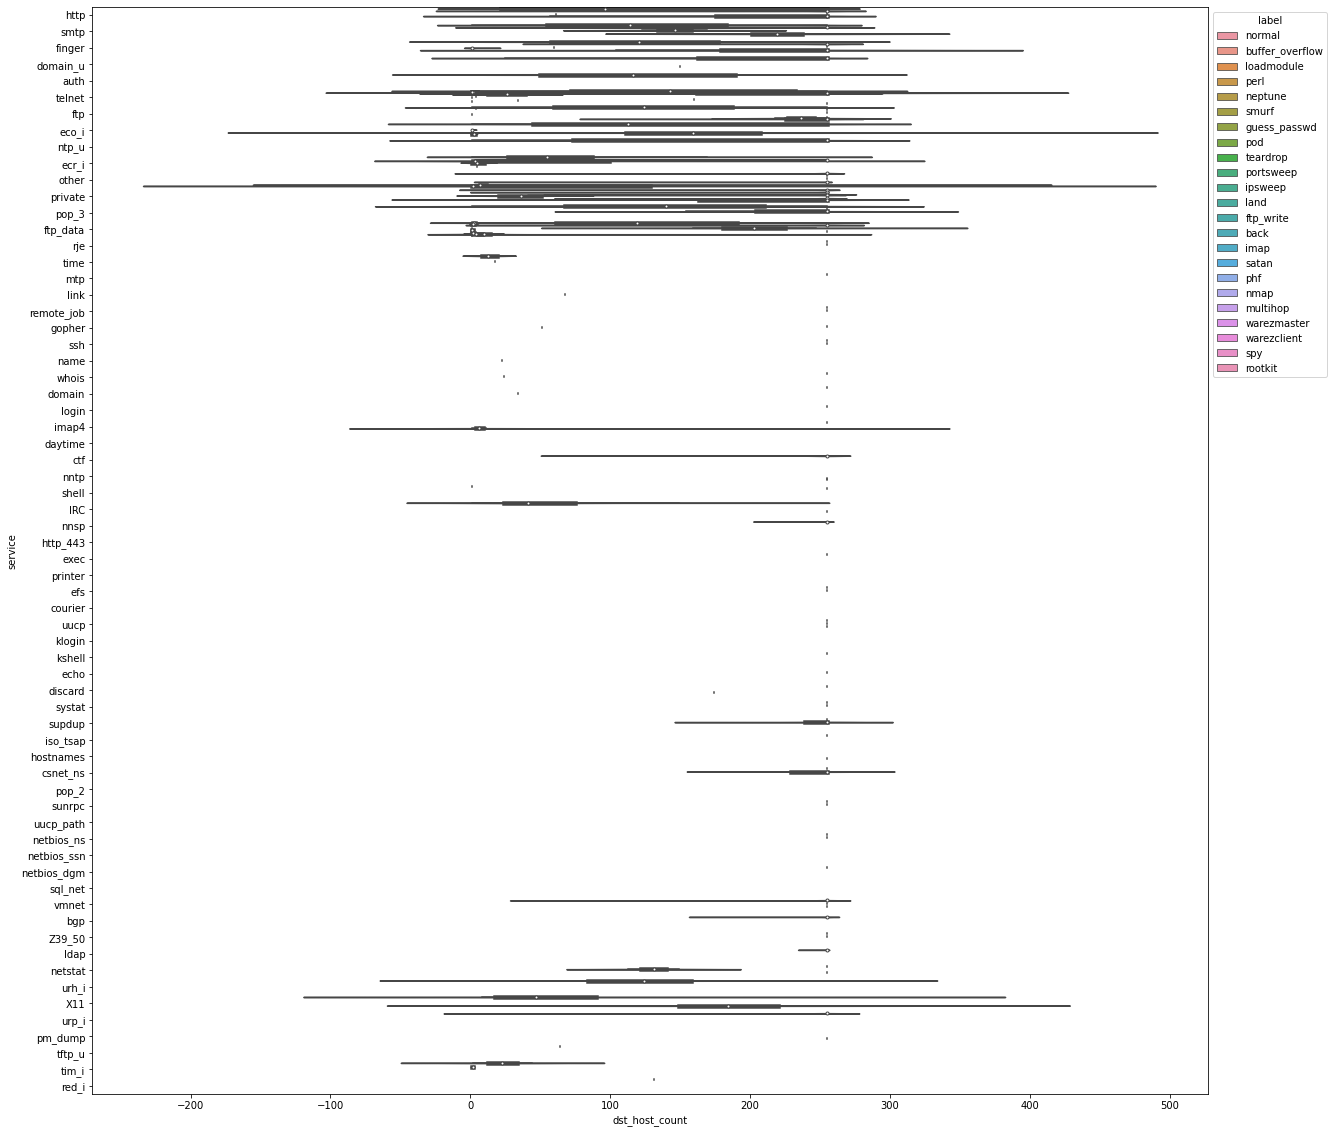

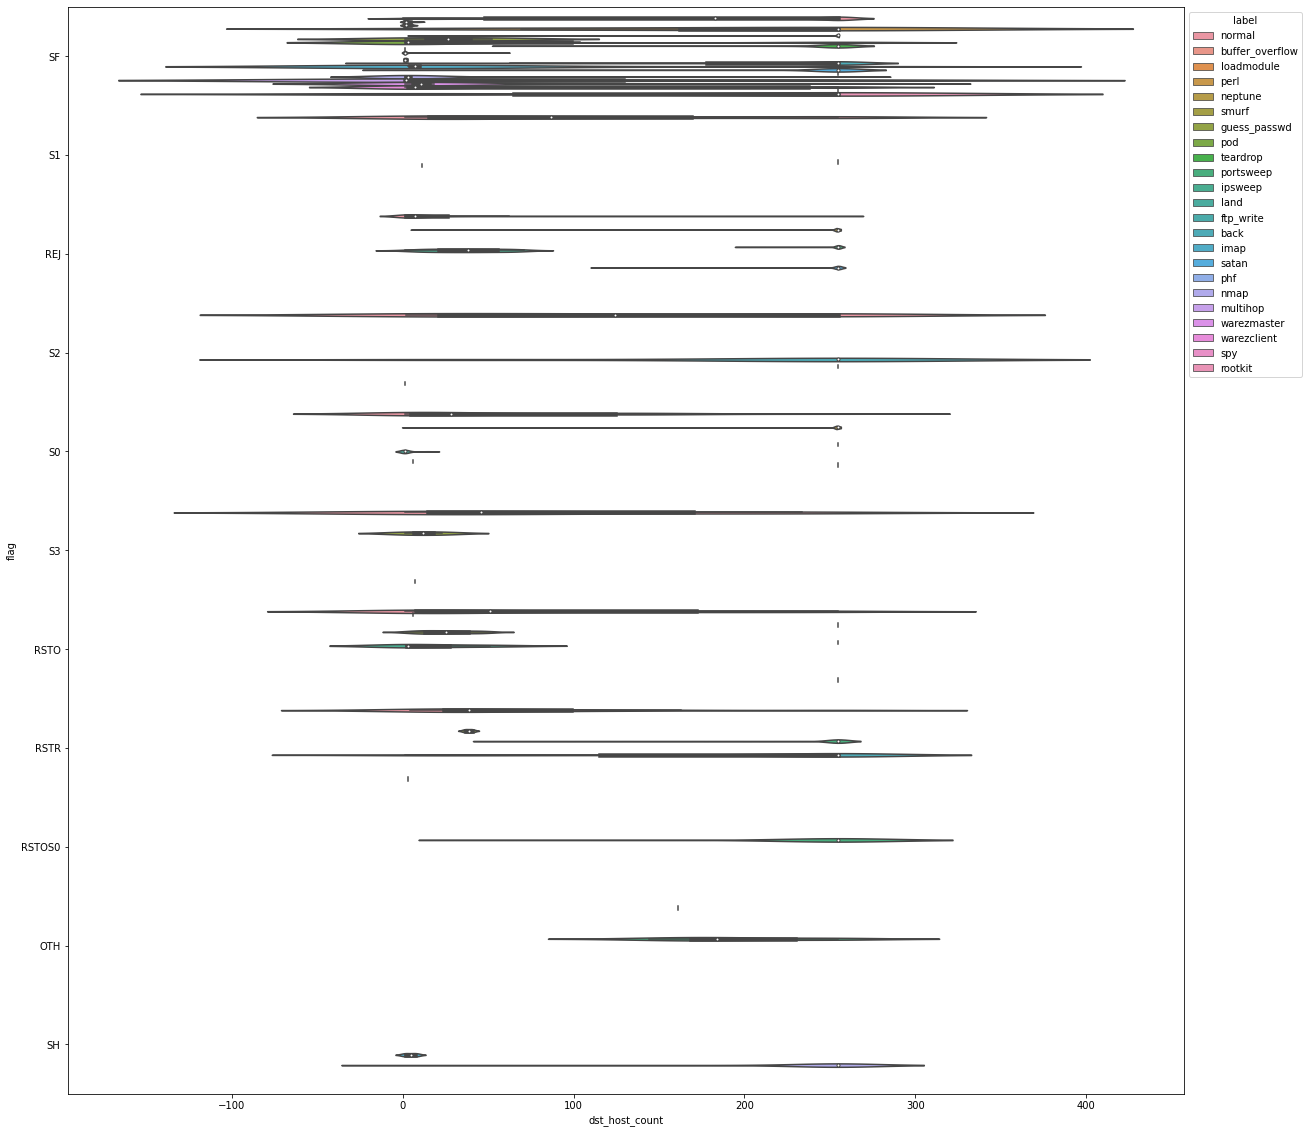

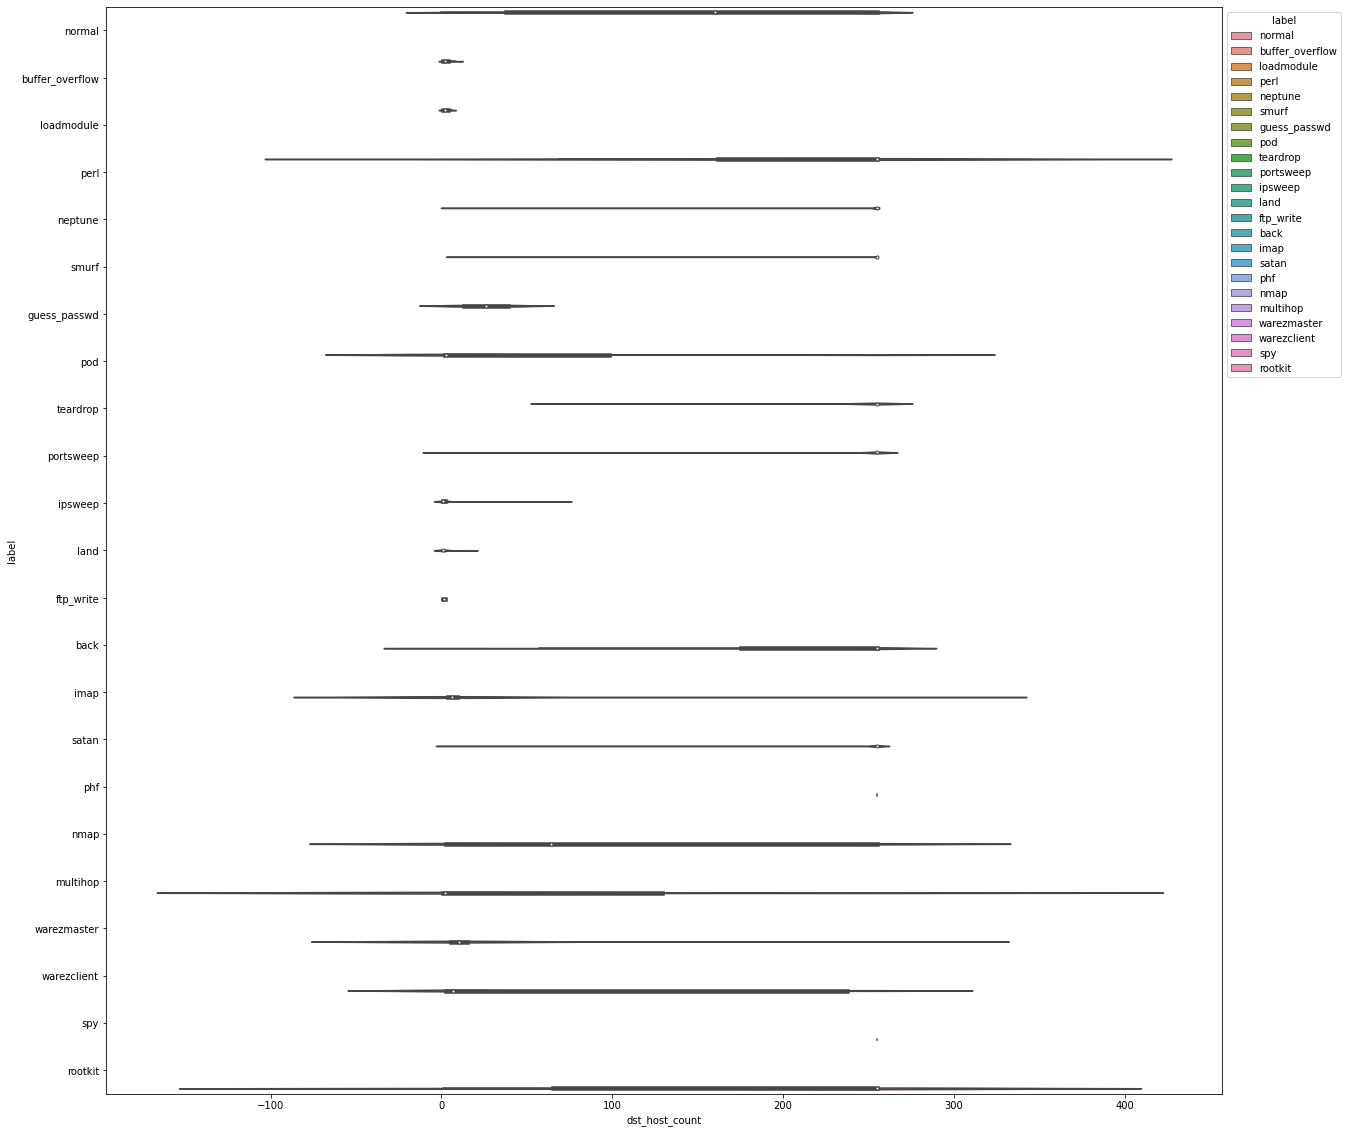

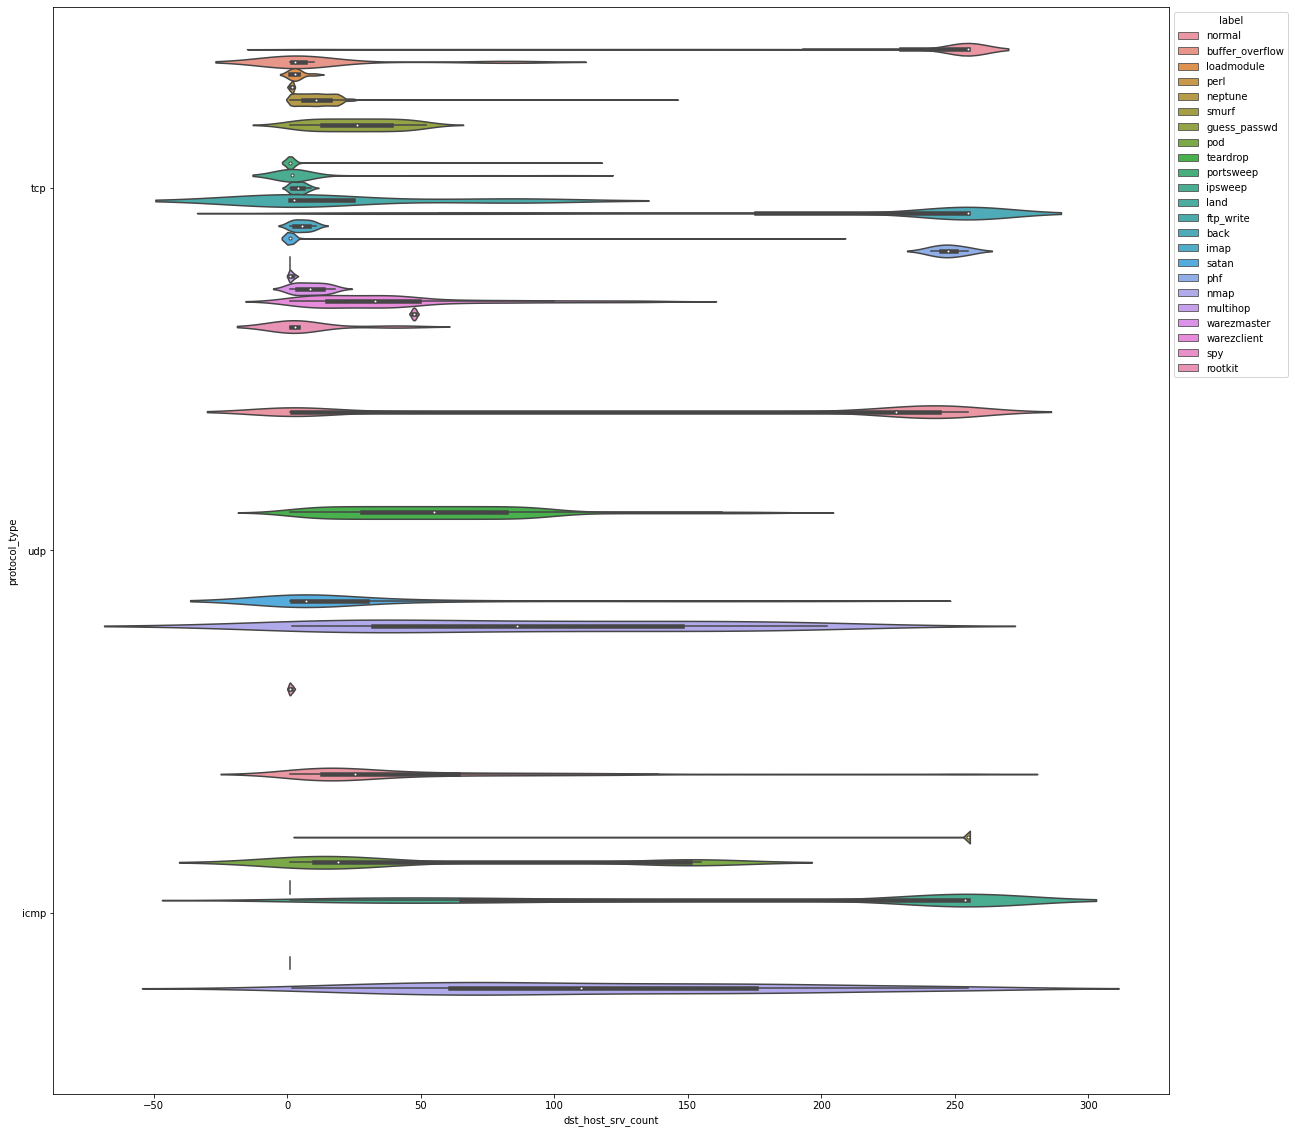

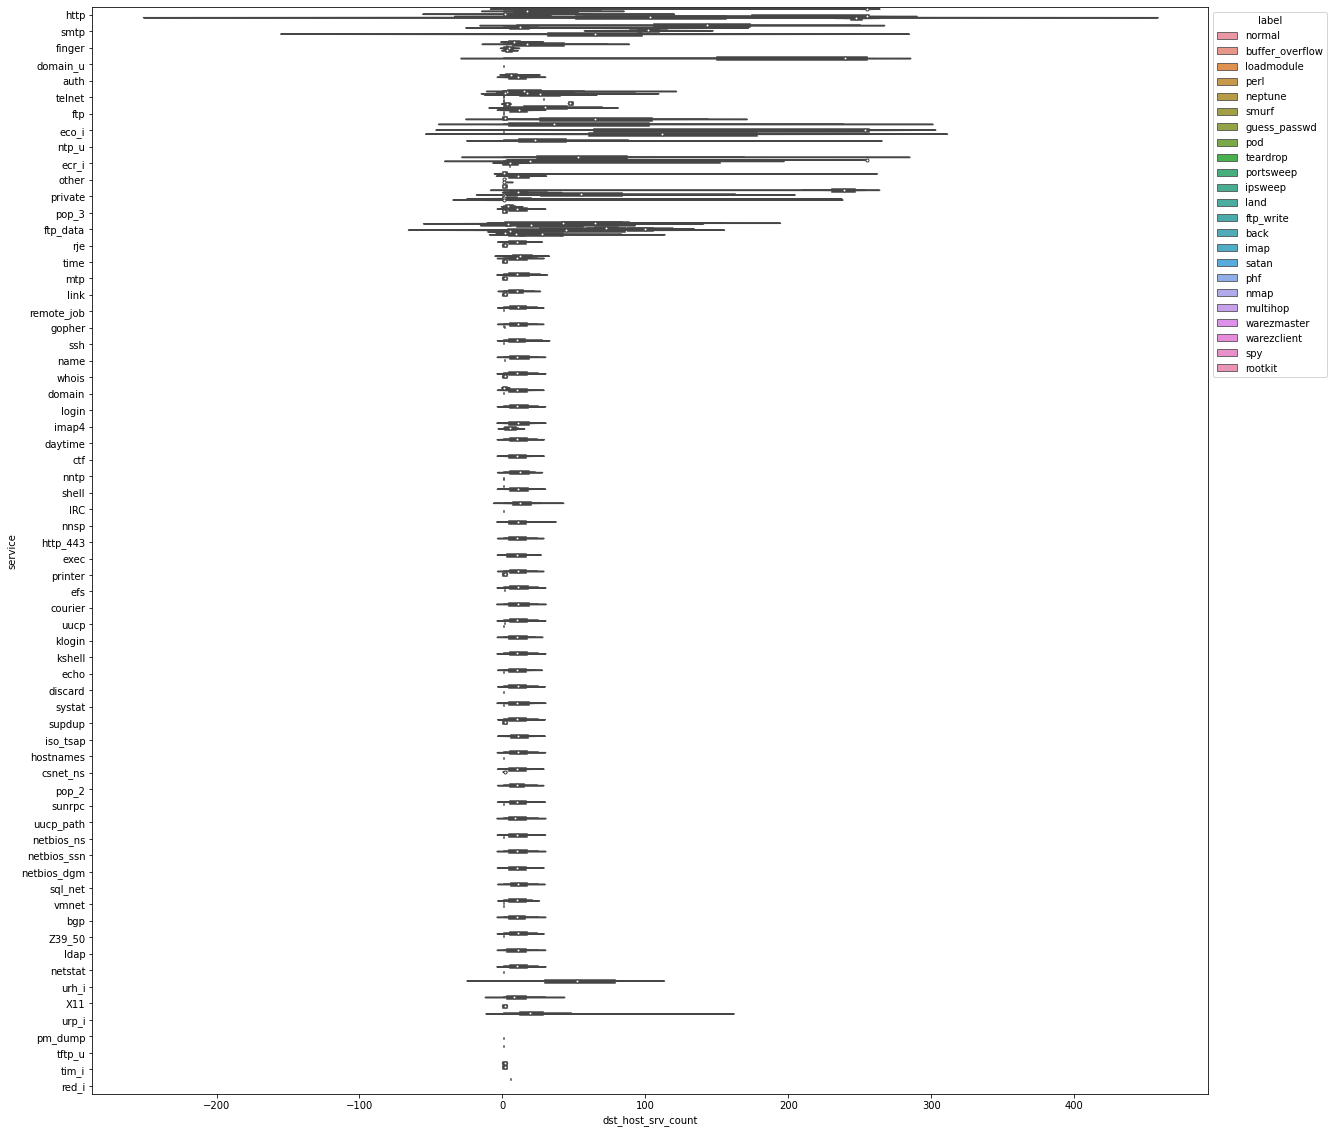

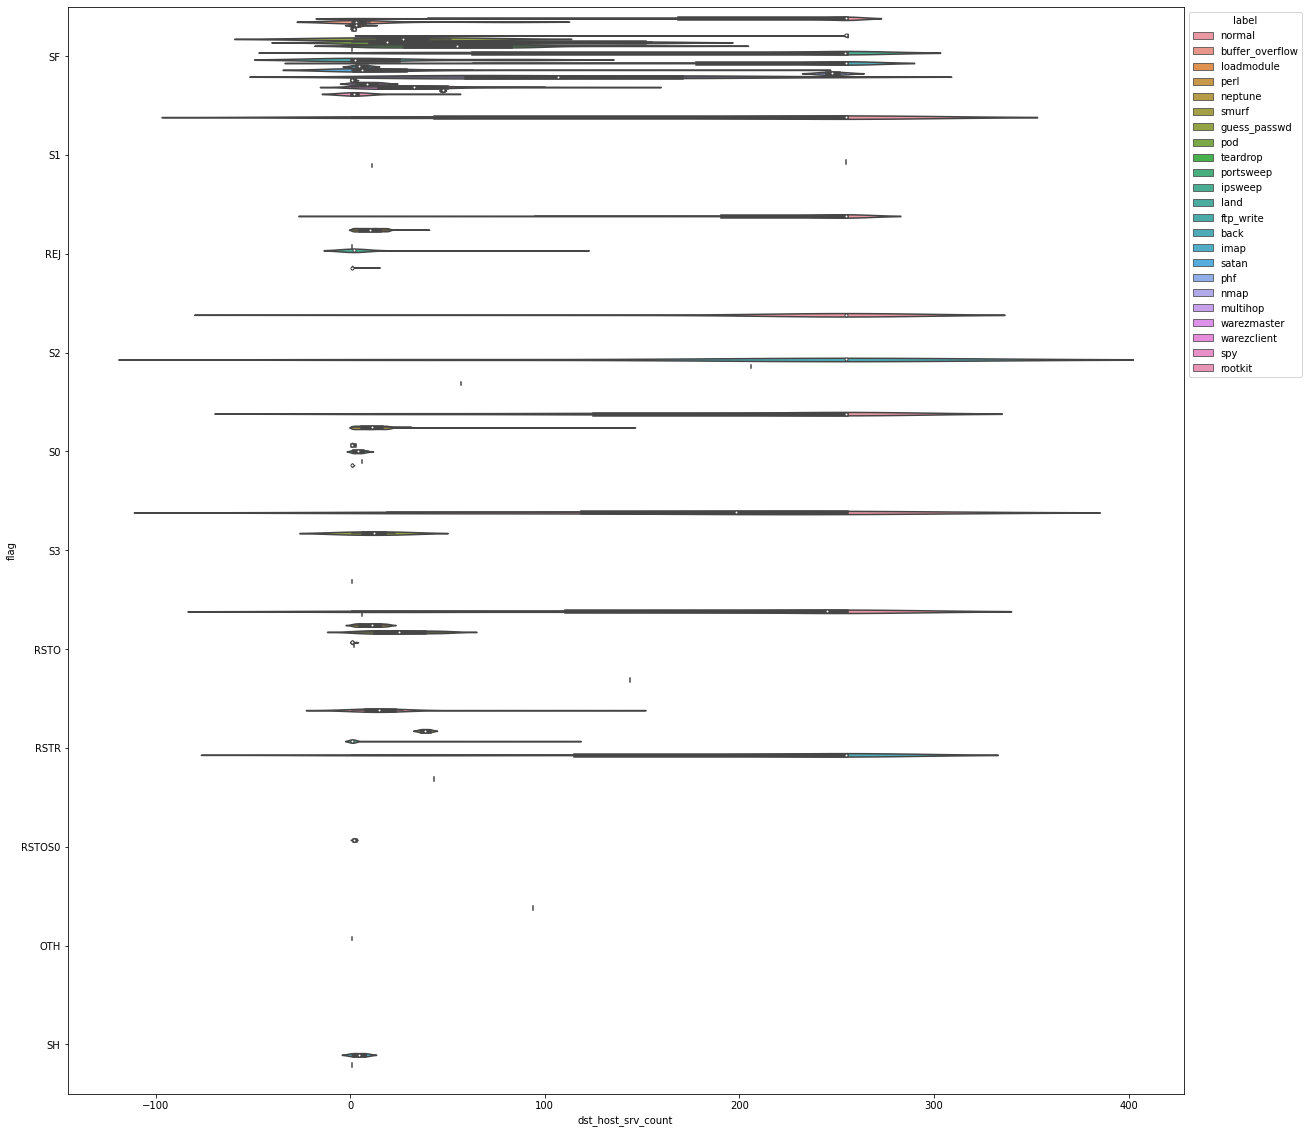

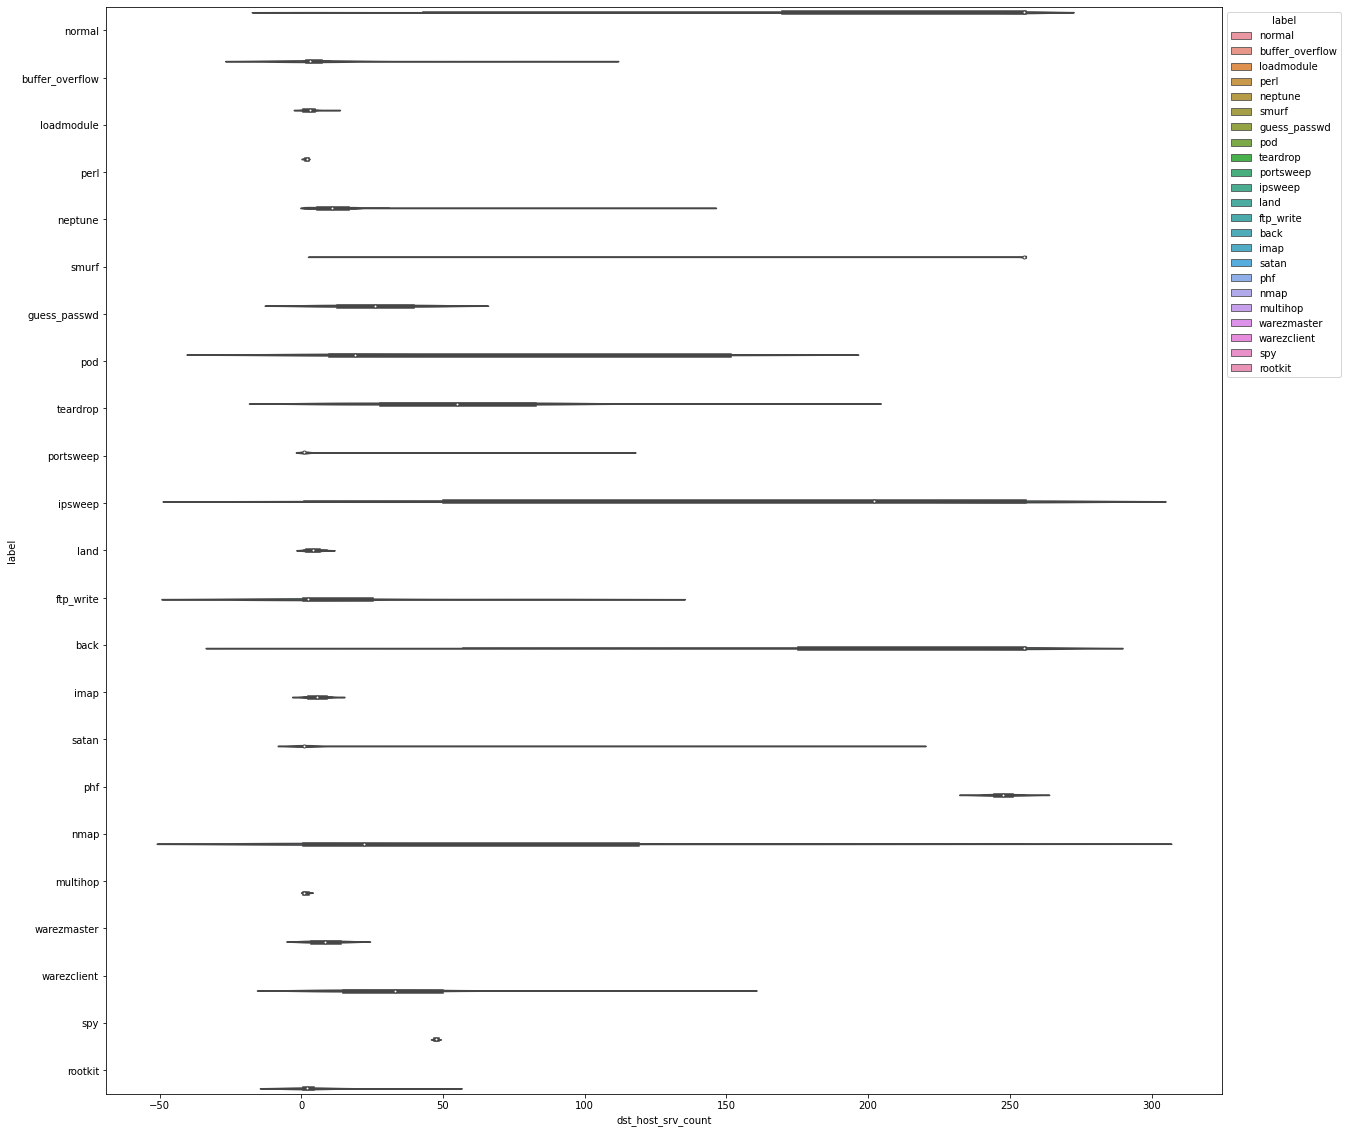

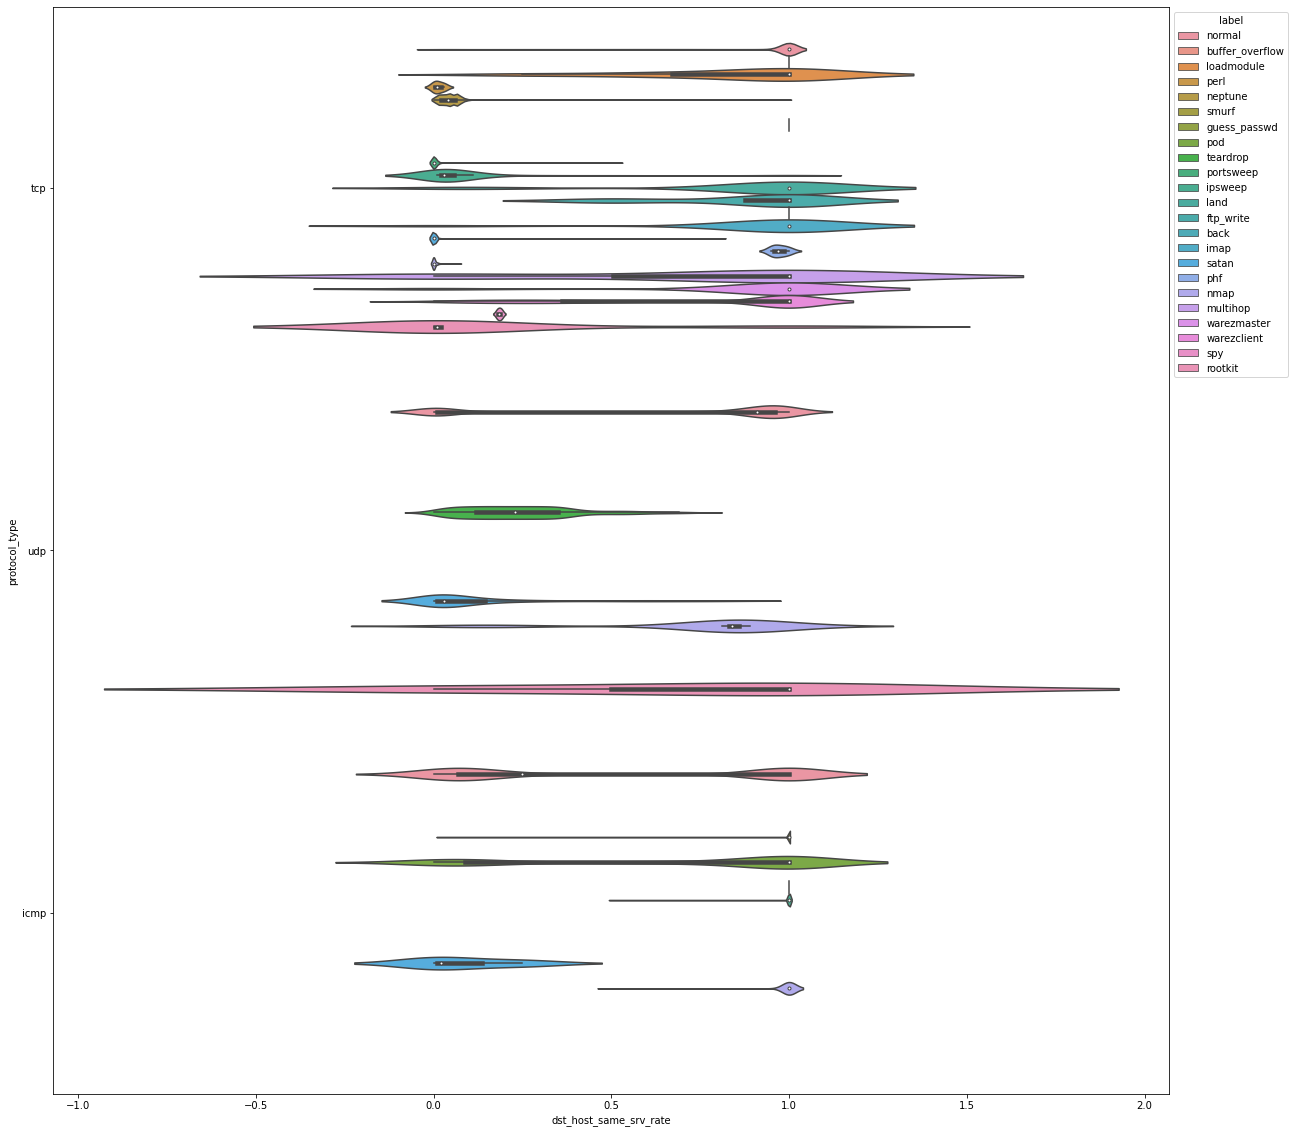

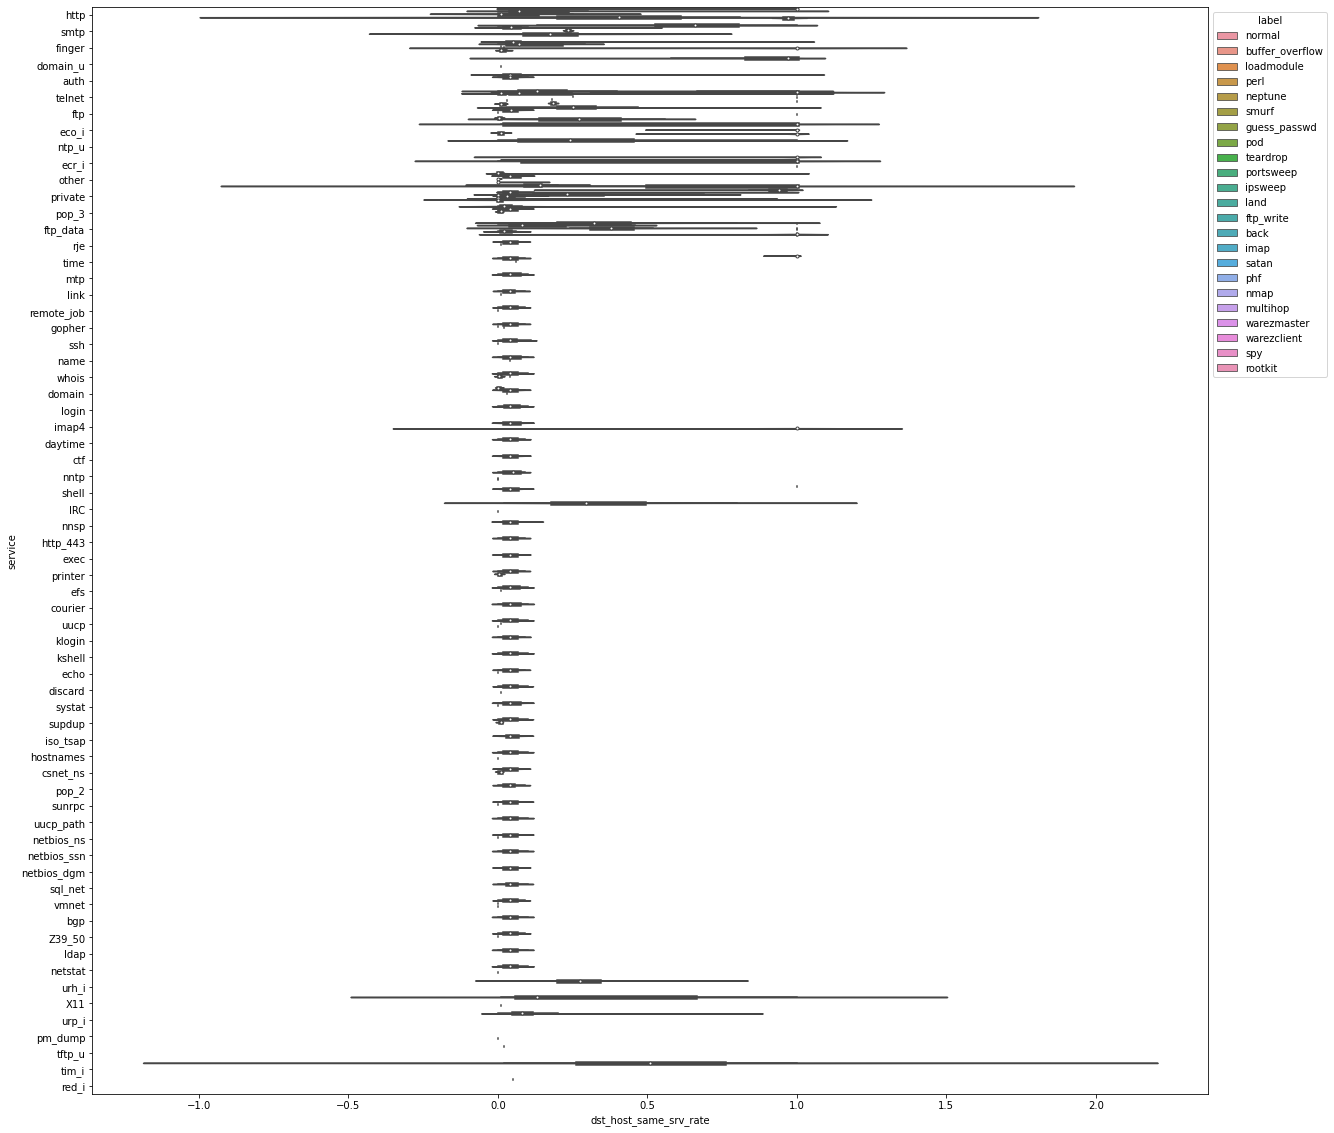

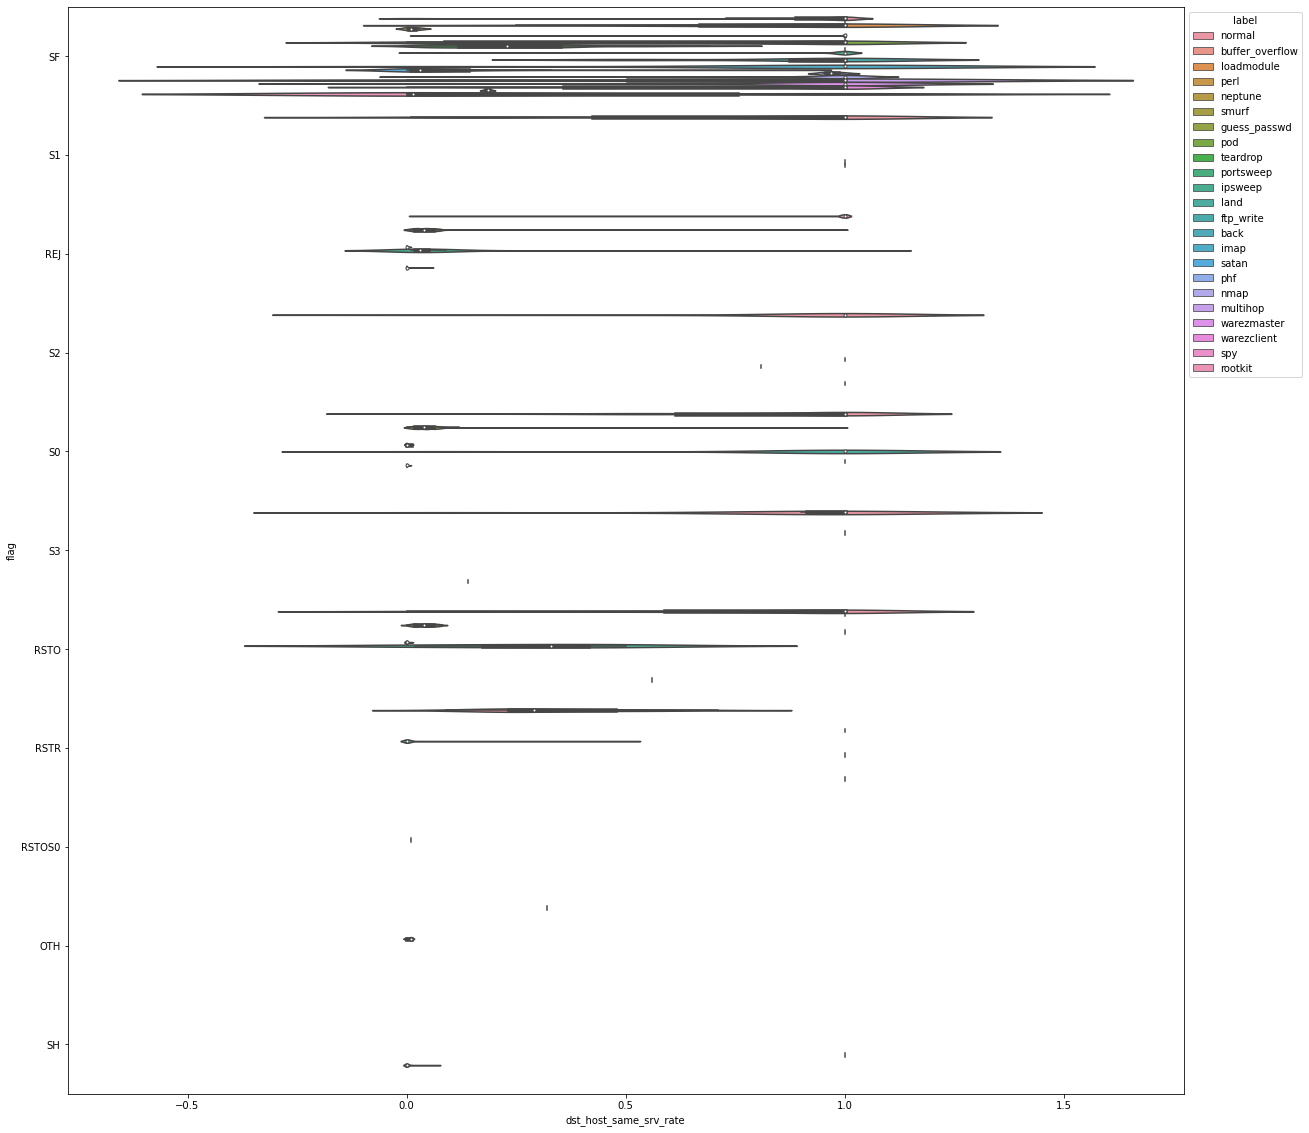

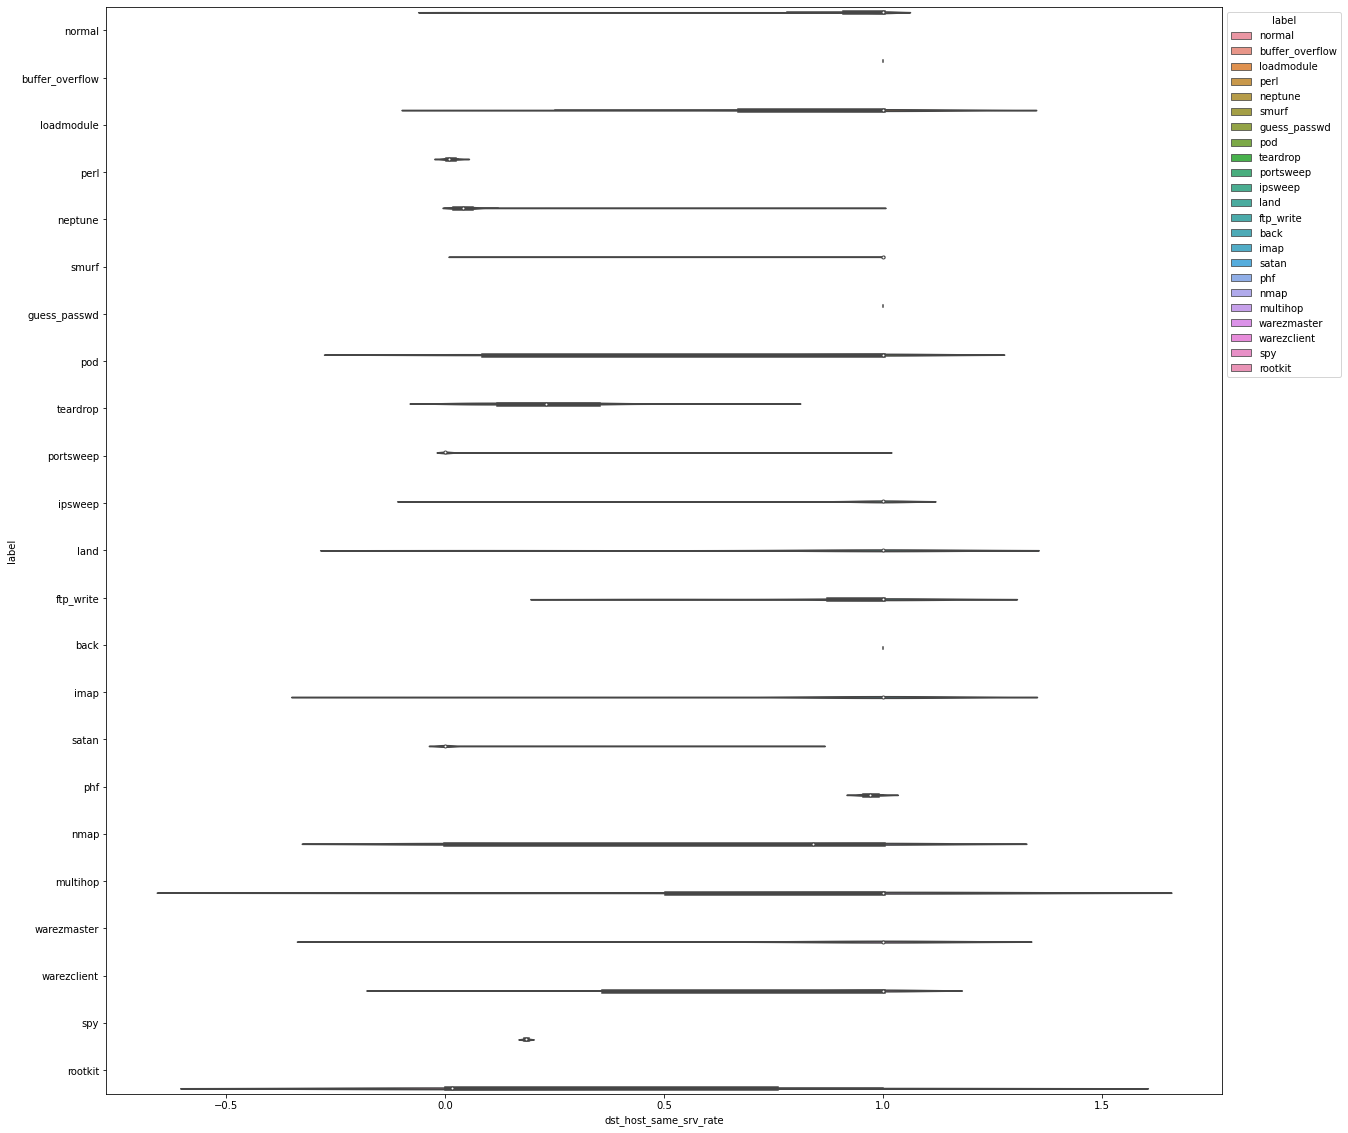

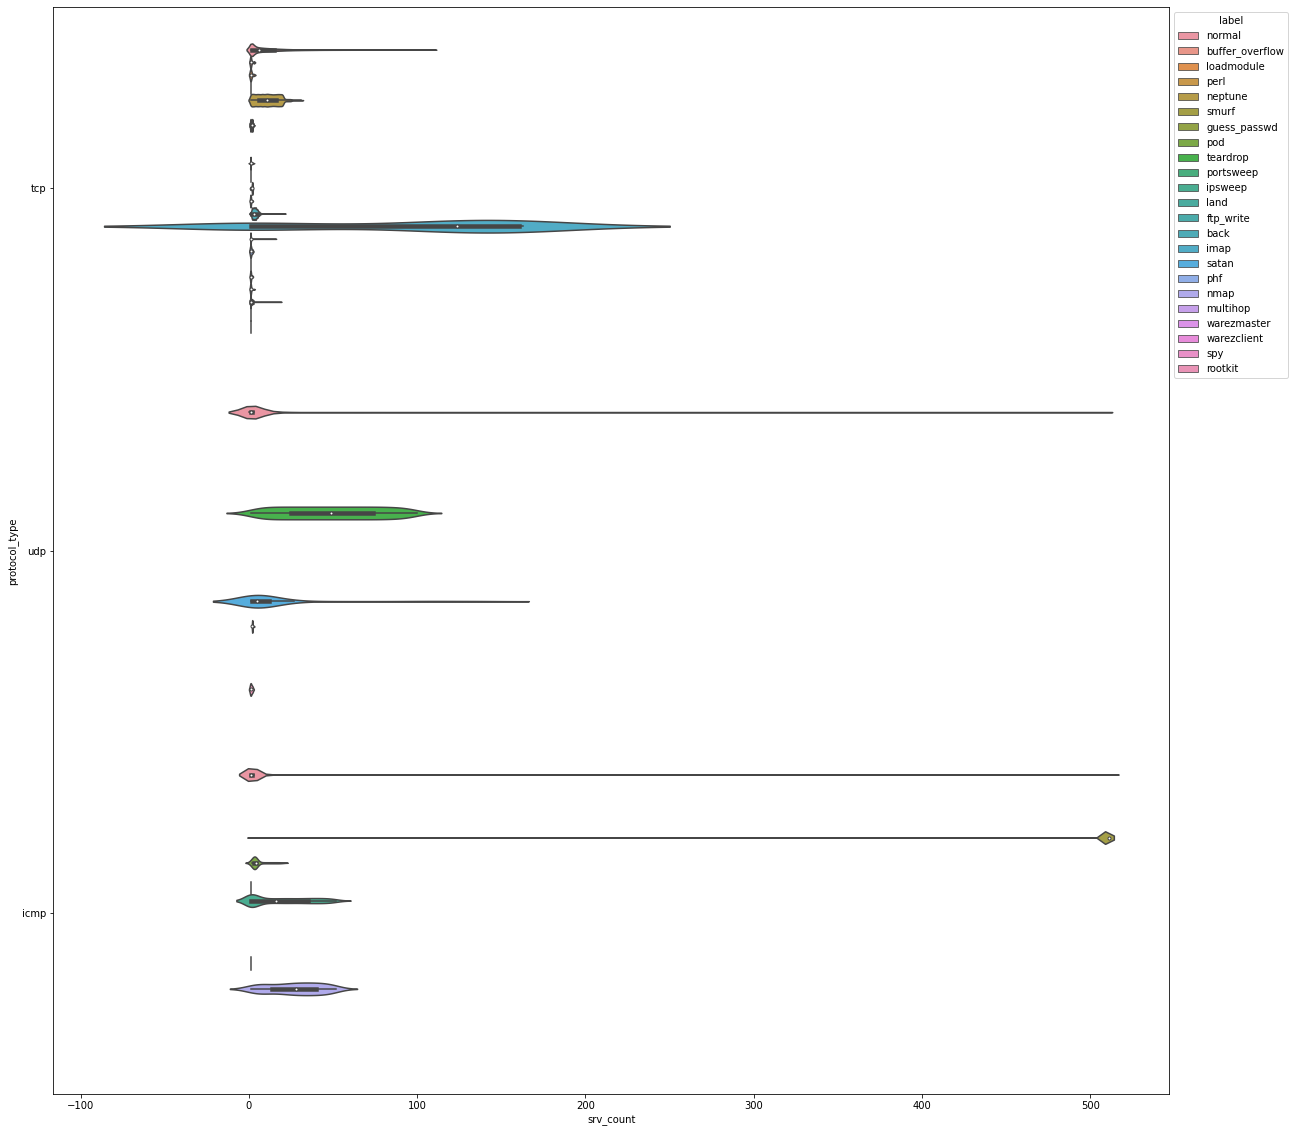

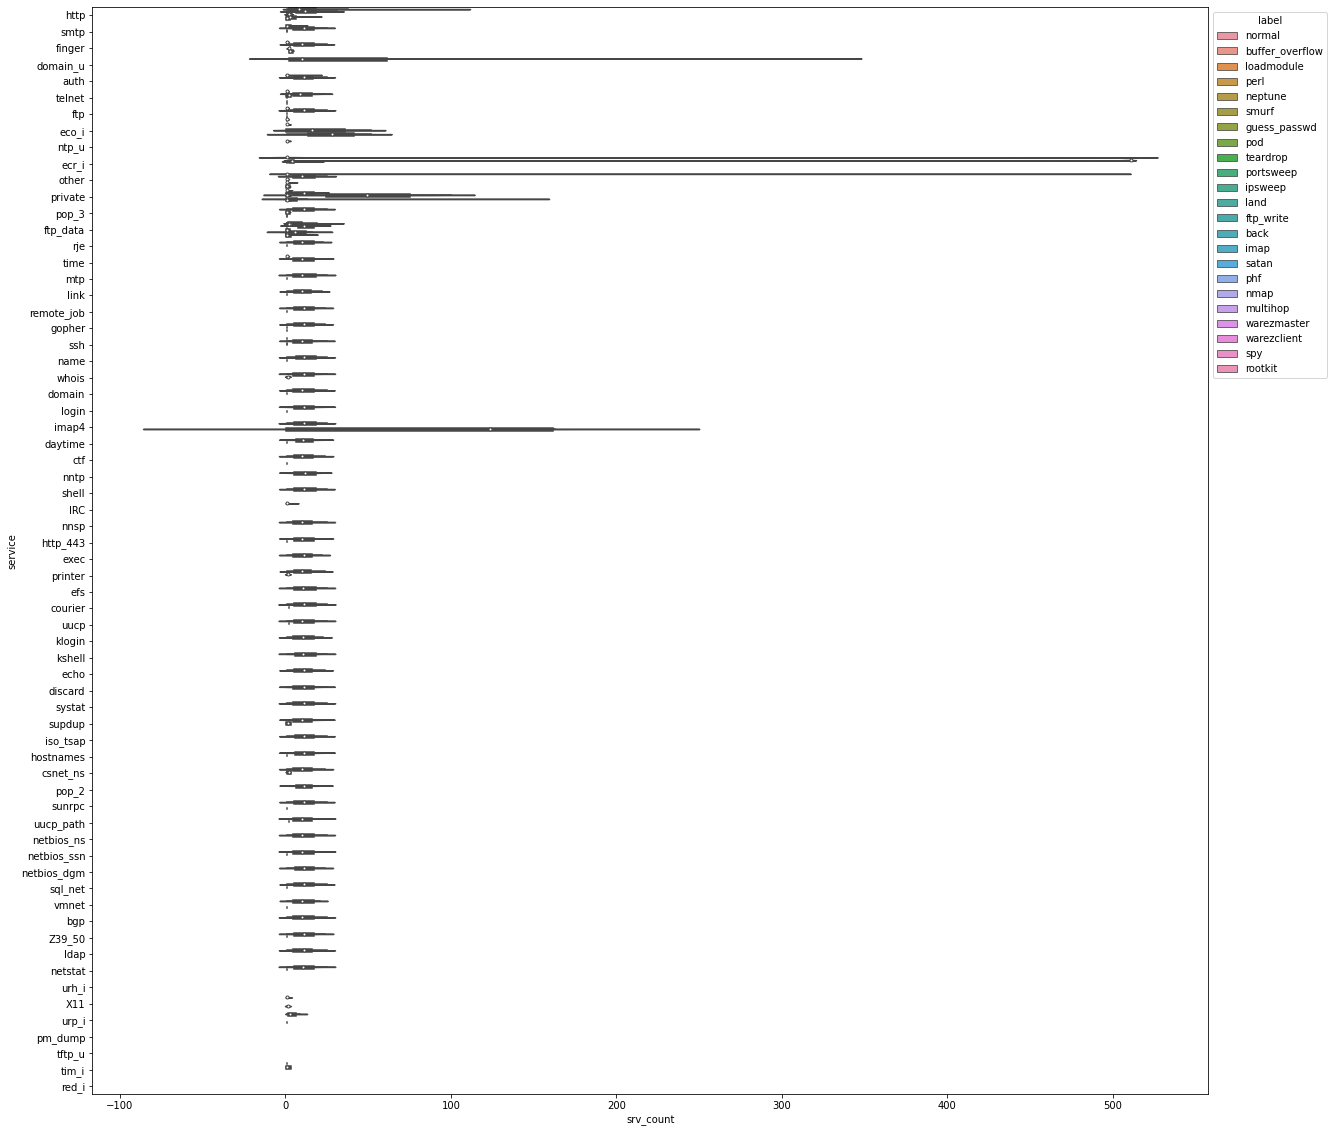

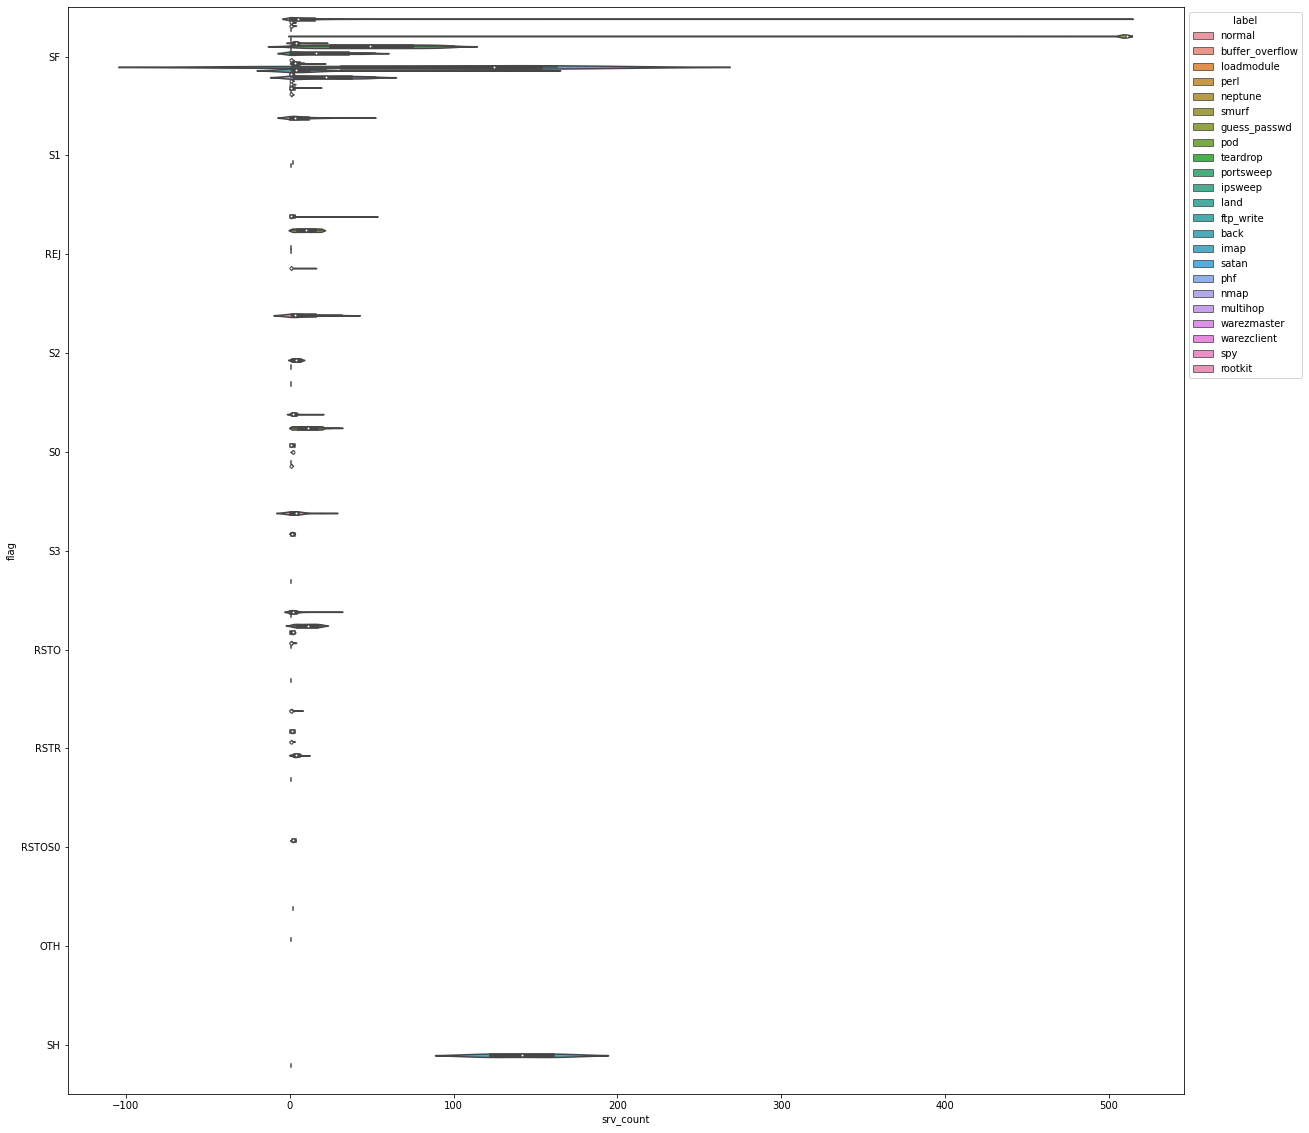

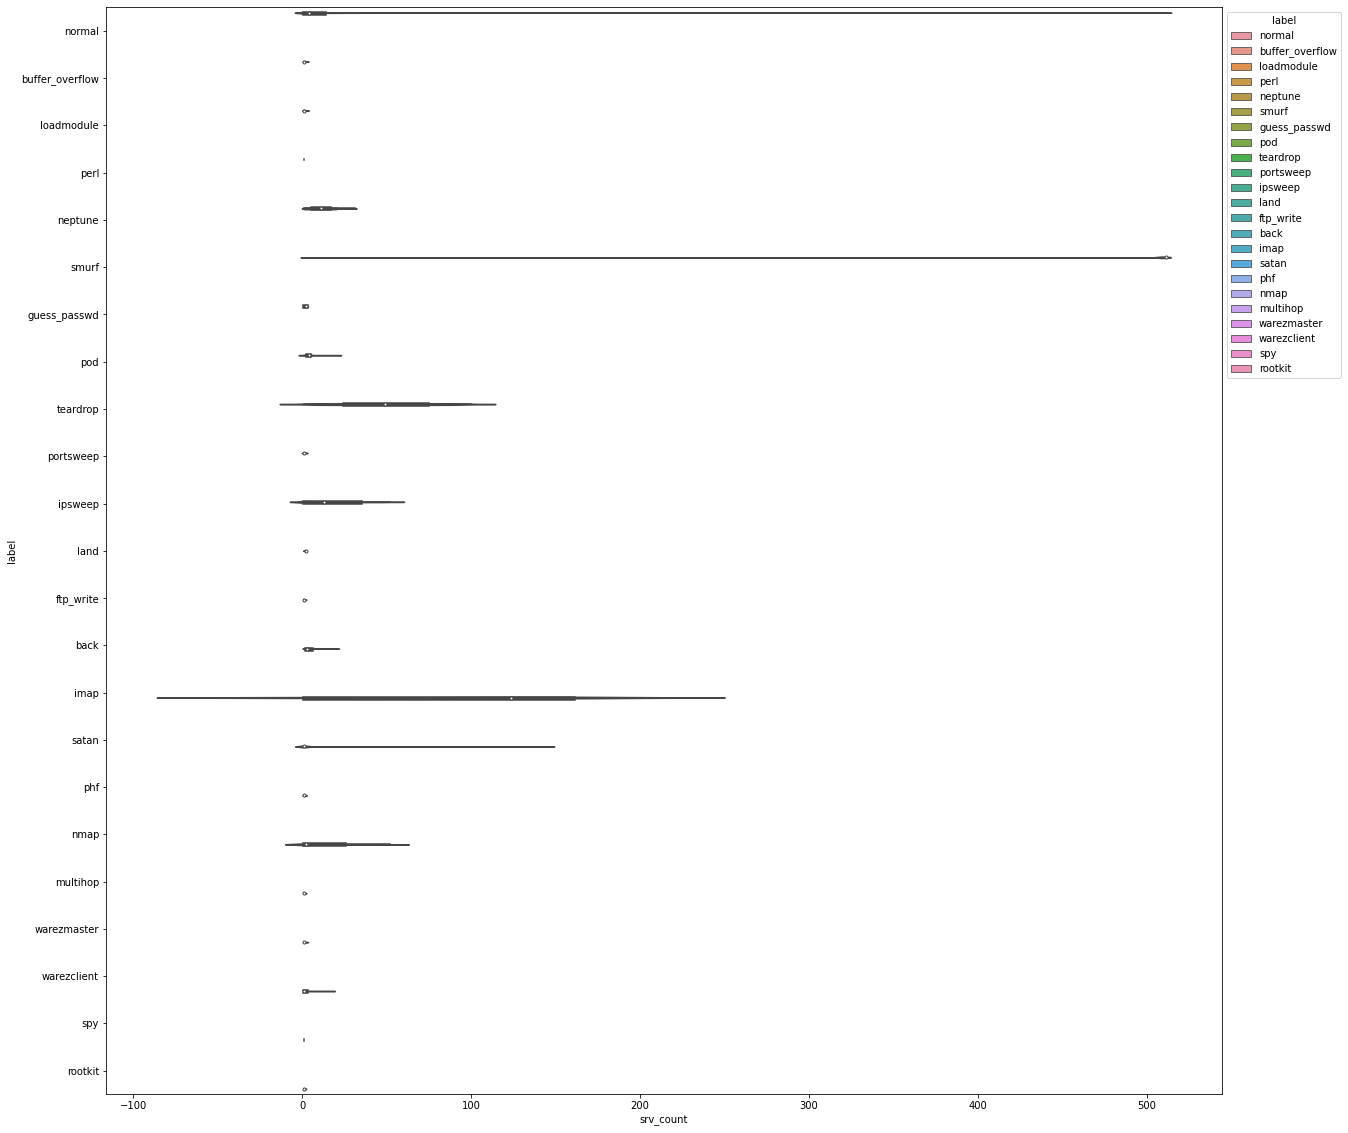

In [44]:
cnt=0
for i,y in enumerate(dst):
  for j,x in enumerate(cat_col):
      plt.figure(cnt+1)
      plt.figure(figsize = (20,20))
      ax=sns.violinplot(data=df, x=y, y=x,hue="label",scale="width")
      sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
      cnt+=1

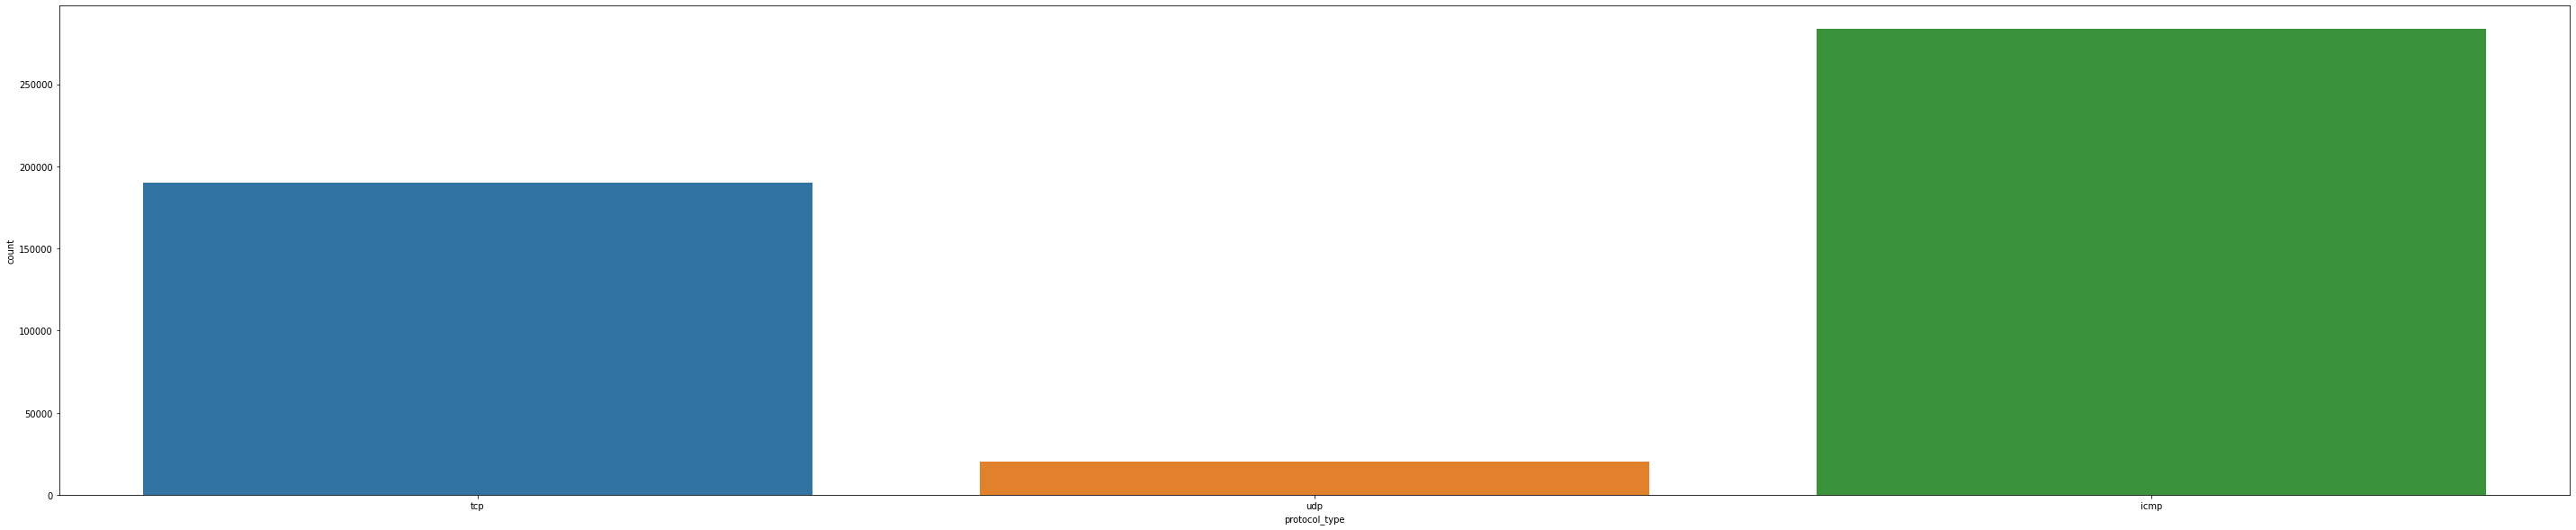

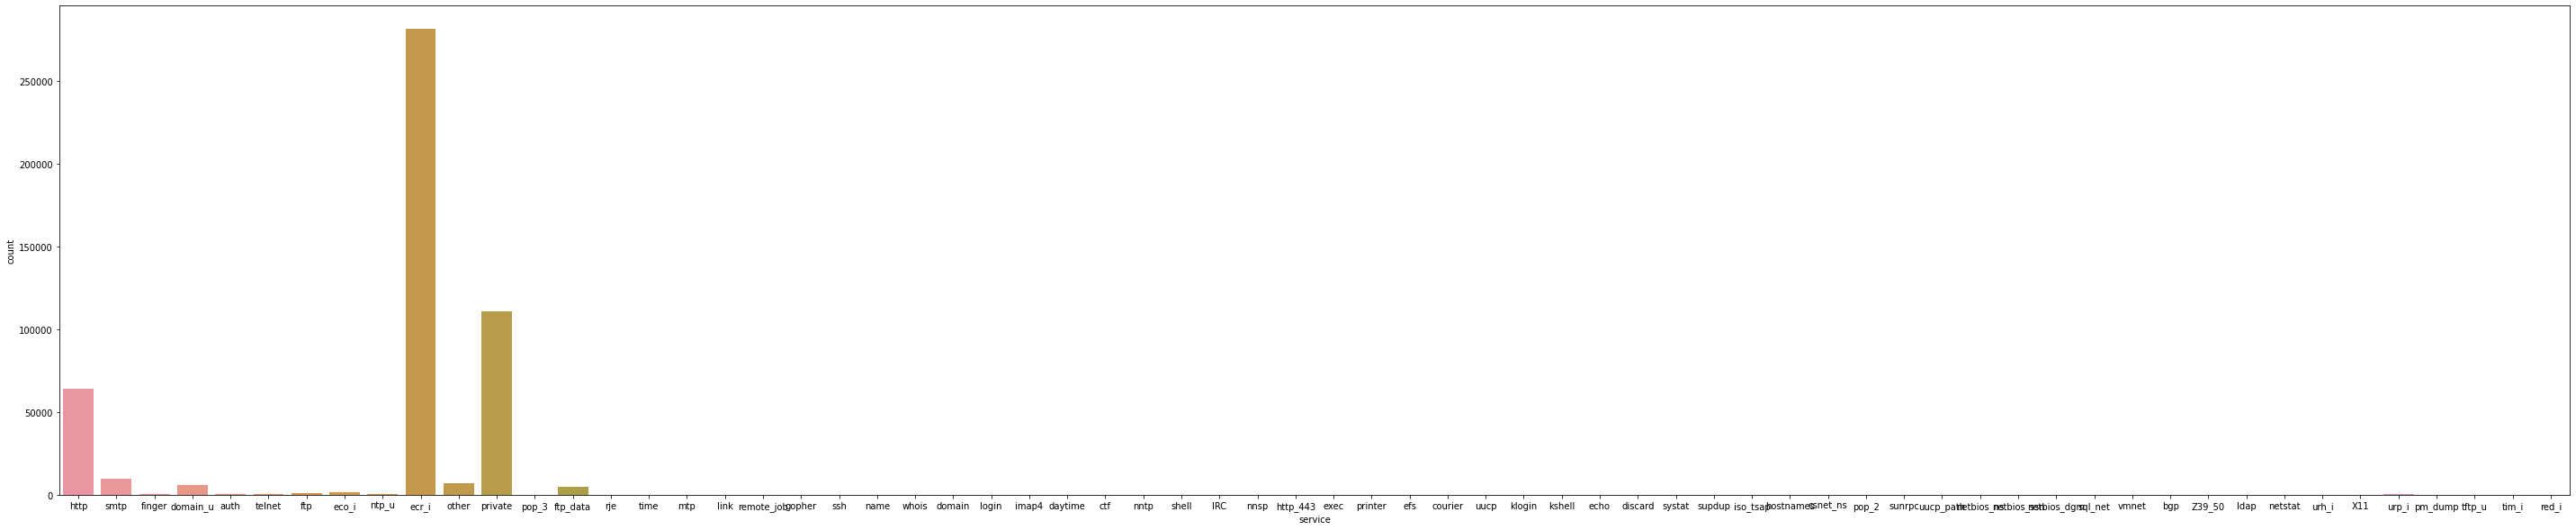

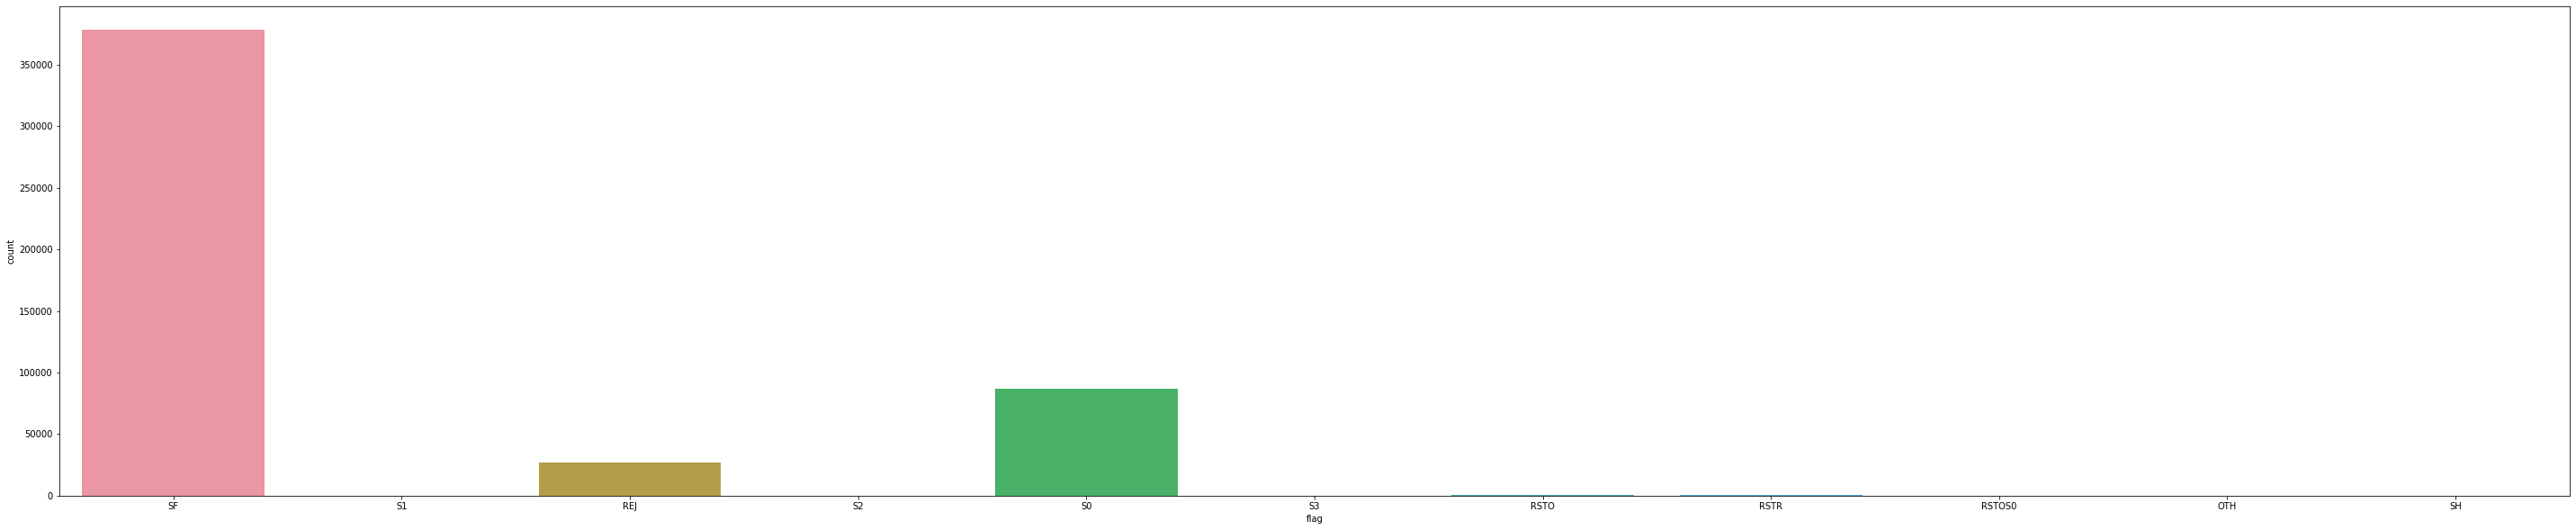

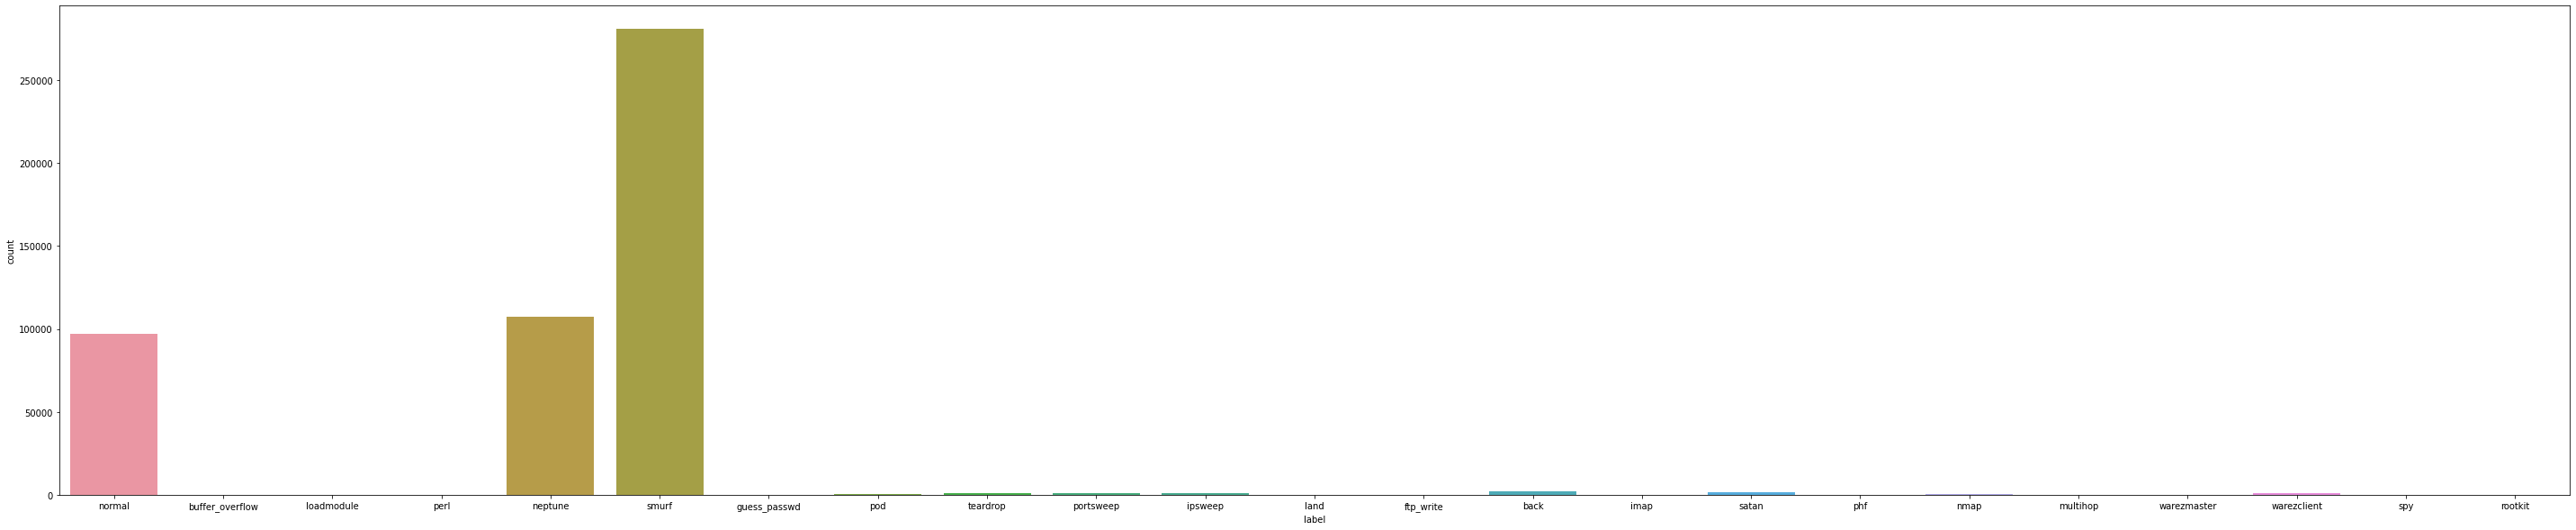

In [52]:

for j,x in enumerate(cat_col):
  plt.figure(figsize=(50,10))
  plt.figure(j+1)
  sns.countplot(x = x, data = df)
  
   